In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.datasets import *
from fastai.vision import *
from fastai import *

In [3]:
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import json

In [4]:
ROOT_PATH=Path('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/')
DATA_PATH=Path(ROOT_PATH/'data')
VOC_DEVKIT_PATH = Path(DATA_PATH/'VOCdevkit')
MODEL_PATH=Path(ROOT_PATH/'model')
TRAIN_PATH=Path(ROOT_PATH/'train')               

In [13]:
VOC_DEVKIT_PATH.ls()



[PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/pascal_val2007.json'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/.ipynb_checkpoints'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/pascal_train2007.json')]

In [14]:
train_json_path = Path(VOC_DEVKIT_PATH/'pascal_train2007.json')
with open(train_json_path, 'r') as f:
    train_json = json.loads(f.read())

In [15]:
IMAGES, ANNOTATIONS, CATEGORIES = ['images', 'annotations', 'categories']

In [16]:
train_json[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [17]:
train_json[ANNOTATIONS][:3]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0},
 {'segmentation': [[89, 77, 89, 336, 403, 336, 403, 77]],
  'area': 81326,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [89, 77, 314, 259],
  'category_id': 13,
  'id': 3,
  'ignore': 0}]

In [18]:
train_json[CATEGORIES][:5]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'},
 {'supercategory': 'none', 'id': 5, 'name': 'bottle'}]

### Create dict from id to category (dict[id] -> category)

In [19]:
categories = dict([(c['id'], c['name']) for c in train_json[CATEGORIES]]); categories

{1: 'aeroplane',
 2: 'bicycle',
 3: 'bird',
 4: 'boat',
 5: 'bottle',
 6: 'bus',
 7: 'car',
 8: 'cat',
 9: 'chair',
 10: 'cow',
 11: 'diningtable',
 12: 'dog',
 13: 'horse',
 14: 'motorbike',
 15: 'person',
 16: 'pottedplant',
 17: 'sheep',
 18: 'sofa',
 19: 'train',
 20: 'tvmonitor'}

### Create map of id to image file (dict[id] -> filename)

In [20]:
images = dict([(i['id'], i['file_name']) for i in train_json['images']]); images

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

### List of image ids

In [21]:
image_ids = [i['id'] for i in train_json['images']]; image_ids

[12,
 17,
 23,
 26,
 32,
 33,
 34,
 35,
 36,
 42,
 44,
 47,
 48,
 61,
 64,
 66,
 73,
 77,
 78,
 83,
 89,
 91,
 104,
 112,
 122,
 129,
 133,
 134,
 138,
 140,
 141,
 147,
 153,
 154,
 159,
 161,
 162,
 163,
 164,
 171,
 173,
 174,
 187,
 189,
 192,
 193,
 194,
 198,
 200,
 207,
 209,
 219,
 220,
 222,
 225,
 228,
 235,
 242,
 250,
 256,
 259,
 262,
 263,
 276,
 278,
 282,
 288,
 294,
 296,
 306,
 307,
 311,
 312,
 317,
 320,
 325,
 331,
 334,
 337,
 344,
 347,
 349,
 355,
 359,
 367,
 370,
 372,
 379,
 382,
 387,
 391,
 394,
 395,
 400,
 404,
 406,
 407,
 411,
 416,
 430,
 431,
 438,
 446,
 450,
 454,
 463,
 468,
 469,
 470,
 474,
 476,
 477,
 484,
 489,
 496,
 503,
 508,
 516,
 518,
 519,
 522,
 524,
 525,
 526,
 528,
 535,
 537,
 541,
 544,
 549,
 550,
 552,
 554,
 555,
 559,
 565,
 577,
 583,
 589,
 590,
 592,
 597,
 605,
 609,
 612,
 620,
 622,
 625,
 632,
 633,
 635,
 648,
 654,
 657,
 671,
 672,
 680,
 685,
 688,
 689,
 695,
 699,
 700,
 709,
 710,
 711,
 726,
 729,
 731,
 733,
 7

In [22]:
JPEGS_PATH = Path(VOC_DEVKIT_PATH/'VOC2007'/'JPEGImages')
IMAGES_PATH = JPEGS_PATH
JPEGS_PATH.ls()[:5]

[PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/001618.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/005169.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/002201.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/006238.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/005960.jpg')]

In [23]:
train_json[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

### Create a dict with image_id to bounding box and category dict[image_id] -> (bbox, category)

1. The goal here is to create a dictionary that maps an `image_id` to the `bbox` and `category`
2. This requires a few additional helper methods described below 

<br>

### Helper methods
<br>




#### Changing BBOX representation format
1. The information in the `annotations` dictionary has an attribute called `bbox` which is represented in a notation usually used in ML, which is width by height whereas most libraries and math representation is width by height 

<br>

#### TLDR;
 - Math world - rows by columns (height by width)
 - Computer Vision  - columns by rows (width by height)



In [24]:

def create_train_annotations(train_json:dict):
    """
    1. creates an annotations dictionary 
    2. converts the format in which height and width is stored in the 
    annotations dictionary of the train_json dict.
    3. Also converts the height and width information to top left x, y cordinate and bottom right x, y coordinate
    Hence the subtraction information
    """
    annotations = collections.defaultdict(lambda:[])
    for o in train_json[ANNOTATIONS]:
        bbox = o['bbox']
        bb = np.array([bbox[1], bbox[0], bbox[3]+bbox[1], bbox[2]+bbox[0]])
        annotations[o['image_id']].append((bb, o['category_id']))
    return annotations

def get_category(category_id): 
    cat = categories.get(category_id, None)
    if not cat: 
        cat = val_categories.get(category_id, None)
    return cat

def get_image_filename(image_id): 
    filename = images.get(image_id, None)
    if not filename:
        filename = val_images.get(image_id, None)
    return filename
        
def _get_annotations(image_id): 
    annot =  annotations.get(image_id, None)
    if not annot:
        annot = val_annotations.get(image_id, None)
    return annot


def convert_bb_to_height_and_width(bbox):
    """
    Does the opposite. 
    1. Converts bbox x, y coordinates for top left and bottom right to height and width information
    """
    bb = bbox
    return np.array([bb[1], bb[0], bb[3]-bb[1], bb[2]-bb[0]])

def _open_image(filename):
    """
    1. opens an image with just the filename using the standard `open_image` method
    """
    return open_image(JPEGS_PATH/filename)

def _display_with_bbox(img_filename, bbox:list=None):
    """
    1. Creates bounding boxes using FastAIs ImageBBox api
    """
    if isinstance(img_filename, str):
        img = _open_image(img_filename)
    else:
        img = img_filename
        
    if not isinstance(bbox, ImageBBox):        
        bb, category = bbox    
        category_name = category if isinstance(category, list) else get_category(category)
        img_bbox = ImageBBox.create(*img.size, bb, labels=[0], classes=list(category_name))        
    else:
        img_bbox = bbox
    img.show(y=img_bbox, figsize=(5, 5))
    
def _get_largest_img_bbox(img_annotation):
    if not img_annotation: raise Exception
    sorted_bbox = sorted(img_annotation, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return sorted_bbox[0]

In [25]:
annotations = create_train_annotations(train_json); annotations

defaultdict(<function __main__.create_train_annotations.<locals>.<lambda>()>,
            {12: [(array([ 96, 155, 270, 351]), 7)],
             17: [(array([ 61, 184, 199, 279]), 15),
              (array([ 77,  89, 336, 403]), 13)],
             23: [(array([229,   8, 500, 245]), 2),
              (array([219, 229, 500, 334]), 2),
              (array([177,   1, 500,  90]), 2),
              (array([  0,   1, 369, 117]), 15),
              (array([  1,   2, 462, 243]), 15),
              (array([  0, 224, 486, 334]), 15)],
             26: [(array([124,  89, 212, 337]), 7)],
             32: [(array([ 77, 103, 183, 375]), 1),
              (array([ 87, 132, 123, 197]), 1),
              (array([179, 194, 229, 213]), 15),
              (array([188,  25, 238,  44]), 15)],
             33: [(array([106,   8, 263, 499]), 1),
              (array([199, 420, 226, 482]), 1),
              (array([187, 324, 223, 411]), 1)],
             34: [(array([166, 115, 400, 360]), 19),
              (a

In [26]:
get_category(7), get_image_filename(12)

('car', '000012.jpg')

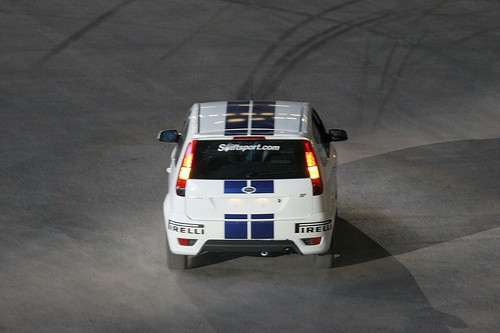

In [27]:
first_img = list(images.values())[0]
_open_image(first_img)

### Creating images with bounding boxes using ImageBBox

```python
img = open_image('imgs/car_bbox.jpg')
bbox = ImageBBox.create(*img.size, [[96, 155, 270, 351]], labels=[0], classes=['car'])
img.show(y=bbox)
```

In [28]:
imgs, lbl_bbox = get_annotations(VOC_DEVKIT_PATH/'pascal_train2007.json')
imgs_valid, lbl_bbox_valid = get_annotations(VOC_DEVKIT_PATH/'pascal_val2007.json')

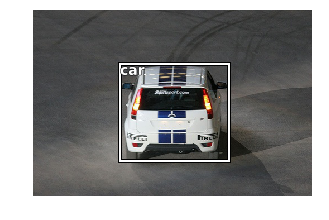

In [29]:
imgs[0], lbl_bbox[0]

_display_with_bbox(imgs[0], lbl_bbox[0])

In [30]:
annotations[12]


[(array([ 96, 155, 270, 351]), 7)]

In [31]:
bb, cat = annotations[12][0]; bb, [get_category(cat)]

(array([ 96, 155, 270, 351]), ['car'])

In [32]:
img = _open_image(imgs[0]); img.size, lbl_bbox[0]

(torch.Size([333, 500]), [[[96, 155, 270, 351]], ['car']])

### Sort each image annotation to return the largest image

The annotations for image_id 23 looks like this 

```python
(23,
 [(array([229,   8, 500, 245]), 2),
  (array([219, 229, 500, 334]), 2),
  (array([177,   1, 500,  90]), 2),
  (array([  0,   1, 369, 117]), 15),
  (array([  1,   2, 462, 243]), 15),
  (array([  0, 224, 486, 334]), 15)])
```

 - The function returns the largest image by calling the `_get_largest_img_bbox` on a list comprehension

 - internally the method calls sort and computes the area rows x columns (height x width) and returns the largest area
 
 ```python
x[0] # where x is the example tupule above containing only the arrays
x[0][-2:] # last 2 indexes of the array
x[0][:2] # first 2 indexes of the array
np.product(x[0][-2:]-x[0][:2])
```

Then sort it in reverse order and return the highest


In [33]:
#annotations

In [34]:
largest_annotations = {img_id: _get_largest_img_bbox(a) for img_id, a in annotations.items()}

In [35]:
largest_annotations

{12: (array([ 96, 155, 270, 351]), 7),
 17: (array([ 77,  89, 336, 403]), 13),
 23: (array([  1,   2, 462, 243]), 15),
 26: (array([124,  89, 212, 337]), 7),
 32: (array([ 77, 103, 183, 375]), 1),
 33: (array([106,   8, 263, 499]), 1),
 34: (array([166, 115, 400, 360]), 19),
 35: (array([ 97, 217, 318, 465]), 15),
 36: (array([ 78,  26, 344, 319]), 12),
 42: (array([ 31, 262, 295, 500]), 19),
 44: (array([  0,   0, 330, 370]), 9),
 47: (array([  0,  14, 312, 459]), 7),
 48: (array([  0,   1, 500, 302]), 15),
 61: (array([ 10, 273, 279, 437]), 4),
 64: (array([ 22,   0, 500, 451]), 3),
 66: (array([181, 241, 259, 274]), 15),
 73: (array([142, 120, 460, 375]), 16),
 77: (array([  0,   1, 333, 306]), 8),
 78: (array([ 74,  14, 412, 475]), 12),
 83: (array([ 32, 108, 309, 447]), 7),
 89: (array([ 50,  21, 291, 317]), 9),
 91: (array([240, 124, 284, 195]), 7),
 104: (array([  6,   1, 333, 283]), 15),
 112: (array([173,  69, 328, 277]), 12),
 122: (array([ 19,  35, 474, 430]), 8),
 129: (arr

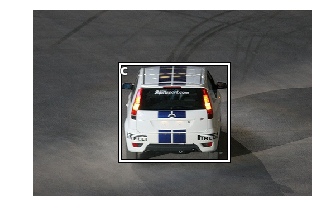

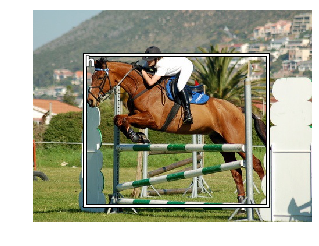

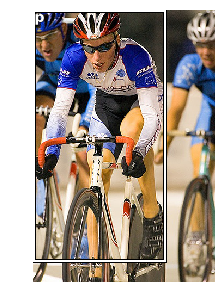

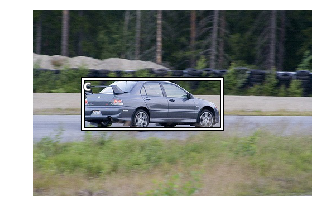

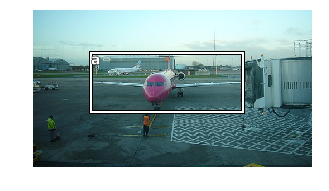

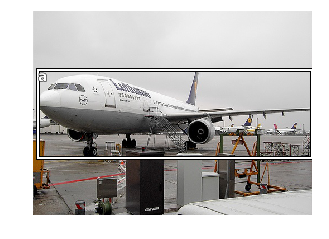

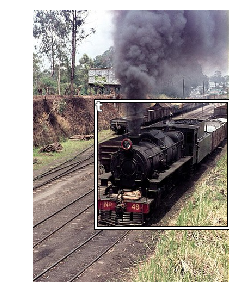

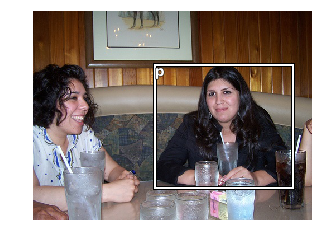

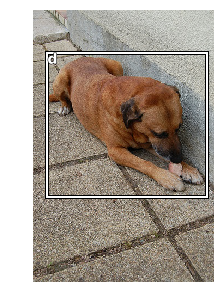

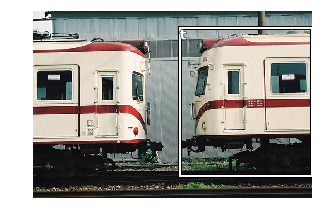

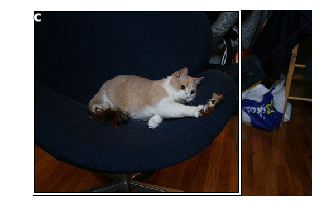

In [36]:
i = 0
for img_id, annots in largest_annotations.items():
    img_filename = get_image_filename(img_id)    
    annots = (np.expand_dims(annots[0], 0), annots[1])
    _display_with_bbox(img_filename, annots)
    i+=1
    if i>10: break

### Create a CSV of all the largest images in each file

In [37]:
df = pd.DataFrame({'filename':[get_image_filename(img_id) for img_id, annots in largest_annotations.items()],
              'cat': [get_category(annots[1]) for _, annots in largest_annotations.items()]})

df.head()

filename        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [38]:
CSV_PATH = Path(DATA_PATH/'csv')

CSV_PATH.mkdir(exist_ok=True)

In [39]:
df.to_csv(Path(DATA_PATH/'csv'/'largest_images.csv'))

In [40]:
df = pd.read_csv(DATA_PATH/'csv'/'largest_images.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

filename        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [41]:
csv_path = Path(DATA_PATH/'csv'/'largest_images.csv')
csv_path = csv_path.__str__()
csv_path

'/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/csv/largest_images.csv'

In [42]:
JPEGS_PATH

PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages')

### Create a NN which does classification and regression.

In [43]:
largest_annotations

{12: (array([ 96, 155, 270, 351]), 7),
 17: (array([ 77,  89, 336, 403]), 13),
 23: (array([  1,   2, 462, 243]), 15),
 26: (array([124,  89, 212, 337]), 7),
 32: (array([ 77, 103, 183, 375]), 1),
 33: (array([106,   8, 263, 499]), 1),
 34: (array([166, 115, 400, 360]), 19),
 35: (array([ 97, 217, 318, 465]), 15),
 36: (array([ 78,  26, 344, 319]), 12),
 42: (array([ 31, 262, 295, 500]), 19),
 44: (array([  0,   0, 330, 370]), 9),
 47: (array([  0,  14, 312, 459]), 7),
 48: (array([  0,   1, 500, 302]), 15),
 61: (array([ 10, 273, 279, 437]), 4),
 64: (array([ 22,   0, 500, 451]), 3),
 66: (array([181, 241, 259, 274]), 15),
 73: (array([142, 120, 460, 375]), 16),
 77: (array([  0,   1, 333, 306]), 8),
 78: (array([ 74,  14, 412, 475]), 12),
 83: (array([ 32, 108, 309, 447]), 7),
 89: (array([ 50,  21, 291, 317]), 9),
 91: (array([240, 124, 284, 195]), 7),
 104: (array([  6,   1, 333, 283]), 15),
 112: (array([173,  69, 328, 277]), 12),
 122: (array([ 19,  35, 474, 430]), 8),
 129: (arr

### Using fastai v1 features

- Use the `get_annotations` method to get the imgs, and bounding boxes
- create a dictionary for both datasets `train` and `valid`
- create a `get_y_func` that returns the bboxes and classes for a given image name (filename)

```python
imgs, lbl_bbox = get_annotations(VOC_DEVKIT_PATH/'pascal_train2007.json')
imgs_valid, lbl_bbox_valid = get_annotations(VOC_DEVKIT_PATH/'pascal_val2007.json')

img2bbox = dict(zip(imgs, lbl_bbox))
img2bbox_v = dict(zip(imgs_valid, lbl_bbox_valid))

def get_y_func(x):
    if x.name in img2bbox:
        bboxes, classes = img2bbox[x.name]
    else:
        bboxes, classes = img2bbox_v[x.name]
    return [bboxes, classes]

get_y_func(Path(JPEGS_PATH/'000012.jpg'))
```

### Validation Dataset

In [44]:
val_json_path = Path(VOC_DEVKIT_PATH/'pascal_val2007.json')
with open(val_json_path, 'r') as f:
    val_json = json.loads(f.read())    
val_json.keys()



dict_keys(['images', 'type', 'annotations', 'categories'])

In [45]:
val_categories = dict([(c['id'], c['name']) for c in val_json[CATEGORIES]]); val_categories


{1: 'aeroplane',
 2: 'bicycle',
 3: 'bird',
 4: 'boat',
 5: 'bottle',
 6: 'bus',
 7: 'car',
 8: 'cat',
 9: 'chair',
 10: 'cow',
 11: 'diningtable',
 12: 'dog',
 13: 'horse',
 14: 'motorbike',
 15: 'person',
 16: 'pottedplant',
 17: 'sheep',
 18: 'sofa',
 19: 'train',
 20: 'tvmonitor'}

In [46]:
val_images = dict([(i['id'], i['file_name']) for i in val_json['images']]); 


In [47]:
val_image_ids = [i['id'] for i in val_json['images']]; 


In [48]:
val_annotations = create_train_annotations(val_json); 



In [49]:
val_largest_annotations = {img_id: _get_largest_img_bbox(a) for img_id, a in val_annotations.items()}
val_largest_annotations

{5: (array([263, 164, 372, 253]), 9),
 7: (array([ 49, 140, 330, 500]), 7),
 9: (array([171,  68, 330, 270]), 13),
 16: (array([ 71,  91, 473, 305]), 2),
 19: (array([ 87, 230, 256, 483]), 8),
 20: (array([147,  32, 416, 371]), 7),
 21: (array([ 35, 209, 482, 336]), 15),
 24: (array([164, 195, 247, 489]), 19),
 30: (array([137, 294, 290, 450]), 15),
 39: (array([ 88, 155, 279, 344]), 20),
 41: (array([ 91, 215, 302, 307]), 15),
 46: (array([233, 210, 366, 317]), 3),
 50: (array([ 95,  67, 375, 293]), 15),
 51: (array([  0, 104, 245, 427]), 14),
 52: (array([ 95,  61, 132, 107]), 16),
 60: (array([136,   0, 333, 427]), 7),
 63: (array([  0,  74, 375, 428]), 9),
 65: (array([103,   1, 334, 398]), 12),
 72: (array([ 70,  39, 473, 333]), 14),
 81: (array([165,   7, 322, 220]), 18),
 93: (array([  2,  52, 338, 500]), 9),
 95: (array([ 51,  19, 285, 439]), 19),
 99: (array([ 76,   3, 252, 320]), 8),
 101: (array([ 63,  39, 333, 400]), 15),
 102: (array([133, 120, 274, 352]), 18),
 107: (arra

### Create a similar largest images img2bbox dict
 - Create on for training set and one for the validation set

In [50]:
img2bbox_largest_imgs =  {get_image_filename(img_id): ( np.expand_dims(annots[0], 0), 
                                   [get_category(annots[1])] ) for img_id, annots in largest_annotations.items() }




In [51]:
img2bbox_val_largest_imgs =  {get_image_filename(img_id): ( np.expand_dims(annots[0], 0), 
                                   [get_category(annots[1])] ) for img_id, annots in val_largest_annotations.items() }




In [52]:
img2bbox_val_largest_imgs

{'000005.jpg': (array([[263, 164, 372, 253]]), ['chair']),
 '000007.jpg': (array([[ 49, 140, 330, 500]]), ['car']),
 '000009.jpg': (array([[171,  68, 330, 270]]), ['horse']),
 '000016.jpg': (array([[ 71,  91, 473, 305]]), ['bicycle']),
 '000019.jpg': (array([[ 87, 230, 256, 483]]), ['cat']),
 '000020.jpg': (array([[147,  32, 416, 371]]), ['car']),
 '000021.jpg': (array([[ 35, 209, 482, 336]]), ['person']),
 '000024.jpg': (array([[164, 195, 247, 489]]), ['train']),
 '000030.jpg': (array([[137, 294, 290, 450]]), ['person']),
 '000039.jpg': (array([[ 88, 155, 279, 344]]), ['tvmonitor']),
 '000041.jpg': (array([[ 91, 215, 302, 307]]), ['person']),
 '000046.jpg': (array([[233, 210, 366, 317]]), ['bird']),
 '000050.jpg': (array([[ 95,  67, 375, 293]]), ['person']),
 '000051.jpg': (array([[  0, 104, 245, 427]]), ['motorbike']),
 '000052.jpg': (array([[ 95,  61, 132, 107]]), ['pottedplant']),
 '000060.jpg': (array([[136,   0, 333, 427]]), ['car']),
 '000063.jpg': (array([[  0,  74, 375, 428]])

### Create a get_y_func function 

The return statement of the `get_y_func_largest(o)` method uses a `tolist` call on the bboxes coordinates which is a numpy array.

However, ImageCategoryList expects a python list and would cause it to break. So the explict call `tolist()` is necessary.

In [53]:
def get_y_func_largest(o): 
    bbox_classes = img2bbox_largest_imgs.get(o.name, None)
    if not bbox_classes:
        bbox_classes = img2bbox_val_largest_imgs.get(o.name, None)
        
    bboxes, classes = bbox_classes
    print(f'{o.name} - {bboxes} {classes}')
    return [bboxes.tolist(), classes]
    
    
get_y_func_largest(Path(JPEGS_PATH/'000012.jpg'))

000012.jpg - [[ 96 155 270 351]] ['car']


[[[96, 155, 270, 351]], ['car']]

In [54]:
vimages = img2bbox_val_largest_imgs.keys(); list(vimages)


['000005.jpg',
 '000007.jpg',
 '000009.jpg',
 '000016.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000024.jpg',
 '000030.jpg',
 '000039.jpg',
 '000041.jpg',
 '000046.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000060.jpg',
 '000063.jpg',
 '000065.jpg',
 '000072.jpg',
 '000081.jpg',
 '000093.jpg',
 '000095.jpg',
 '000099.jpg',
 '000101.jpg',
 '000102.jpg',
 '000107.jpg',
 '000109.jpg',
 '000110.jpg',
 '000113.jpg',
 '000117.jpg',
 '000118.jpg',
 '000120.jpg',
 '000121.jpg',
 '000123.jpg',
 '000125.jpg',
 '000130.jpg',
 '000131.jpg',
 '000132.jpg',
 '000142.jpg',
 '000143.jpg',
 '000146.jpg',
 '000150.jpg',
 '000156.jpg',
 '000158.jpg',
 '000165.jpg',
 '000169.jpg',
 '000170.jpg',
 '000177.jpg',
 '000180.jpg',
 '000184.jpg',
 '000190.jpg',
 '000203.jpg',
 '000208.jpg',
 '000210.jpg',
 '000211.jpg',
 '000214.jpg',
 '000215.jpg',
 '000218.jpg',
 '000221.jpg',
 '000224.jpg',
 '000229.jpg',
 '000232.jpg',
 '000233.jpg',
 '000236.jpg',
 '000241.jpg',
 '000244.jpg',
 '000245.j

### Radek's approach 
1. Need to figure out how this works with `learner.show_results()`

In [547]:
# [( ll.data.classes[torch.argmax(c).item()], torch.argmax(c) ) for c in cat ]

class StubbedObjectCategoryList(ObjectCategoryList):    
    def analyze_pred(self, pred): 
        print(f'Analyze Preds - {pred}')
        coords, cat = preds[:, :4], preds[:, 4:]
        cats = [torch.argmax(c) for c in cat]       
        return [coords.unsqueeze(0), cats]
    
    


In [548]:
data = ObjectItemList.from_folder(JPEGS_PATH)
data = data.split_by_files(list(vimages))
data = data.label_from_func(get_y_func_largest, label_cls=StubbedObjectCategoryList) 
data = data.transform(get_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2), 
                      tfm_y=True, size=224, resize_method=ResizeMethod.SQUISH)
data = data.databunch(bs=16, collate_fn=bb_pad_collate)
data = data.normalize(imagenet_stats)

005169.jpg - [[190 160 252 200]] ['cat']
006238.jpg - [[ 10  39 333 317]] ['person']
005960.jpg - [[283  93 370 166]] ['cat']
007940.jpg - [[ 15  89 375 383]] ['person']
008083.jpg - [[ 65 151 300 362]] ['person']
007168.jpg - [[101  47 424 372]] ['train']
008841.jpg - [[242 177 375 249]] ['dog']
000654.jpg - [[151  54 249 215]] ['sheep']
001896.jpg - [[ 58 279 371 422]] ['bird']
009417.jpg - [[ 93 237 220 330]] ['sheep']
005445.jpg - [[232  31 497 353]] ['cat']
005951.jpg - [[ 61 184 301 498]] ['motorbike']
006208.jpg - [[105   1 266 499]] ['aeroplane']
005121.jpg - [[ 90  29 333 205]] ['dog']
004644.jpg - [[ 25   0 260 186]] ['dog']
000162.jpg - [[142 195 369 309]] ['person']
008311.jpg - [[ 46  18 313 384]] ['horse']
003214.jpg - [[142 229 220 496]] ['car']
006261.jpg - [[329 245 438 392]] ['car']
009173.jpg - [[  0 166 128 375]] ['tvmonitor']
005888.jpg - [[ 68  12 375 334]] ['dog']
000889.jpg - [[  1 187 394 327]] ['pottedplant']
009287.jpg - [[ 64 254 270 500]] ['motorbike']
0007

007036.jpg - [[184  67 373 211]] ['person']
000026.jpg - [[124  89 212 337]] ['car']
005047.jpg - [[  0   2 244 500]] ['car']
003308.jpg - [[276  10 500 181]] ['chair']
005327.jpg - [[158   1 374 500]] ['sofa']
002730.jpg - [[ 87 185 294 385]] ['car']
001981.jpg - [[  0  35 273 329]] ['cat']
006095.jpg - [[147 263 280 496]] ['cow']
000047.jpg - [[  0  14 312 459]] ['car']
003596.jpg - [[106  77 304 429]] ['car']
006023.jpg - [[ 45  20 280 495]] ['train']
002047.jpg - [[224 209 285 295]] ['sofa']
000048.jpg - [[  0   1 500 302]] ['person']
001333.jpg - [[175 155 242 203]] ['motorbike']
009878.jpg - [[118  73 349 374]] ['sofa']
005756.jpg - [[166  39 303 463]] ['car']
009851.jpg - [[135  90 267 249]] ['horse']
008948.jpg - [[158   2 323 182]] ['chair']
007885.jpg - [[ 28  15 485 344]] ['cat']
006475.jpg - [[  7 142 436 332]] ['person']
006134.jpg - [[ 98 124 318 442]] ['horse']
007633.jpg - [[116   0 269 236]] ['bus']
000767.jpg - [[  0  31 318 470]] ['cow']
000370.jpg - [[103  93 256 25

001073.jpg - [[151 326 240 425]] ['cow']
004158.jpg - [[ 46   0 333 117]] ['person']
008926.jpg - [[ 97 230 313 370]] ['bird']
001977.jpg - [[ 47 179 234 481]] ['person']
006285.jpg - [[116 241 308 352]] ['horse']
002472.jpg - [[145 135 235 384]] ['aeroplane']
004797.jpg - [[145 125 202 202]] ['bicycle']
001809.jpg - [[251 329 461 431]] ['sofa']
007289.jpg - [[ 95  27 295 435]] ['boat']
003027.jpg - [[ 92 137 289 397]] ['horse']
004913.jpg - [[125 216 340 335]] ['person']
006602.jpg - [[120  91 237 205]] ['dog']
002347.jpg - [[252 164 328 241]] ['pottedplant']
004976.jpg - [[192 127 338 500]] ['diningtable']
006472.jpg - [[  0  47 312 500]] ['tvmonitor']
004365.jpg - [[ 77  56 282 484]] ['car']
006020.jpg - [[ 81  20 305 500]] ['sofa']
000805.jpg - [[ 64  28 411 356]] ['dog']
007565.jpg - [[123  58 355 362]] ['cat']
004714.jpg - [[ 89 370 374 500]] ['sofa']
004242.jpg - [[ 12   2 374 474]] ['car']
000620.jpg - [[181 113 309 303]] ['car']
006887.jpg - [[160 130 358 332]] ['person']
0018

009565.jpg - [[112   0 375 251]] ['sofa']
008524.jpg - [[  5   0 287 391]] ['horse']
006387.jpg - [[168 208 222 253]] ['bicycle']
001638.jpg - [[ 82 186 236 337]] ['aeroplane']
007439.jpg - [[ 33  98 259 489]] ['horse']
003397.jpg - [[167  14 321 258]] ['car']
006966.jpg - [[204  45 470 210]] ['motorbike']
006987.jpg - [[ 14 257 227 436]] ['person']
009129.jpg - [[ 66  79 326 480]] ['sofa']
001582.jpg - [[175 337 365 500]] ['cat']
004768.jpg - [[ 27  23 368 499]] ['sheep']
007101.jpg - [[ 76  99 281 382]] ['train']
001143.jpg - [[ 39  13 475 373]] ['cow']
008562.jpg - [[ 48  74 298 383]] ['bus']
004122.jpg - [[332 120 456 155]] ['person']
003449.jpg - [[ 19   2 312 121]] ['tvmonitor']
008376.jpg - [[ 21  43 359 461]] ['car']
003243.jpg - [[194 152 227 223]] ['car']
006146.jpg - [[196 107 294 275]] ['bicycle']
009833.jpg - [[283 338 375 425]] ['chair']
007216.jpg - [[259 216 347 280]] ['person']
006150.jpg - [[149  19 379 139]] ['person']
007873.jpg - [[152   0 360 487]] ['sofa']
006924

006258.jpg - [[ 10   1 421 374]] ['aeroplane']
004840.jpg - [[  0 113 370 408]] ['person']
002202.jpg - [[ 17  45 357 373]] ['cat']
001536.jpg - [[ 56  61 322 406]] ['tvmonitor']
009180.jpg - [[ 17  23 296 219]] ['person']
005222.jpg - [[ 27 241 309 500]] ['person']
009780.jpg - [[ 17   0 334 500]] ['person']
004082.jpg - [[ 73 169 331 261]] ['bicycle']
001041.jpg - [[137 142 265 283]] ['bird']
006611.jpg - [[134  79 393 224]] ['horse']
003620.jpg - [[  0  73 257 451]] ['cat']
001460.jpg - [[127 118 282 315]] ['bicycle']
003857.jpg - [[  5   2 394 375]] ['chair']
002658.jpg - [[  2 273 324 472]] ['person']
002030.jpg - [[236   1 375 500]] ['diningtable']
009315.jpg - [[116 250 218 376]] ['bus']
009816.jpg - [[226  86 269 157]] ['sheep']
009147.jpg - [[ 89  43 310 455]] ['cat']
006338.jpg - [[  0   0 273 391]] ['train']
007857.jpg - [[105 128 185 228]] ['aeroplane']
002785.jpg - [[  0 221 178 475]] ['cat']
005894.jpg - [[260  39 369 151]] ['pottedplant']
000170.jpg - [[ 27   3 372 461]]

004346.jpg - [[249   2 326 392]] ['car']
008535.jpg - [[ 75  42 374 376]] ['dog']
007984.jpg - [[134 156 374 438]] ['person']
006351.jpg - [[ 54  88 375 390]] ['person']
007640.jpg - [[120  77 307 500]] ['cat']
005212.jpg - [[238 430 333 500]] ['sofa']
005438.jpg - [[174  34 315 157]] ['chair']
003774.jpg - [[ 87   0 225 428]] ['dog']
004488.jpg - [[240 201 272 263]] ['car']
007999.jpg - [[  0   0 375 295]] ['pottedplant']
007678.jpg - [[ 82  77 181 420]] ['bird']
007109.jpg - [[  1 149 332 500]] ['horse']
006730.jpg - [[173   4 338 465]] ['train']
003673.jpg - [[  1  62 375 252]] ['dog']
004626.jpg - [[105  88 234 479]] ['train']
007149.jpg - [[  2  17 443 468]] ['dog']
009636.jpg - [[223  88 500 375]] ['bicycle']
005242.jpg - [[240   0 333 500]] ['diningtable']
003871.jpg - [[ 81 118 433 313]] ['bird']
004890.jpg - [[ 96  55 313 454]] ['car']
009192.jpg - [[ 28  75 336 415]] ['tvmonitor']
003207.jpg - [[138 349 264 408]] ['bottle']
008584.jpg - [[276  65 372 209]] ['boat']
002709.jpg

In [549]:
data

ImageDataBunch;

Train: LabelList (2501 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: StubbedObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages;

Valid: LabelList (2510 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: StubbedObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages;

Test: None

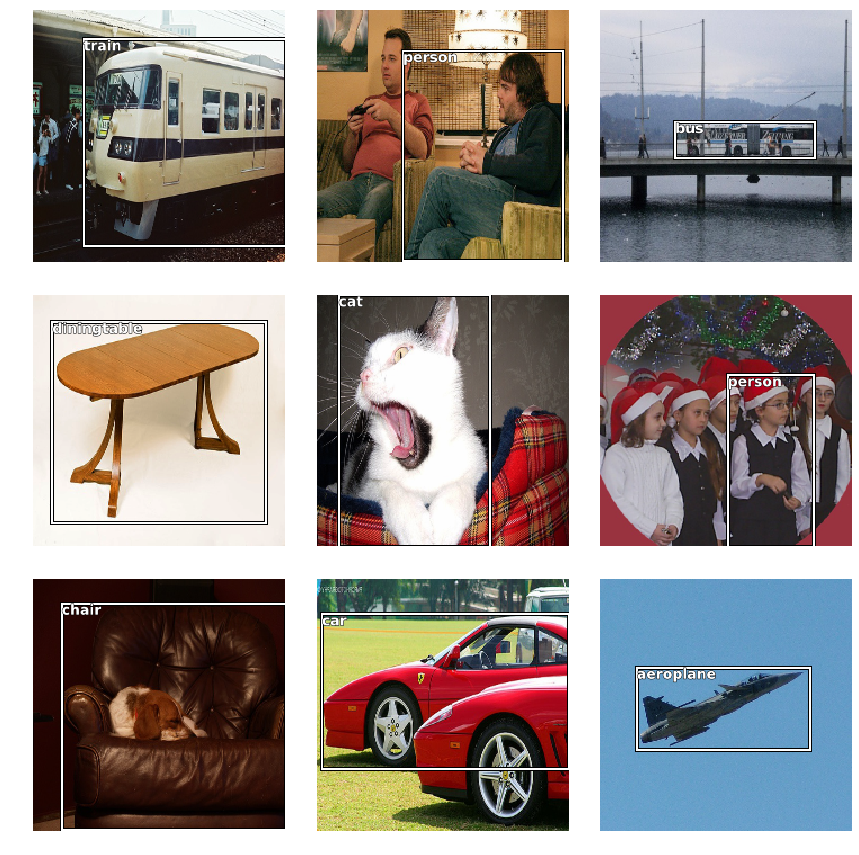

In [550]:
data.show_batch(rows=3)

In [351]:
data.train_ds.y[0].labels, data.train_ds.y[0].data

(array([Category cat], dtype=object),
 (tensor([[-0.2400, -0.1467,  0.0080,  0.0667]]), array([8])))

In [413]:
data.c

21

### Last layers of the model to perform the regression

In [414]:
head_reg4 = nn.Sequential(
    Flatten(), 
    nn.ReLU(),
    nn.Dropout(0.5),    
    nn.Linear(25088, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 4+data.c)
)




### Loss function

1. The loss function now is the combined loss function for classification and regression together.
2. The `detn_classification_loss` computes the `F.cross_entropy` loss for image classification
3. The `detn_l1_loss` computes the `nn.L1Loss()` for the bounding box regression
4. The losses are added together with a multiple `20` so that the scales match. It's obtained from trial and error
5. For the bounding boxes we know the input is going to be between 0 and 224 so the sigmoid forces it between 0 and 1 and multiplying it by 224 it brings it with our required range.

In [453]:
def detn_loss(input, target, targ_cls):    
    bbox_targ = target
    bbox_inp, cat_inp = input[:, :4], input[:, 4:]    
    bbox_inp = bbox_inp[:, None]    
#   print(f' bbox_inp {bbox_inp}, bbox_targ {bbox_targ}')
    bbox_inp = torch.sigmoid(bbox_inp) * 224
    bbox_targ = torch.sigmoid(bbox_targ) * 224
#   print(f' bbox_inp2 {bbox_inp}, bbox_targ2 {bbox_targ}')
    return F.l1_loss(bbox_inp, bbox_targ) + F.cross_entropy(cat_inp, targ_cls.flatten())* 20


def detn_l1(input, target, _targ_cls):    
    bbox_targ = target
    bbox_inp = input[:, :4]
    bbox_inp = bbox_inp[:, None]
    bbox_inp = torch.sigmoid(bbox_inp) * 224
    bbox_targ = torch.sigmoid(bbox_targ) * 224
    return F.l1_loss(bbox_inp, bbox_targ).data

def detn_acc(input, _target, targ_cls):        
    cat_inp = input[:, 4:]
    return accuracy(cat_inp, targ_cls.flatten())


# def loss_fn(preds, targs, class_idxs):
#     return nn.L1Loss()(preds, targs.squeeze())


In [454]:
ll = None
ll = cnn_learner(data, models.resnet34, custom_head=head_reg4, loss_func=detn_loss, metrics=[detn_acc, detn_l1])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03
Min loss divided by 10: 1.00E-02


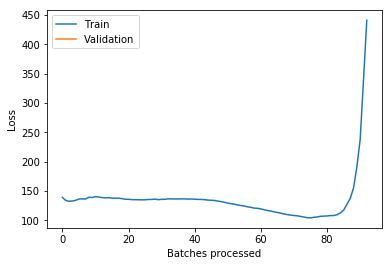

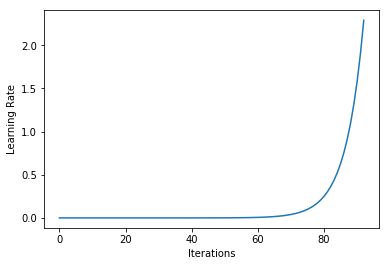

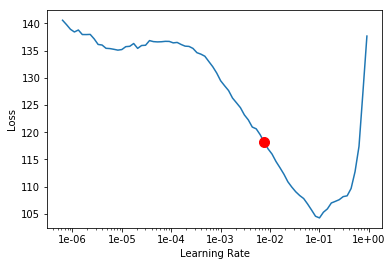

In [455]:
def learning_rate_plots(learner):
    learner.lr_find()
    learner.recorder.plot_losses()
    learner.recorder.plot_lr()
    learner.recorder.plot(suggestion=True)
    
learning_rate_plots(ll)

In [456]:
ll.fit_one_cycle(5, slice(1e-2))

In [358]:
def save_model(learner):
    return learner.save(Path(MODEL_PATH/'ssd_model'))

def save_learner(learner):
    return learner.export(Path(MODEL_PATH/'ssd_learner'))

def save(ll):
    return (save_model(ll), save_learner(ll))

In [457]:
save(ll)


(None, None)

In [458]:
ll.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 6.31E-08


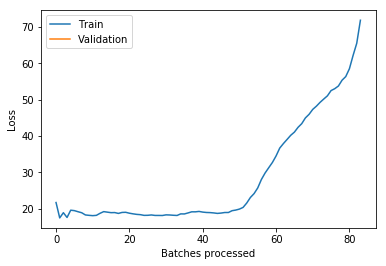

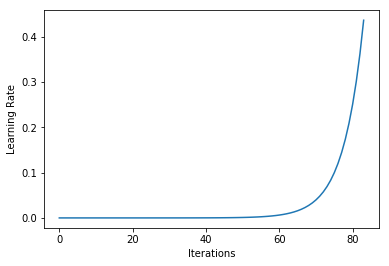

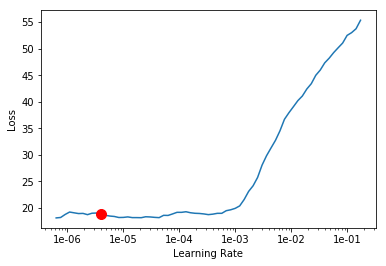

In [459]:
learning_rate_plots(ll)

Min numerical gradient: 3.98E-06
Min loss divided by 10: 2.09E-06


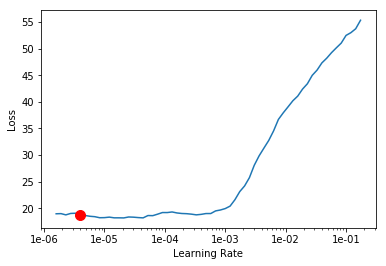

In [460]:
ll.recorder.plot(suggestion=True, skip_start=15)

In [461]:
ll.fit_one_cycle(2, slice(6e-6))

In [462]:
ll.freeze()

In [463]:
save(ll)

(None, None)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.31E-06


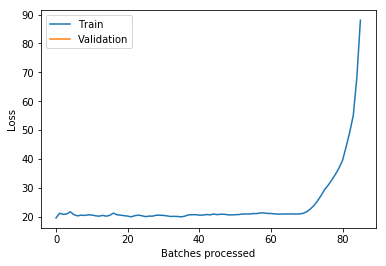

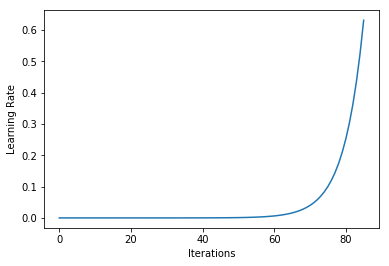

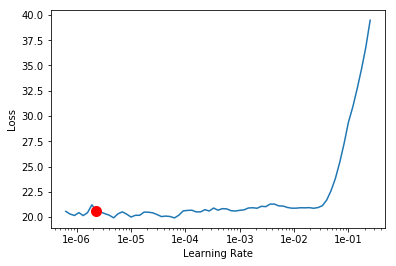

In [464]:
learning_rate_plots(ll)

In [465]:
ll.fit_one_cycle(2, slice(3e-6))

In [466]:
save(ll)

(None, None)

In [1]:
preds = ll.pred_batch(ds_type=DatasetType.Valid, reconstruct=False)


NameError: name 'll' is not defined

In [612]:
preds[0]

tensor([-0.3989, -0.7566,  0.6548,  0.7396, -2.8378,  1.2836, -0.7165, -1.9183,
         2.9272, -1.0188,  0.6322,  9.2873, -2.7018, -0.7693, -2.1275, -0.6307,
        -0.9311, -1.9422,  2.2758,  1.8933, -2.2006, -4.1762, -0.2901, -1.1906,
        -3.2298])

In [624]:
def get_preds(ll, preds, idx):
    preds = preds[idx] 
    coords, cat = preds[:4], preds[4:]
    coords = (coords + 1) * 248
#     print(coords)
    cat_idx = torch.argmax(cat)
    cat = ll.data.classes[cat_idx]
    return (coords), cat


def display_preds(data, idx, ll, preds):
    img = data.valid_ds.x[idx]
    coords, cat = get_preds(ll, preds, idx)    
    bbox = ImageBBox.create(*img.size, [coords.tolist()], labels=[0], classes=[cat])
    img.show(y=bbox, figsize=(10, 10))


In [625]:
coords, cat = get_preds(ll, preds, 3); coords, cat

(tensor([154.0149, 121.2469, 420.0589, 344.8482]), 'chair')

In [ ]:
for i, _ in enumerate(preds):
    display_preds(data, i, ll, preds)

In [308]:
#img_bbox = ImageBBox.create(*img.size, bb, labels=[0], classes=list(category_name))        

In [483]:
coords, cat = preds[:, :4], preds[:, 4:]
coords[:2], cat[:2]

(tensor([[-0.3989, -0.7566,  0.6548,  0.7396],
         [-0.5936, -0.6976,  0.8938,  0.6963]]),
 tensor([[-2.8378,  1.2836, -0.7165, -1.9183,  2.9272, -1.0188,  0.6322,  9.2873,
          -2.7018, -0.7693, -2.1275, -0.6307, -0.9311, -1.9422,  2.2758,  1.8933,
          -2.2006, -4.1762, -0.2901, -1.1906, -3.2298],
         [-3.3202, -3.1743, -1.1098, -2.2190, -1.0749, -3.1534,  2.0953,  1.3536,
          -1.0329,  1.0083, -1.5490, -3.5728,  0.0425,  0.3873, -1.7954,  3.2375,
          -0.8440, -3.2466,  0.7733,  1.8535,  1.0193]]))

In [481]:
data.norm

functools.partial(<function _normalize_batch at 0x7f4f08164ea0>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)

In [551]:
ll.data = data

In [552]:
ds = ll.data.valid_ds
coords, cat = ds.y.analyze_pred(preds)


Analyze Preds - tensor([[-0.3989, -0.7566,  0.6548,  0.7396, -2.8378,  1.2836, -0.7165, -1.9183,
          2.9272, -1.0188,  0.6322,  9.2873, -2.7018, -0.7693, -2.1275, -0.6307,
         -0.9311, -1.9422,  2.2758,  1.8933, -2.2006, -4.1762, -0.2901, -1.1906,
         -3.2298],
        [-0.5936, -0.6976,  0.8938,  0.6963, -3.3202, -3.1743, -1.1098, -2.2190,
         -1.0749, -3.1534,  2.0953,  1.3536, -1.0329,  1.0083, -1.5490, -3.5728,
          0.0425,  0.3873, -1.7954,  3.2375, -0.8440, -3.2466,  0.7733,  1.8535,
          1.0193],
        [ 0.1940, -0.4394,  0.8363,  0.5659, -3.2288, -2.7063, -2.1677, -2.3239,
         -2.5409, -1.7776, -3.0771, -1.0793, -1.1606,  5.1279, -2.9721,  5.7861,
         -0.6945, -3.8344, -1.4711,  1.3005,  0.4645, -2.2108,  5.5591, -2.0186,
         -0.7460],
        [-0.3790, -0.5111,  0.6938,  0.3905, -3.1158, -1.7862, -0.3221,  0.9189,
         -4.0368, -1.2893, -1.1343, -4.2908,  0.9999,  3.6696,  1.0136, -0.5826,
          1.2780,  0.5332, -4.8928, 

In [556]:
# [(   ll.data.classes[torch.argmax(c).item()],
#         torch.argmax(c)  ) for c in cat ]

coords, cat
ll.show_results(preds)

  
  


Analyze Preds - tensor([-0.2716, -0.2866,  0.2734,  0.1590, -2.2974, -2.1166,  0.7617,  0.0355,
        -1.7221, -1.1821, -0.5488,  0.0445,  4.8037,  1.7206, -0.8726, -0.3703,
         1.9559, -2.8361, -2.3466,  0.3871, -0.5879,  2.2220,  2.1640, -2.5883,
        -1.0271])
Analyze Preds - tensor([-8.1227e-01, -8.4167e-01,  1.0760e+00,  5.9301e-01, -4.4661e+00,
        -4.2082e+00,  4.9549e-01, -5.4492e-01, -4.6190e+00, -2.7589e+00,
        -4.2308e+00, -3.7352e+00, -2.9096e+00,  1.9881e+00, -4.4947e+00,
         1.1725e+00, -2.2646e+00,  4.4193e-01, -1.9638e+00,  8.3573e+00,
         5.2904e-03, -4.7508e+00,  2.4933e+00, -2.6726e+00, -3.4001e+00])
Analyze Preds - tensor([ 0.1614, -0.5308,  0.9073,  0.2062, -2.1577, -3.8486,  1.0581,  0.9451,
        -0.4833, -1.2294, -1.5036, -2.0336,  4.3527,  1.3670,  0.0917, -1.0815,
         2.8181, -0.7270, -1.6488, -0.2600,  1.2898,  0.3272,  0.1643, -4.0512,
        -0.1528])
Analyze Preds - tensor([-0.9161, -0.7033,  0.8440,  0.7224, -4.1765, -

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [93]:

# Working on 2D array 
array = np.arange(12).reshape(3, 4) 
print("INPUT ARRAY : \n", array) 
  
# No axis mentioned, so works on entire array 
print("\nMax element : ", np.argmax(array)) 
  
# returning Indices of the max element 
# as per the indices 
print("\nIndices of Max element : ", np.argmax(array, axis=0)) 
print("\nIndices of Max element : ", np.argmax(array, axis=1)) 

INPUT ARRAY : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Max element :  11

Indices of Max element :  [2 2 2 2]

Indices of Max element :  [3 3 3]


In [105]:
t = tensor([[-2.1163, -0.1529, -4.3530,  0.5818, -3.5088, -0.5682,  1.3556, -0.0075,
         -0.4016, -1.8204, -0.9301, -4.6915, -2.3219,  0.2618, -1.5950, -1.7867,
         -2.7522, -0.4517, -0.9721,  0.8649, -1.0931],
        [-2.3464, -0.9473, -2.5026, -0.4197, -0.5125, -1.4268, -2.8730, -1.8945,
          1.5046,  2.7074,  2.6540,  0.2486,  2.0899,  1.4136, -1.9787, -1.9030,
          0.8942, -0.0477, -1.9182, -2.6095, -1.1108],
        [-0.2549, -0.6058,  3.1297, -3.6288,  0.5057, -1.9515,  2.4702,  1.9680,
         -1.3292,  1.2449, -2.2651, -0.4873,  0.6268,  0.1598, -3.8778,  3.7636,
         -1.1991, -0.6505, -0.0861,  0.5506, -0.4007],
        [ 0.7644, -0.1598, -2.5166,  0.9598,  1.4598,  2.2113, -1.4944, -1.3518,
          1.1358,  1.6619,  0.1288, -1.9740,  2.5980, -1.8787,  0.6560,  0.2229,
          1.9851, -0.8318, -1.0168,  0.7231,  0.2810],
        [ 2.3857,  2.8859,  6.3624,  2.6127, -0.8805, -3.8515,  1.0065,  0.7206,
         -1.1582, -1.4865,  6.1983,  1.5816,  0.4026,  1.6081,  1.1813,  0.6382,
          1.8382, -3.3976,  1.9499, -0.3796,  1.2721],
        [-1.5806,  2.9969,  2.4224,  1.8233, -1.6952, -1.3316, -3.0557,  1.1404,
          0.3920, -0.2095, -3.2165,  2.7279,  1.3599, -0.6942,  0.3327, -0.1622,
          1.3329,  1.8338, -0.8617, -1.4370, -1.2067],
        [-0.7190,  2.8399,  1.7509, -3.6996, -1.4082,  0.2870, -2.6082,  1.2685,
          1.6765,  0.7541, -0.4532, -0.0404,  0.4406,  1.5347,  1.1949,  1.7283,
         -1.8429,  3.0281, -0.5650,  0.7932, -0.5971],
        [ 1.2187,  1.0409,  4.2863,  3.6342, -0.3365,  0.9562,  1.1641, -0.5557,
         -1.4098, -1.8420, -0.1154,  1.5274,  0.5468, -1.1585,  0.5739, -0.4262,
         -0.0162,  0.5581, -2.4665, -1.9642,  0.3878],
        [-2.8416,  2.3072,  3.4315,  5.2539,  0.5007,  0.6449, -3.0669, -0.2132,
          1.2919,  1.3295,  0.2945, -1.4603, -3.5085, -0.3023,  2.1940, -1.1809,
         -2.7685, -2.0042,  4.2876, -2.0003,  2.0714],
        [ 4.3750,  1.7836, -0.5288,  2.0673, -0.1358, -0.3949,  0.0766,  2.1170,
          0.9271, -0.1077, -0.2827, -3.5501, -1.0935,  3.6697, -0.0416, -0.6354,
          2.1121,  0.2654,  0.1754, -0.1907,  0.0239],
        [ 0.8350, -0.8574,  3.7547, -1.4495,  0.9226,  0.5098, -0.6908, -0.6366,
          0.4017,  1.6858, -0.0639,  0.6801, -1.4067, -0.9318,  5.1943, -1.9728,
          0.2539, -4.5285,  1.9681, -0.1656,  0.0324],
        [-3.0008,  0.5453,  2.2409, -2.2910, -0.5044, -1.1864, -0.5756,  0.3562,
         -0.6876, -1.9140,  0.7949, -0.0626, -1.6548,  2.0876,  1.2976,  3.4340,
         -2.4562,  2.1090, -0.2445, -0.4483, -1.8172],
        [-2.1656,  1.7742, -0.4236, -0.0401, -0.1725,  1.6100, -0.0741, -0.2882,
          0.0577, -1.3118, -0.7407, -2.3311,  1.2231, -1.5233, -4.2003,  3.0452,
         -0.6190,  5.6453, -2.1057,  3.5737,  0.2061],
        [ 1.0055,  0.7920,  1.6283, -3.2475, -0.3560,  0.1982,  1.2153, -0.1410,
         -3.4955,  1.4771, -1.4187, -1.1580, -0.2306,  2.3343, -0.2561,  2.3702,
         -3.9847, -1.0153, -1.3788,  2.8939, -1.9171],
        [ 3.2468, -4.3112, -4.1761,  2.9852, -1.2581,  4.8841, -4.3444, -3.0640,
         -3.1998,  0.4115, -1.0995,  3.2421,  2.2586, -1.6958,  4.1650,  0.8571,
          4.0937, -0.2173, -1.6809,  1.6518, -1.2414],
        [ 0.3386, -0.6140, -2.7650, -1.3225,  0.8490, -0.6342, -1.5933,  2.2324,
         -0.0982,  0.8543,  0.2211,  1.2430, -0.3430,  2.1318,  1.1595,  0.9187,
         -1.4652,  4.8514,  2.5087, -1.9419, -2.9498]])

sm = F.softmax(t)
xx = torch.argmax(sm, axis=1)
xx.unsqueeze(1).shape

targ_cls = tensor([[ 3],
        [15],
        [15],
        [15],
        [ 3],
        [16],
        [ 1],
        [19],
        [ 4],
        [15],
        [10],
        [ 9],
        [17],
        [12],
        [ 8],
        [ 1]])

# softmax = F.softmax(t)
# cat_inp = torch.argmax(softmax, axis=1).unsqueeze(1)
# F.cross_entropy(cat_inp.squeeze(), targ_cls.squeeze())
# F.nll_loss(F.log_softmax(t, -1), targ_cls)
F.cross_entropy(t, targ_cls.flatten())

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(4.4253)

In [118]:
tt=  tensor([[[-0.3663, -0.0467,  0.9841,  0.9973]],

        [[-0.3355, -0.1484,  0.7858,  0.3192]],

        [[-0.8321, -0.9841,  0.5441,  0.9894]],

        [[-0.1437, -0.3201,  0.3059,  0.0118]],

        [[-0.6228,  0.2642, -0.0194,  0.6769]],

        [[-0.6583, -0.8951,  0.6253,  0.9280]],

        [[-0.1651, -0.9078,  0.4021, -0.6007]],

        [[-0.8919, -0.3080,  0.0571,  0.5160]],

        [[-0.7398, -0.3776,  0.9661,  1.0000]],

        [[-0.2681, -0.7767,  0.9108,  0.6505]],

        [[ 0.1307, -0.2200,  1.0000,  1.0000]],

        [[ 0.2278, -0.5849,  0.8769,  0.0550]],

        [[-0.7772, -0.9957,  0.8825,  0.8796]],

        [[-0.3938, -0.0449,  0.2816,  0.9874]],

        [[-0.4481, -0.1777,  0.5225,  0.5747]],

        [[-0.3632, -0.5912,  0.3734,  0.9634]]])

F.sigmoid(tt)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[0.4094, 0.4883, 0.7279, 0.7305]],

        [[0.4169, 0.4630, 0.6869, 0.5791]],

        [[0.3032, 0.2721, 0.6328, 0.7290]],

        [[0.4641, 0.4207, 0.5759, 0.5029]],

        [[0.3491, 0.5657, 0.4952, 0.6630]],

        [[0.3411, 0.2901, 0.6514, 0.7167]],

        [[0.4588, 0.2875, 0.5992, 0.3542]],

        [[0.2907, 0.4236, 0.5143, 0.6262]],

        [[0.3230, 0.4067, 0.7243, 0.7311]],

        [[0.4334, 0.3150, 0.7132, 0.6571]],

        [[0.5326, 0.4452, 0.7311, 0.7311]],

        [[0.5567, 0.3578, 0.7062, 0.5137]],

        [[0.3149, 0.2698, 0.7073, 0.7067]],

        [[0.4028, 0.4888, 0.5699, 0.7286]],

        [[0.3898, 0.4557, 0.6277, 0.6398]],

        [[0.4102, 0.3564, 0.5923, 0.7238]]])

### Metrics added from Radek's Fluke detector computation

The IOU metrics seems to compute the ratio area of intersection of the prediction over their union of area of prediction.

```python
def intersection(preds, targs):
    # preds and targs are of shape (bs, 4), pascal_voc format
    max_xy = torch.min(preds[:, 2:], targs[:, 2:])
    min_xy = torch.max(preds[:, :2], targs[:, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, 0] * inter[:, 1]

def area(boxes): 
    return ((boxes[:, 2]-boxes[:, 0]) * (boxes[:, 3]-boxes[:, 1]))

def union(preds, targs):
    return area(preds) + area(targs) - intersection(preds, targs)

def IoU(preds, targs):
    return intersection(preds, targs) / union(preds, targs)

```

In [141]:

# Working on 2D array 
array = np.arange(12).reshape(3, 4) 
print("INPUT ARRAY : \n", array) 
  
# No axis mentioned, so works on entire array 
print("\nMax element : ", np.argmax(array)) 
  
# returning Indices of the max element 
# as per the indices 
print("\nIndices of Max element : ", np.argmax(array, axis=0)) 
print("\nIndices of Max element : ", np.argmax(array, axis=1)) 

INPUT ARRAY : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Max element :  11

Indices of Max element :  [2 2 2 2]

Indices of Max element :  [3 3 3]


In [64]:
t = tensor([[-2.1163, -0.1529, -4.3530,  0.5818, -3.5088, -0.5682,  1.3556, -0.0075,
         -0.4016, -1.8204, -0.9301, -4.6915, -2.3219,  0.2618, -1.5950, -1.7867,
         -2.7522, -0.4517, -0.9721,  0.8649, -1.0931],
        [-2.3464, -0.9473, -2.5026, -0.4197, -0.5125, -1.4268, -2.8730, -1.8945,
          1.5046,  2.7074,  2.6540,  0.2486,  2.0899,  1.4136, -1.9787, -1.9030,
          0.8942, -0.0477, -1.9182, -2.6095, -1.1108],
        [-0.2549, -0.6058,  3.1297, -3.6288,  0.5057, -1.9515,  2.4702,  1.9680,
         -1.3292,  1.2449, -2.2651, -0.4873,  0.6268,  0.1598, -3.8778,  3.7636,
         -1.1991, -0.6505, -0.0861,  0.5506, -0.4007],
        [ 0.7644, -0.1598, -2.5166,  0.9598,  1.4598,  2.2113, -1.4944, -1.3518,
          1.1358,  1.6619,  0.1288, -1.9740,  2.5980, -1.8787,  0.6560,  0.2229,
          1.9851, -0.8318, -1.0168,  0.7231,  0.2810],
        [ 2.3857,  2.8859,  6.3624,  2.6127, -0.8805, -3.8515,  1.0065,  0.7206,
         -1.1582, -1.4865,  6.1983,  1.5816,  0.4026,  1.6081,  1.1813,  0.6382,
          1.8382, -3.3976,  1.9499, -0.3796,  1.2721],
        [-1.5806,  2.9969,  2.4224,  1.8233, -1.6952, -1.3316, -3.0557,  1.1404,
          0.3920, -0.2095, -3.2165,  2.7279,  1.3599, -0.6942,  0.3327, -0.1622,
          1.3329,  1.8338, -0.8617, -1.4370, -1.2067],
        [-0.7190,  2.8399,  1.7509, -3.6996, -1.4082,  0.2870, -2.6082,  1.2685,
          1.6765,  0.7541, -0.4532, -0.0404,  0.4406,  1.5347,  1.1949,  1.7283,
         -1.8429,  3.0281, -0.5650,  0.7932, -0.5971],
        [ 1.2187,  1.0409,  4.2863,  3.6342, -0.3365,  0.9562,  1.1641, -0.5557,
         -1.4098, -1.8420, -0.1154,  1.5274,  0.5468, -1.1585,  0.5739, -0.4262,
         -0.0162,  0.5581, -2.4665, -1.9642,  0.3878],
        [-2.8416,  2.3072,  3.4315,  5.2539,  0.5007,  0.6449, -3.0669, -0.2132,
          1.2919,  1.3295,  0.2945, -1.4603, -3.5085, -0.3023,  2.1940, -1.1809,
         -2.7685, -2.0042,  4.2876, -2.0003,  2.0714],
        [ 4.3750,  1.7836, -0.5288,  2.0673, -0.1358, -0.3949,  0.0766,  2.1170,
          0.9271, -0.1077, -0.2827, -3.5501, -1.0935,  3.6697, -0.0416, -0.6354,
          2.1121,  0.2654,  0.1754, -0.1907,  0.0239],
        [ 0.8350, -0.8574,  3.7547, -1.4495,  0.9226,  0.5098, -0.6908, -0.6366,
          0.4017,  1.6858, -0.0639,  0.6801, -1.4067, -0.9318,  5.1943, -1.9728,
          0.2539, -4.5285,  1.9681, -0.1656,  0.0324],
        [-3.0008,  0.5453,  2.2409, -2.2910, -0.5044, -1.1864, -0.5756,  0.3562,
         -0.6876, -1.9140,  0.7949, -0.0626, -1.6548,  2.0876,  1.2976,  3.4340,
         -2.4562,  2.1090, -0.2445, -0.4483, -1.8172],
        [-2.1656,  1.7742, -0.4236, -0.0401, -0.1725,  1.6100, -0.0741, -0.2882,
          0.0577, -1.3118, -0.7407, -2.3311,  1.2231, -1.5233, -4.2003,  3.0452,
         -0.6190,  5.6453, -2.1057,  3.5737,  0.2061],
        [ 1.0055,  0.7920,  1.6283, -3.2475, -0.3560,  0.1982,  1.2153, -0.1410,
         -3.4955,  1.4771, -1.4187, -1.1580, -0.2306,  2.3343, -0.2561,  2.3702,
         -3.9847, -1.0153, -1.3788,  2.8939, -1.9171],
        [ 3.2468, -4.3112, -4.1761,  2.9852, -1.2581,  4.8841, -4.3444, -3.0640,
         -3.1998,  0.4115, -1.0995,  3.2421,  2.2586, -1.6958,  4.1650,  0.8571,
          4.0937, -0.2173, -1.6809,  1.6518, -1.2414],
        [ 0.3386, -0.6140, -2.7650, -1.3225,  0.8490, -0.6342, -1.5933,  2.2324,
         -0.0982,  0.8543,  0.2211,  1.2430, -0.3430,  2.1318,  1.1595,  0.9187,
         -1.4652,  4.8514,  2.5087, -1.9419, -2.9498]])

sm = F.softmax(t)
xx = torch.argmax(sm, axis=1)
xx.unsqueeze(1).shape

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([16, 1])

In [90]:
targ_cls = tensor([[ 3],
        [15],
        [15],
        [15],
        [ 3],
        [16],
        [ 1],
        [19],
        [ 4],
        [15],
        [10],
        [ 9],
        [17],
        [12],
        [ 8],
        [ 1]])

# softmax = F.softmax(t)
# cat_inp = torch.argmax(softmax, axis=1).unsqueeze(1)
# F.cross_entropy(cat_inp.squeeze(), targ_cls.squeeze())
F.nll_loss(F.log_softmax(t, -1), targ_cls)

RuntimeError: 1D target tensor expected, multi-target not supported

In [177]:
xxx = torch.rand(64).resize(16,4)
xxx[:, None].shape

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/tensor.py:362: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


torch.Size([16, 1, 4])

### Define a metric lambda

```python
ll.metrics = [lambda preds, targs, _: IoU(preds, targs.squeeze()).mean()]
```

In [112]:
#ll.model

In [113]:
#ll.summary()

In [114]:
#categories

In [115]:
#ll.data.train_ds[0][1].labels

In [105]:
ll.lr_find()

bbox_input: torch.Size([16, 4]), bbox_target: torch.Size([16, 1, 4]), cat_inp: torch.Size([16, 21]) cat_targ: torch.Size([16, 1])


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Using a target size (torch.Size([16, 1, 4])) that is different to the input size (torch.Size([16, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


NameError: name 'cat_targ' is not defined

Min numerical gradient: 1.45E-01
Min loss divided by 10: 1.20E-04


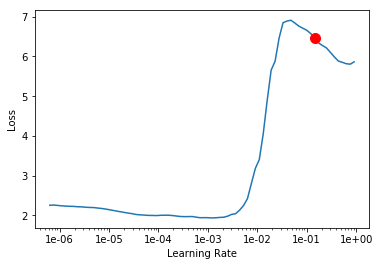

In [369]:
ll.recorder.plot(suggestion=True)

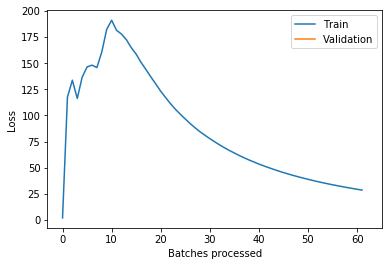

In [311]:
ll.recorder.plot_losses()

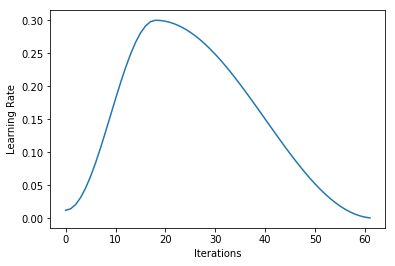

In [310]:
ll.recorder.plot_lr()

In [370]:
ll.fit_one_cycle(1, slice(6e-1))

tensor([[[-0.9691, -1.0000,  0.9543,  1.0000]],

        [[-0.6968, -0.2840,  0.5097,  0.9240]],

        [[-0.9512, -0.8129,  0.4539,  0.9143]],

        [[-0.3034, -0.9731,  1.0000,  0.3238]],

        [[-0.4562, -0.2122,  0.0774,  0.4800]],

        [[-0.3428, -1.0000,  1.0000,  1.0000]],

        [[-0.7547, -0.0080,  0.5893,  0.9440]],

        [[-0.3156, -0.9759,  0.9671,  0.4027]],

        [[-0.1059, -0.5291,  0.9994,  0.4017]],

        [[-0.4054, -1.0000,  0.6638,  0.9192]],

        [[-0.0511, -0.2240,  0.4474,  0.1120]],

        [[-0.4790, -0.8578,  0.6040,  0.9704]],

        [[-0.5791, -0.4189,  0.4267,  0.3773]],

        [[-0.7615, -0.8198,  0.6562,  0.9017]],

        [[-0.1243, -0.5179,  0.2076, -0.2143]],

        [[-0.7974,  0.4600,  0.1467,  0.6600]],

        [[-0.4994, -0.3027,  0.6975,  0.1780]],

        [[-0.7387, -0.5800,  1.0000,  0.6520]],

        [[-0.4285, -0.9402,  0.2541,  0.6400]],

        [[-0.7270,  0.0348,  0.9333,  0.9784]],

        [[-0.9553, -

tensor([[[-0.2976, -0.7961,  0.4719,  0.6282]],

        [[ 0.1839,  0.0481,  0.6000,  0.1563]],

        [[-0.7725, -0.9854,  0.8282,  0.0894]],

        [[-0.0200,  0.2797,  0.8623,  0.8268]],

        [[-0.9945, -0.9925,  0.9820,  0.0445]],

        [[-0.3175, -0.2402,  0.1574,  0.4041]],

        [[-0.1468, -0.1495,  0.4805,  0.8106]],

        [[-0.4876, -0.5426,  1.0000,  0.9649]],

        [[ 0.0098, -0.2417,  0.2466,  0.1097]],

        [[-0.9712, -0.9488,  1.0000,  0.9145]],

        [[-0.8671, -0.4846,  0.9049,  0.4616]],

        [[-0.8560, -0.9160,  0.4560,  0.0040]],

        [[-0.1687, -0.8006,  0.6910,  0.3641]],

        [[-0.0806,  0.3573,  0.2278,  1.0000]],

        [[-0.7622, -0.3677,  0.6171,  0.1091]],

        [[-0.6400, -0.4924,  0.5559,  0.5883]],

        [[-0.0776, -0.9843,  0.8029,  0.8600]],

        [[-0.4768, -0.2688,  0.6785,  0.9058]],

        [[-0.0580, -0.4722,  0.6639,  0.6214]],

        [[-0.5322, -0.4484,  1.0000,  0.7758]],

        [[-0.2994, -

tensor([[[-0.4218, -0.5744,  0.7261,  0.2634]],

        [[-0.8716,  0.0987,  1.0000,  0.9656]],

        [[-0.3964, -0.3074,  0.8484,  0.6993]],

        [[-0.7940, -0.8550,  0.8815,  0.5547]],

        [[-0.3680, -0.7624,  0.9881, -0.1611]],

        [[-0.7888, -0.6963,  0.9516,  0.7041]],

        [[-1.0000, -0.1688,  1.0000,  0.9898]],

        [[-0.2425, -0.8329,  0.7176,  0.3833]],

        [[-0.4595, -0.7320,  0.4835, -0.3000]],

        [[-0.8372, -0.4201,  0.4787,  0.2773]],

        [[-0.0675, -0.4902,  0.2066,  0.1029]],

        [[-0.3277, -0.4915,  0.1804,  0.6288]],

        [[-0.3559, -0.9406,  0.8087,  0.9283]],

        [[-0.6703, -0.6979,  1.0000,  0.9822]],

        [[-0.4085, -0.7975,  0.3881,  0.6544]],

        [[-1.0000, -0.8809,  0.1338,  0.3632]],

        [[ 0.1132, -0.3839,  1.0000,  1.0000]],

        [[-0.5127,  0.1998,  1.0000,  0.9984]],

        [[-0.7024, -0.9872,  0.8194, -0.0368]],

        [[-0.5544, -0.9627,  0.4504,  0.9133]],

        [[ 0.3887, -

tensor([[[-0.1467, -0.1041,  0.3441,  0.1242]],

        [[-0.7877, -0.1389,  0.4780,  0.5788]],

        [[-0.9608, -0.9959,  0.9553, -0.3363]],

        [[ 0.0400, -0.9532,  1.0000,  0.7184]],

        [[-0.4285, -0.6525,  1.0000,  0.9898]],

        [[-0.9878, -0.7981,  1.0000,  1.0000]],

        [[ 0.5376, -0.7880,  0.7118, -0.5519]],

        [[-0.3958, -0.9862,  0.4848,  0.9940]],

        [[-0.9941, -1.0000,  1.0000,  0.5041]],

        [[-0.3569, -0.2920,  1.0000,  0.9520]],

        [[-0.9602, -0.6887,  1.0000,  0.2566]],

        [[ 0.0048, -0.2907,  1.0000,  0.7676]],

        [[ 0.1251, -0.9065,  0.5971, -0.5266]],

        [[-0.2486, -0.7947,  0.5398, -0.1920]],

        [[-0.5869, -0.5933,  0.6988,  0.7417]],

        [[-0.5195, -0.8570,  0.6399,  0.7941]],

        [[-0.4215, -0.4258,  0.8558,  0.6373]],

        [[-0.9182, -0.9631,  0.9637,  0.5782]],

        [[-0.6048, -1.0000,  0.4795,  1.0000]],

        [[-0.0691,  0.1562,  0.8569,  0.9872]],

        [[-0.4111, -

tensor([[[-0.7242, -0.9729,  1.0000,  1.0000]],

        [[ 0.4825, -0.4112,  0.5756, -0.0712]],

        [[-0.4906, -0.4963,  0.6499,  0.4897]],

        [[-0.4485,  0.0143,  0.4102,  0.6022]],

        [[-0.9011, -1.0000,  0.6466,  0.3496]],

        [[-0.3227, -0.0961,  0.1629,  0.2762]],

        [[-0.1714, -0.6480,  0.4715,  0.2360]],

        [[-0.7210, -1.0000,  0.5391,  0.9888]],

        [[-0.1042, -0.1647,  0.8571,  0.0937]],

        [[-0.8657, -0.6043,  0.1351, -0.1792]],

        [[-0.8310, -0.3462,  0.6806,  0.8610]],

        [[-0.4699, -0.9909,  0.3127,  0.9901]],

        [[-0.8880, -0.6416,  0.8902,  0.7156]],

        [[-0.3482, -0.2628,  0.2410,  0.5644]],

        [[-0.7907, -0.9802,  0.5332,  0.9841]],

        [[-0.4878, -0.6604,  0.4215,  0.1676]],

        [[-0.9446, -0.7754,  0.9273,  0.8932]],

        [[-0.1626, -0.9623,  0.7860,  0.0048]],

        [[-0.2047,  0.4439,  0.6930,  1.0000]],

        [[-0.1472,  0.4539,  0.2759,  0.9138]],

        [[-0.8627, -

tensor([[[-0.5447, -1.0000, -0.0061,  0.9367]],

        [[-0.5769, -0.3412,  0.9852,  0.3455]],

        [[-0.5972, -0.9493,  0.9686,  0.9450]],

        [[-0.7672, -1.0000,  0.5424,  0.4635]],

        [[-0.9971, -0.9873,  0.4462,  0.3084]],

        [[-0.2810, -0.6560,  0.7584,  0.3161]],

        [[-0.2120, -0.5880,  0.9225,  0.4281]],

        [[-0.9607,  0.1902,  1.0000,  0.9835]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.6893, -0.9770,  1.0000, -0.0546]],

        [[-0.8795, -0.4149,  0.3363,  0.4677]],

        [[-0.9759, -1.0000,  1.0000,  0.8896]],

        [[-0.3669, -0.6401,  0.7043,  0.2922]],

        [[-0.7867, -0.5280,  1.0000,  0.6600]],

        [[-0.0087, -0.2334,  0.2482,  1.0000]],

        [[-0.3820, -0.8469,  0.7210,  0.9216]],

        [[-0.1937, -0.3829,  0.2925,  0.6126]],

        [[-0.7460, -0.2749,  0.8987,  1.0000]],

        [[-0.7709, -1.0000,  0.9630,  0.6963]],

        [[ 0.1621, -0.2076,  0.4210,  0.2441]],

        [[-0.9947, -

tensor([[[-0.5601, -0.5788,  1.0000,  0.6801]],

        [[-0.2205, -0.5635,  0.1864, -0.1512]],

        [[-0.7976, -0.6084,  0.8418,  0.8422]],

        [[-1.0000, -1.0000,  0.7600,  0.6760]],

        [[-0.6229, -0.2192, -0.3566,  0.1132]],

        [[-0.0037, -0.9958,  0.9639, -0.0084]],

        [[-1.0000, -1.0000,  0.8157,  1.0000]],

        [[-0.4837, -0.2198,  0.7929,  0.1614]],

        [[-0.5127, -0.6798,  1.0000,  1.0000]],

        [[-0.7609, -0.1683,  0.3862,  0.3323]],

        [[-0.5330, -0.4381,  0.4495,  0.2527]],

        [[-0.1328,  0.1151,  0.3838,  0.8802]],

        [[-0.4777, -0.1030,  0.9562,  1.0000]],

        [[-0.0881, -0.6600,  0.6267,  0.8241]],

        [[-0.5786, -0.9948,  1.0000,  1.0000]],

        [[-0.9731, -0.3056,  1.0000,  1.0000]],

        [[-0.3973, -0.9720,  0.5573,  0.9640]],

        [[-0.1029, -0.1165,  0.9004,  0.1921]],

        [[-1.0000, -1.0000,  1.0000,  0.6462]],

        [[ 0.1470, -0.9677,  0.9154,  0.9585]],

        [[-0.5680,  

tensor([[[-3.7639e-01,  2.4108e-01,  9.5320e-01,  7.4642e-01]],

        [[ 1.4630e-01,  5.1606e-01,  4.1846e-01,  9.0417e-01]],

        [[ 4.2170e-01,  1.9324e-01,  6.4343e-01,  6.5254e-01]],

        [[-4.1926e-01, -1.2879e-01,  9.8278e-01,  9.2834e-01]],

        [[-2.2983e-01, -3.8084e-01,  1.0000e+00,  4.4195e-01]],

        [[-2.8268e-01,  9.9874e-03,  4.3802e-01,  3.3012e-01]],

        [[-7.8651e-01, -6.1215e-01,  5.4095e-01,  9.5563e-01]],

        [[-8.8083e-01, -1.0000e+00,  1.0000e+00,  8.8025e-01]],

        [[-5.7860e-01, -3.6280e-01,  9.5960e-01,  1.0000e+00]],

        [[-2.4837e-01, -1.0000e+00,  1.0000e+00,  9.7876e-01]],

        [[-8.8449e-01, -9.3051e-01,  5.8578e-01, -1.9766e-02]],

        [[-2.9634e-01, -5.1390e-01,  6.1095e-01,  2.5938e-01]],

        [[-2.1020e-01, -6.2689e-01,  1.0000e+00, -3.1955e-01]],

        [[-7.5182e-01, -8.2124e-01,  1.0000e+00,  2.6677e-01]],

        [[ 2.6853e-01,  4.0746e-01,  6.2317e-01,  1.0000e+00]],

        [[-1.0000e+00, -1

tensor([[[-6.1566e-01, -3.0000e-01,  9.9288e-01,  1.0000e+00]],

        [[-9.4503e-01, -5.6004e-01,  1.0000e+00,  5.8405e-01]],

        [[ 6.8000e-02, -1.0000e+00,  1.0000e+00,  7.3867e-01]],

        [[-6.3469e-01, -6.6876e-01,  7.2283e-01,  9.7713e-01]],

        [[-5.6423e-01, -3.5259e-01,  9.8972e-01,  1.0000e+00]],

        [[-2.0450e-01, -3.4720e-01,  1.5179e-01,  4.1909e-02]],

        [[-1.7392e-01, -7.6469e-01,  5.4194e-01, -2.1069e-01]],

        [[-9.2045e-01, -9.0796e-01,  8.5249e-01,  6.8275e-01]],

        [[-7.7094e-01, -8.3667e-01,  9.6288e-01,  9.3560e-01]],

        [[-9.6497e-01, -7.9645e-01,  9.6480e-01,  1.0000e+00]],

        [[-7.1663e-01, -3.6708e-01,  6.3954e-01,  2.9297e-01]],

        [[-3.3333e-01, -6.8800e-01,  1.9420e-01,  2.0400e-01]],

        [[-8.4717e-03, -1.6252e-01,  7.9796e-01,  2.5689e-01]],

        [[-9.0277e-01, -9.1221e-01,  9.2032e-01,  9.3318e-01]],

        [[-1.8409e-01, -1.0000e+00,  3.8972e-01, -1.8964e-01]],

        [[-5.8980e-01, -1

tensor([[[-0.8891, -0.5732,  0.7592,  0.9739]],

        [[-0.9779, -0.9408,  0.2463,  0.9970]],

        [[-0.5399, -0.4670,  0.2969,  0.5580]],

        [[-0.0030,  0.4360,  0.7332,  0.9642]],

        [[-0.3384, -0.3929,  0.0514,  0.2891]],

        [[-0.2161, -0.4449,  0.2242,  0.3076]],

        [[ 0.4816, -1.0000,  0.9930, -0.6813]],

        [[-0.8970, -0.7701,  0.9169, -0.0175]],

        [[-0.7299, -0.8701,  0.3683,  0.9432]],

        [[-0.2811, -0.7319,  0.6747,  0.6081]],

        [[ 0.1467,  0.1920,  0.7333,  0.3600]],

        [[-0.7783, -0.6728,  0.4091, -0.4188]],

        [[-0.1959, -0.5409,  0.7076,  0.5571]],

        [[ 0.3964, -0.1057,  0.5420,  0.0877]],

        [[-0.6356, -0.6401,  1.0000,  0.8359]],

        [[-1.0000, -0.9856,  1.0000,  0.9846]],

        [[-0.6053, -0.5480,  0.9200,  0.3920]],

        [[-0.4530, -0.2681, -0.1251,  0.0040]],

        [[-0.7177, -0.7059,  0.6791,  0.8658]],

        [[ 0.2145, -0.8601,  1.0000,  1.0000]],

        [[ 0.3074, -

tensor([[[-0.4418, -0.3524,  0.7603,  0.2305]],

        [[-0.9463, -0.8012,  0.9410,  0.8874]],

        [[-0.8773, -0.8894,  0.9698,  0.8521]],

        [[ 0.4049, -0.7363,  0.6550, -0.5672]],

        [[-0.4911, -0.8684,  0.2991,  0.8857]],

        [[-0.9209,  0.8329, -0.5091,  0.9500]],

        [[-0.7636, -1.0000,  0.9742,  0.2108]],

        [[-0.9259, -0.9656,  1.0000,  0.5325]],

        [[ 0.2644, -0.9118,  0.6753, -0.5955]],

        [[ 0.4683, -0.9003,  1.0000, -0.3600]],

        [[-0.4130,  0.0793,  0.3094,  0.4913]],

        [[-0.5741, -1.0000,  0.9946, -0.0705]],

        [[-1.0000, -0.8452,  1.0000,  1.0000]],

        [[-1.0000, -1.0000,  0.9828,  0.9928]],

        [[-0.9759, -0.4255,  0.7626,  1.0000]],

        [[-0.7719, -1.0000,  0.7506,  1.0000]],

        [[-0.9714, -1.0000,  1.0000,  0.1514]],

        [[ 0.0198, -0.0351,  0.4564,  0.3340]],

        [[ 0.0685, -0.9469,  0.4150, -0.0493]],

        [[-0.5962,  0.3164,  0.0068,  0.6882]],

        [[-0.9824, -

tensor([[[-0.5316, -0.6307,  0.9910,  1.0000]],

        [[-0.8001, -0.7905,  0.8184,  0.9062]],

        [[-0.8194, -0.9929,  1.0000,  0.6481]],

        [[-0.9947, -0.0362,  0.9149,  1.0000]],

        [[-0.2320, -0.7960,  0.5733,  0.9760]],

        [[ 0.2100, -0.2187,  0.6326,  0.2520]],

        [[-0.2747, -0.2240,  0.3387,  0.1640]],

        [[-0.2816, -0.2207,  0.1044,  0.1464]],

        [[-0.8681, -0.9665,  1.0000,  0.1215]],

        [[-0.2230, -0.4479,  0.4114,  0.9844]],

        [[-0.3533, -0.7151,  0.2642,  0.3024]],

        [[-0.9167, -0.9280,  0.5885,  0.7800]],

        [[-0.1918, -0.6430,  0.4626,  0.9312]],

        [[-0.7496, -1.0000,  0.9948,  0.4117]],

        [[-0.4383, -0.4443,  1.0000,  0.9897]],

        [[-0.1233, -0.8258,  1.0000, -0.3949]],

        [[-0.2648, -0.9992,  0.9527,  0.9987]],

        [[-0.9840, -1.0000,  1.0000,  0.9720]],

        [[-0.7201, -1.0000,  0.9408,  0.7965]],

        [[-0.7594, -0.8905, -0.4492, -0.6582]],

        [[-0.6876, -

tensor([[[-0.5734, -0.0641,  0.2110,  0.5763]],

        [[-0.3217, -0.3234,  1.0000,  0.4139]],

        [[-0.8244, -0.6172,  1.0000,  0.7311]],

        [[-0.1297, -0.0677,  0.0728,  0.1308]],

        [[ 0.1647, -0.0955,  0.5366,  0.5292]],

        [[-0.9740, -1.0000,  0.7094,  1.0000]],

        [[-0.9618, -1.0000,  0.9659,  0.2046]],

        [[-0.2682, -0.5794,  1.0000,  1.0000]],

        [[-0.1830, -0.6834,  0.5206, -0.4445]],

        [[-0.7021, -0.9165,  0.5902,  1.0000]],

        [[-0.0627, -0.3899,  0.0758, -0.0229]],

        [[ 0.4375, -0.9045,  0.9134, -0.2636]],

        [[-0.0445, -0.1220,  0.8049,  0.6948]],

        [[-0.9255, -0.5122,  0.5840, -0.0716]],

        [[-0.7975, -0.0988,  1.0000,  0.8848]],

        [[-0.1815, -0.6104,  0.6091,  0.5105]],

        [[ 0.4670, -0.9997,  0.6647, -0.4875]],

        [[ 0.0680, -0.7305,  1.0000,  0.6407]],

        [[ 0.1842,  0.2714,  0.8512,  0.7319]],

        [[-0.0773, -1.0000,  0.9947,  0.1360]],

        [[ 0.0613, -

tensor([[[-0.3553, -0.1129,  0.8330,  0.5941]],

        [[-0.2372, -0.5004,  0.8189,  0.5312]],

        [[-0.2304,  0.3442,  0.9883,  0.9772]],

        [[-0.7009, -0.7186,  0.5230,  0.7899]],

        [[-0.4379, -0.3976,  0.6131,  0.6561]],

        [[-0.9746, -1.0000,  0.9844,  0.8263]],

        [[-0.2246, -0.7064,  0.6551, -0.1670]],

        [[-0.9093, -0.5539,  0.0469,  0.2701]],

        [[-0.9788, -1.0000,  0.9852,  0.3920]],

        [[-0.1410, -1.0000,  0.9694,  0.2613]],

        [[-0.9484, -1.0000,  1.0000,  1.0000]],

        [[-0.9745, -0.4483,  1.0000,  0.2819]],

        [[-0.7773, -0.9376,  0.8914,  0.5473]],

        [[-0.8845, -1.0000,  0.6221,  1.0000]],

        [[-0.6485, -1.0000,  0.5929, -0.5559]],

        [[-0.8427, -0.1306,  0.0725,  0.1753]],

        [[-0.4563, -0.8851,  0.7925,  0.7687]],

        [[-1.0000, -1.0000,  0.9994,  0.9831]],

        [[-0.1226, -0.3052,  0.4577,  0.0816]],

        [[ 0.2270, -0.9678,  0.7995, -0.5214]],

        [[-0.7935,  

tensor([[[ 0.1818,  0.0645,  1.0000,  0.9007]],

        [[ 0.0451, -0.1139,  0.5766,  0.5385]],

        [[-0.5192, -0.3977,  0.8462,  0.4463]],

        [[-0.5736, -0.4763,  0.7336,  0.4884]],

        [[-1.0000, -1.0000,  0.7244,  1.0000]],

        [[-0.4821, -0.9842,  0.9941,  0.4041]],

        [[ 0.3341, -0.9468,  0.7731, -0.2115]],

        [[-0.7974, -1.0000,  1.0000,  0.5921]],

        [[-0.3584,  0.4948,  0.1653,  0.7436]],

        [[-0.5830, -0.7270,  0.9553,  0.7344]],

        [[-0.3962, -0.7479,  0.8129,  0.8060]],

        [[-0.8334, -0.7533,  0.8491,  0.6191]],

        [[-0.5910, -0.3258,  0.6051,  0.8992]],

        [[-0.4282,  0.1453,  0.9815,  1.0000]],

        [[-1.0000, -1.0000,  1.0000,  0.8968]],

        [[-0.6921, -0.9101,  1.0000,  0.4756]],

        [[-0.7543, -0.1784,  0.8647,  0.3456]],

        [[-1.0000, -1.0000, -0.4879,  0.1146]],

        [[-0.9918, -1.0000,  0.9930,  1.0000]],

        [[-0.0224, -0.7237,  1.0000,  0.3404]],

        [[-0.2723, -

tensor([[[-0.8830, -0.9964,  1.0000,  0.5723]],

        [[-0.9812, -0.6187,  0.9824,  0.9975]],

        [[-0.4386, -0.3476,  0.5178,  0.2505]],

        [[-0.9685, -0.4790, -0.1826, -0.0410]],

        [[-0.9631, -0.7087,  1.0000,  0.5288]],

        [[-0.1336, -1.0000,  1.0000,  1.0000]],

        [[-0.2793, -0.0960,  0.0871,  0.1480]],

        [[ 0.6373, -1.0000,  1.0000, -0.7197]],

        [[-0.1895,  0.2331,  0.9498,  0.9157]],

        [[ 0.2542,  0.1817,  0.4990,  0.2735]],

        [[ 0.3765, -0.9616,  0.9921,  0.9577]],

        [[ 0.1358, -1.0000,  0.9952,  0.0387]],

        [[-0.2273, -1.0000,  1.0000,  0.4792]],

        [[-0.7274, -0.8383,  0.8530,  0.9498]],

        [[-0.5680, -0.9909,  1.0000,  0.9912]],

        [[ 0.1906, -0.9818,  0.9661, -0.6145]],

        [[-0.6922, -0.7938,  0.9708,  0.7614]],

        [[-0.4403, -0.6563,  0.7235,  0.9282]],

        [[-0.6553, -0.1523,  0.6182,  0.8283]],

        [[-1.0000, -1.0000,  0.5736,  1.0000]],

        [[-0.2694, -

tensor([[[ 0.1740, -0.2126,  0.4618,  0.2744]],

        [[ 0.0175, -0.0734,  0.7887,  0.8320]],

        [[-0.2204, -0.3920,  0.4301, -0.0840]],

        [[-1.0000, -0.3141,  0.4764,  0.8660]],

        [[-1.0000, -0.9342,  1.0000,  1.0000]],

        [[-1.0000, -1.0000,  1.0000,  0.4217]],

        [[-0.1711,  0.3843,  0.9688,  0.9429]],

        [[-0.6115, -0.2200,  0.7261,  0.9720]],

        [[ 0.5486, -0.6120,  0.9771,  0.2040]],

        [[-0.9150, -0.5833,  0.7430,  0.8723]],

        [[-0.9702, -0.9161,  0.4414, -0.1758]],

        [[-0.8766, -0.5801,  0.9601,  0.6353]],

        [[ 0.5692, -0.1504,  1.0000,  0.3596]],

        [[-0.4692, -0.1925,  0.3521,  0.4066]],

        [[-0.2160, -0.2022,  0.5800,  0.4609]],

        [[ 0.2613, -0.6880,  0.7298, -0.3079]],

        [[-1.0000, -0.8952,  1.0000,  1.0000]],

        [[-0.6359, -1.0000,  0.9457,  1.0000]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.6661, -0.2192,  0.8381,  0.8474]],

        [[-0.6468, -

tensor([[[-0.6331,  0.1648,  1.0000,  0.9490]],

        [[-0.9266, -0.4209,  0.4882,  0.2691]],

        [[ 0.1856, -0.6517,  0.4114, -0.3730]],

        [[-0.1414,  0.2525,  0.7188,  0.8955]],

        [[-0.2015, -0.3972,  1.0000,  0.4228]],

        [[-1.0000, -0.9722,  1.0000,  1.0000]],

        [[-0.9727, -0.6713,  1.0000,  1.0000]],

        [[-0.8393, -0.5663,  0.7516,  0.9614]],

        [[-0.9975, -0.9769,  0.9926,  0.9724]],

        [[-0.3503,  0.0026,  0.6820,  0.9494]],

        [[-0.9158, -0.4039,  0.6146,  0.0116]],

        [[-0.0722, -0.9922,  1.0000,  1.0000]],

        [[ 0.3920,  0.0237,  0.8616,  0.8119]],

        [[-0.7836, -0.9951,  1.0000,  0.7894]],

        [[-0.8428, -0.6672,  0.8752,  0.7210]],

        [[-0.6159, -0.9964,  1.0000, -0.0792]],

        [[-0.2670, -0.0699,  1.0000,  0.8302]],

        [[-0.7296, -0.4458,  0.8906,  0.8725]],

        [[ 0.0700, -1.0000,  0.5954, -0.4229]],

        [[-0.2495, -0.2781,  0.8457,  0.0486]],

        [[-1.0000, -

tensor([[[-0.2432, -0.1600,  0.1411,  0.3560]],

        [[ 0.0393, -0.8844,  1.0000,  0.6333]],

        [[-0.1352, -0.3235,  0.6758,  0.3856]],

        [[-0.1437, -0.7325,  1.0000,  0.4949]],

        [[-0.5252, -0.5439,  0.9248,  0.5665]],

        [[-0.5080, -0.9965,  0.9465,  1.0000]],

        [[-0.2994, -0.9852,  0.7495,  0.9675]],

        [[-0.6324, -0.9402,  0.5364,  0.9563]],

        [[-1.0000, -0.8128,  0.5606,  1.0000]],

        [[-0.3654, -0.1604,  0.3149,  0.4326]],

        [[-1.0000, -0.7751,  0.7810,  0.5229]],

        [[-0.5731, -0.4090,  0.8798,  0.6276]],

        [[-0.7017, -0.9844,  0.9737,  0.9483]],

        [[-0.0734, -0.3787,  1.0000,  0.9635]],

        [[-0.2240,  0.3102,  0.1760,  0.6364]],

        [[ 0.3709,  0.1901,  0.8617,  0.4559]],

        [[-0.6475, -0.3281,  0.8129,  0.9259]],

        [[-0.7890, -1.0000,  1.0000,  0.5162]],

        [[-1.0000, -0.7412,  1.0000,  0.5182]],

        [[-0.4219, -0.3973,  0.5517, -0.0757]],

        [[-0.2909,  

tensor([[[-0.9167, -0.9619,  0.0887,  0.9743]],

        [[-0.9889, -0.7927,  0.9946,  1.0000]],

        [[-0.4792, -1.0000,  0.9820,  0.2976]],

        [[-0.2593, -0.4642,  0.6670,  0.6807]],

        [[-0.1401, -0.4171,  0.7005,  0.8283]],

        [[ 0.3567, -0.8468,  0.8391,  0.8820]],

        [[ 0.0461,  0.1719,  0.9826,  1.0000]],

        [[ 0.2534, -0.7955,  0.5448, -0.1801]],

        [[-0.7105,  0.3901,  0.9749,  0.9795]],

        [[-0.5504, -0.7317,  0.2359, -0.3439]],

        [[-0.8031, -0.6284,  0.5896,  0.4525]],

        [[ 0.0179, -0.9642,  0.8348,  1.0000]],

        [[-0.5846, -0.2892,  0.9858,  0.7252]],

        [[-0.4343, -0.7691,  0.9288,  0.8706]],

        [[-0.7708, -1.0000,  0.7212, -0.3243]],

        [[-0.2830, -0.2836,  0.1770,  0.4687]],

        [[-0.5425, -0.7715,  0.9246,  0.9839]],

        [[-0.2982, -0.4467,  0.4507,  0.6478]],

        [[-0.7723, -0.8442,  0.4912, -0.1317]],

        [[-0.8990, -1.0000,  1.0000,  0.1441]],

        [[-1.0000,  

tensor([[[-0.2446,  0.4147,  0.9200,  0.9136]],

        [[ 0.3235, -0.9181,  0.9692, -0.1623]],

        [[-0.8543, -1.0000,  0.9996,  1.0000]],

        [[-0.6017, -1.0000,  0.6640,  0.9893]],

        [[-0.5904, -0.6130,  0.1915,  0.0514]],

        [[-0.3760, -0.6720,  0.6853,  0.3440]],

        [[-0.5757, -0.2137,  0.4910,  0.7418]],

        [[-0.4445, -1.0000,  0.2379,  0.9605]],

        [[-0.4933, -1.0000,  0.7248,  0.6953]],

        [[-0.9048, -1.0000,  0.7744,  0.7254]],

        [[-0.8531,  0.5348,  0.7682,  0.9459]],

        [[-1.0000, -0.0288,  0.8337,  0.8007]],

        [[-0.2905,  0.4476,  0.7711,  0.9801]],

        [[-0.8860, -0.8076,  0.6362,  0.6367]],

        [[-0.1291,  0.4075,  0.3184,  0.8213]],

        [[-0.8031, -1.0000,  1.0000,  0.5912]],

        [[-0.2105, -0.7761,  0.0989, -0.4640]],

        [[-0.6843, -0.6516,  0.7287,  0.3192]],

        [[-0.9842,  0.0638,  1.0000,  1.0000]],

        [[-0.7481, -0.3179,  1.0000,  1.0000]],

        [[-0.0239, -

tensor([[[-0.8445, -0.9834,  1.0000,  0.9834]],

        [[-0.1581,  0.2207,  0.8003,  0.9119]],

        [[-0.8600, -0.1529,  0.6480,  0.9294]],

        [[-0.0714, -0.4168,  1.0000,  0.8800]],

        [[-1.0000, -0.7462, -0.3080, -0.3263]],

        [[-0.7760, -0.8154,  0.8188,  0.6170]],

        [[-1.0000, -0.5537,  0.3061,  0.7015]],

        [[-0.6908, -0.6666,  0.2450,  0.4876]],

        [[-0.0669, -0.3324,  0.5045,  0.6600]],

        [[-0.3793, -0.8290,  0.2746, -0.4827]],

        [[-1.0000, -0.7766,  1.0000,  1.0000]],

        [[-0.4453, -0.4480,  0.1360,  0.0960]],

        [[-0.1728, -0.9761,  0.8835, -0.6033]],

        [[ 0.0081, -1.0000,  1.0000,  1.0000]],

        [[-0.8253, -0.9848,  0.9351,  0.9928]],

        [[-0.9425, -1.0000,  1.0000,  0.6051]],

        [[-1.0000, -0.7693,  0.8758,  0.5495]],

        [[-0.2618, -0.7440,  0.3755,  0.4039]],

        [[-0.3069, -0.9202,  0.8347,  0.2121]],

        [[-0.9260, -0.7632,  0.9816,  0.0728]],

        [[-1.0000, -

tensor([[[ 3.5329e-01, -1.0000e+00,  1.0000e+00,  1.0000e+00]],

        [[-2.1170e-01, -4.7459e-01,  2.6041e-01, -2.5329e-02]],

        [[-8.5651e-01, -8.3277e-01,  9.8268e-01,  8.8867e-01]],

        [[-6.5723e-01, -4.4300e-01,  1.0000e+00,  5.4525e-01]],

        [[-6.5640e-01, -8.3255e-01,  1.8303e-01,  9.4423e-01]],

        [[-5.3933e-01, -8.9270e-01,  8.5258e-01,  6.7246e-01]],

        [[-6.7296e-04, -6.5692e-01,  6.7318e-01,  4.1137e-02]],

        [[-3.7538e-01, -8.6400e-01,  6.6366e-01,  3.7600e-01]],

        [[-9.9676e-01, -1.0000e+00,  1.0000e+00,  9.8477e-01]],

        [[-6.7017e-01,  5.0744e-01,  9.9958e-01,  1.0000e+00]],

        [[-2.7345e-01, -5.8344e-01,  8.4362e-01,  6.1682e-01]],

        [[-6.7715e-01, -9.3026e-01,  8.0328e-01,  9.9372e-01]],

        [[-7.8716e-01, -1.0000e+00,  1.0000e+00,  7.1639e-01]],

        [[-4.3304e-01,  2.1267e-01,  3.8120e-01,  5.6813e-01]],

        [[-4.9188e-01,  3.0421e-01, -2.4553e-01,  6.3243e-01]],

        [[-6.4024e-01, -7

tensor([[[-0.2023, -0.2922,  0.1773,  0.7099]],

        [[-0.7572,  0.3262, -0.2359,  0.5393]],

        [[-0.3883, -0.9449,  0.8115,  0.5910]],

        [[-0.2669, -0.8440,  1.0000, -0.1598]],

        [[-0.0668, -0.3801,  0.2906, -0.1880]],

        [[-0.0494, -0.5664,  0.8378,  0.6607]],

        [[ 0.0567, -0.3951,  0.8864,  0.9730]],

        [[-0.3297,  0.5924,  1.0000,  1.0000]],

        [[ 0.1307, -0.4960,  0.7922, -0.1877]],

        [[-0.5711, -1.0000,  1.0000,  1.0000]],

        [[-0.9360, -1.0000,  1.0000,  1.0000]],

        [[-0.9477, -1.0000,  1.0000,  1.0000]],

        [[-0.5768, -0.8757,  0.2643,  0.0106]],

        [[ 0.0868, -0.0250,  0.5168,  0.7764]],

        [[-0.7404, -0.7033,  0.9575,  0.6933]],

        [[-0.3710, -0.0939,  0.3188,  0.1516]],

        [[-0.5152, -0.5298,  0.8774,  0.9357]],

        [[-0.4400, -0.8176,  0.4639,  0.5716]],

        [[-0.6455, -0.3201,  0.4691,  0.3034]],

        [[-0.5628, -0.9992,  1.0000, -0.4464]],

        [[-0.9951, -

tensor([[[-0.0772, -1.0000,  0.2084, -0.8932]],

        [[-0.4874, -0.7968,  0.9254,  0.4030]],

        [[-0.7136, -0.5352,  0.6033,  0.3234]],

        [[ 0.1466, -0.3489,  0.6502,  0.3993]],

        [[-0.7173, -1.0000,  1.0000,  1.0000]],

        [[-0.6084, -0.3112,  0.9064,  0.2070]],

        [[ 0.0476, -1.0000,  0.9852,  0.8591]],

        [[-0.7759, -0.7123,  0.9470, -0.1836]],

        [[-0.2159, -0.6057,  0.5272,  0.1863]],

        [[-0.9705, -0.8893,  0.9490,  0.8786]],

        [[-0.4430, -1.0000,  0.8672,  1.0000]],

        [[ 0.2650, -0.5145,  0.9797,  0.6830]],

        [[ 0.2112, -0.6918,  0.9881,  0.1224]],

        [[-0.7555, -0.4132,  1.0000,  0.7991]],

        [[ 0.2500, -0.4953,  1.0000,  0.1160]],

        [[-0.1846, -0.9156,  0.9492,  0.9657]],

        [[-0.5467, -0.9529,  0.6270,  0.4866]],

        [[-0.5160, -0.9413,  1.0000,  0.8347]],

        [[-0.3662, -0.9316,  0.4404,  0.9163]],

        [[-0.8650, -0.7984,  0.7452,  0.9368]],

        [[-0.6717, -

tensor([[[-0.6467, -0.8160,  0.8982,  0.8440]],

        [[-0.9401, -0.7443,  0.5802,  0.2268]],

        [[-0.5507, -0.8604,  1.0000,  0.7600]],

        [[-0.6764, -0.9763,  0.6763,  0.6163]],

        [[-1.0000, -0.5203,  1.0000,  0.9961]],

        [[-0.2791, -0.9861,  1.0000, -0.5139]],

        [[-0.3333, -0.3400,  0.8133,  0.1360]],

        [[ 0.3116, -0.6002,  0.8672,  0.2348]],

        [[-0.2002, -0.3411,  0.2411,  0.3521]],

        [[-0.9529, -0.0208,  1.0000,  1.0000]],

        [[-0.5206, -1.0000,  0.9898,  0.7963]],

        [[-0.8663, -1.0000,  1.0000,  0.4776]],

        [[-0.3802, -1.0000,  1.0000,  0.3808]],

        [[ 0.2155,  0.1122,  0.8719,  0.6806]],

        [[-0.7801, -0.4217, -0.0051,  0.3503]],

        [[-0.9032, -0.8318,  0.7094,  1.0000]],

        [[-0.3246, -0.5372,  0.9798,  0.9023]],

        [[-0.5731, -0.6229,  0.4941,  0.6103]],

        [[-0.9961, -1.0000,  1.0000,  1.0000]],

        [[-0.4030, -0.4280,  0.5164,  0.9040]],

        [[-1.0000, -

tensor([[[-0.7411, -0.6699,  0.4746,  0.5911]],

        [[-0.4347, -0.7920,  0.6587,  0.0400]],

        [[-0.8770, -0.1727,  0.1507,  0.2124]],

        [[-0.5088, -0.4834,  0.7002,  0.8009]],

        [[-0.7364, -1.0000,  1.0000,  1.0000]],

        [[ 0.2140, -0.2249,  0.4382,  0.2731]],

        [[-0.5902, -0.3994,  0.6854,  0.6997]],

        [[-0.9759, -0.9676,  0.9706,  0.9676]],

        [[-0.0517, -0.9587,  1.0000,  0.9329]],

        [[-0.5269, -0.2472,  1.0000,  0.7113]],

        [[-0.6316, -0.8121,  0.7079,  1.0000]],

        [[-0.1050, -0.6588,  0.9809,  0.9821]],

        [[-0.6691, -0.8325,  1.0000,  0.6964]],

        [[-0.6957, -1.0000,  1.0000,  0.5376]],

        [[-0.3119, -0.8086,  0.9115, -0.3541]],

        [[-0.4585, -0.8133,  0.6262,  0.8382]],

        [[-0.0731, -0.6822,  1.0000,  0.5825]],

        [[-0.7182, -1.0000,  0.9151, -0.3437]],

        [[-0.3969, -0.4543,  0.5359,  0.3743]],

        [[-0.3792, -0.6593,  0.5539,  0.6153]],

        [[-0.3245, -

tensor([[[-0.2388, -0.2998,  0.9948,  1.0000]],

        [[-0.9982, -0.5705,  1.0000,  0.6545]],

        [[-0.2919, -0.5170,  0.9877,  0.6150]],

        [[-0.0816, -0.8876,  0.8285, -0.0769]],

        [[-0.5400, -0.3285,  1.0000,  0.8282]],

        [[-0.2835,  0.0230,  0.9154,  0.5609]],

        [[-0.0364, -0.8674,  0.9291,  0.2164]],

        [[-0.0974, -0.3345,  0.9982,  0.6826]],

        [[-0.0613, -0.6419,  0.5336,  0.0378]],

        [[-0.9522, -0.9802,  1.0000,  0.5046]],

        [[-0.1863, -0.4373,  0.7316,  0.5938]],

        [[-0.6000, -0.1223, -0.3094, -0.0449]],

        [[-0.5492, -0.5150,  0.4585,  0.2439]],

        [[-0.7660, -0.8214,  0.9968, -0.1258]],

        [[-1.0000, -1.0000,  0.1641,  1.0000]],

        [[ 0.4607, -0.4679,  0.9713,  0.7844]],

        [[ 0.6943,  0.7003,  0.9391,  0.9802]],

        [[-0.6432, -0.8487,  0.4522,  0.0704]],

        [[-1.0000, -0.5439,  0.7738,  0.9940]],

        [[-0.5253, -0.4240,  0.1147,  0.4520]],

        [[-0.6700, -

tensor([[[ 0.1205, -0.4085,  0.9494,  0.3373]],

        [[-0.6240, -0.8988,  0.3140,  0.7646]],

        [[-0.0947, -0.3208,  0.7973,  0.6352]],

        [[-0.5996,  0.0125,  0.5659,  0.7331]],

        [[-0.4982, -0.6802,  0.9919,  0.5188]],

        [[-0.7698, -0.9380,  0.5584,  0.9641]],

        [[-0.7122, -0.6124,  0.8137,  0.3885]],

        [[ 0.0165,  0.3833,  0.8323,  1.0000]],

        [[-0.0841, -1.0000,  0.2590,  0.3148]],

        [[ 0.2106, -0.2228,  0.7133,  0.5778]],

        [[-0.8765, -1.0000,  0.9274,  0.8645]],

        [[ 0.6832, -0.5422,  0.9697, -0.4188]],

        [[-0.2166, -1.0000,  1.0000,  0.6959]],

        [[-0.3669, -0.6210,  0.4769,  0.6857]],

        [[-0.2604, -0.7301,  1.0000,  0.5375]],

        [[ 0.1945, -0.3883,  1.0000,  0.5159]],

        [[-1.0000, -0.6334,  1.0000,  0.9683]],

        [[-0.5043, -0.0964,  0.7014,  0.3166]],

        [[ 0.3128,  0.4691,  0.6053,  0.7790]],

        [[-0.9050, -0.8422,  0.8692,  0.9327]],

        [[-0.4698,  

tensor([[[-1.0000, -0.3499,  1.0000,  0.9925]],

        [[ 0.1500, -1.0000,  1.0000,  0.3791]],

        [[-0.7957, -0.9681,  0.4696,  1.0000]],

        [[-0.7719, -1.0000,  1.0000,  1.0000]],

        [[-0.2122,  0.4669,  0.9313,  0.9998]],

        [[-0.2269, -0.4601,  0.1204,  0.7201]],

        [[ 0.4751,  0.3589,  0.7180,  0.8043]],

        [[-0.0655, -0.9839,  0.0982, -0.6169]],

        [[-0.3390, -0.6362,  0.3231,  0.4482]],

        [[-0.7996, -0.9710,  0.8938,  0.5925]],

        [[-0.7234, -1.0000,  1.0000,  1.0000]],

        [[-0.4239, -0.5734,  0.8902,  0.8378]],

        [[-0.3321, -0.5531,  0.5456,  0.7753]],

        [[-0.7680, -0.6446,  0.7400,  0.5060]],

        [[-0.9421,  0.1687,  0.3495,  0.8088]],

        [[-0.2929, -0.5150,  0.5711,  0.2360]],

        [[-0.2717, -0.6581,  0.6099,  0.7157]],

        [[ 0.1908, -0.4967,  0.5891,  0.5263]],

        [[-0.6287, -0.3660,  1.0000,  0.9646]],

        [[-1.0000, -1.0000,  0.5060,  0.6463]],

        [[-0.7883, -

tensor([[[-0.3173, -0.7228,  0.9865,  0.3735]],

        [[-0.0631, -0.1240,  0.1832,  0.1000]],

        [[-0.6275, -1.0000,  0.9874,  0.1595]],

        [[-0.4126, -0.4696,  0.1579,  0.1606]],

        [[-0.4829, -0.5842,  0.4615,  0.5122]],

        [[-0.6031, -0.3149,  1.0000,  0.9930]],

        [[ 0.1792, -0.9916,  1.0000,  0.9892]],

        [[-0.8920, -0.8007,  0.9201,  0.7999]],

        [[-0.1310,  0.0179,  0.4771,  0.4095]],

        [[-0.5801, -0.9202,  0.3636,  0.5003]],

        [[-0.6400, -0.9947,  0.4000, -0.4080]],

        [[-0.3938, -1.0000,  1.0000,  0.0095]],

        [[-0.9736, -0.1300,  0.9769,  0.9640]],

        [[-0.0055, -1.0000,  0.4843, -0.2226]],

        [[-0.6692, -0.1417,  0.4381,  0.4197]],

        [[-0.8727, -0.7849,  0.1541,  0.2891]],

        [[-0.3441, -0.9894,  1.0000,  0.8774]],

        [[-0.6482, -0.8602,  1.0000,  1.0000]],

        [[-1.0000, -0.9761,  0.9913,  0.0481]],

        [[-0.2173,  0.0765,  0.5371,  0.5827]],

        [[-0.2770, -

tensor([[[-0.6594, -0.4625,  0.8865,  0.5438]],

        [[-0.1253, -0.0440,  1.0000,  1.0000]],

        [[-0.3173, -0.1880, -0.1947, -0.0880]],

        [[-0.6640, -0.7760,  1.0000,  0.5200]],

        [[-0.7040, -0.4320,  0.6360,  0.4280]],

        [[-0.6427, -0.0600,  0.6907,  0.8680]],

        [[-0.8160, -0.6868,  0.9720,  1.0000]],

        [[-0.9720, -0.6384,  1.0000,  1.0000]],

        [[-0.9104, -0.7600,  1.0000,  0.7440]],

        [[-0.5200, -1.0000,  0.9960, -0.3173]],

        [[-0.7760, -0.0120, -0.0667,  0.1360]],

        [[-0.6267, -0.0360,  0.3707,  0.3480]],

        [[-0.3760, -1.0000,  1.0000,  0.4760]],

        [[-0.9947, -1.0000,  1.0000,  1.0000]],

        [[-0.6826, -1.0000,  0.9760,  0.2520]],

        [[-0.0330,  0.2680,  0.7177,  0.8680]],

        [[-0.3080, -0.9880,  0.7920,  0.7904]],

        [[-0.8773, -0.8640,  1.0000,  0.9960]],

        [[-1.0000, -1.0000,  0.9820,  0.8720]],

        [[-0.4560, -0.9960,  0.8347,  1.0000]],

        [[-0.4800, -

tensor([[[-0.4905,  0.0720,  1.0000,  0.9440]],

        [[ 0.3920, -1.0000,  0.9947,  0.9840]],

        [[-1.0000, -1.0000,  0.2733,  0.8320]],

        [[-0.7840, -1.0000,  1.0000,  0.3173]],

        [[-0.5147, -0.6000,  0.5307,  0.6920]],

        [[-0.7480, -0.2907,  0.6880,  0.5627]],

        [[-1.0000, -0.9000,  1.0000,  0.2200]],

        [[-0.7718,  0.0920,  1.0000,  0.8160]],

        [[-0.4910, -0.9000,  0.9880,  1.0000]],

        [[-1.0000, -0.4480,  0.9573,  1.0000]],

        [[-0.5520, -0.8120,  0.9947,  0.9960]],

        [[-0.9893, -0.4480,  0.7813,  0.3640]],

        [[ 0.2708, -0.8080,  0.8750,  0.8840]],

        [[ 0.2373, -0.5520,  0.5147, -0.3720]],

        [[-0.7254, -0.6480,  1.0000,  1.0000]],

        [[-0.0827,  0.6680,  0.3067,  0.7680]],

        [[-0.8559, -0.3080, -0.0390,  0.2360]],

        [[-0.6640, -1.0000,  1.0000,  0.2080]],

        [[-0.0479, -0.8080,  0.5868,  0.3720]],

        [[-0.0987, -0.2200,  0.8987,  0.4560]],

        [[-0.4763, -

tensor([[[-0.2000, -0.1371,  0.4640,  0.8800]],

        [[-0.4080, -0.9920,  1.0000,  1.0000]],

        [[ 0.0400,  0.4840,  0.7280,  1.0000]],

        [[-0.4240, -0.3880,  1.0000,  1.0000]],

        [[-0.7493, -0.6880,  1.0000,  0.7600]],

        [[-0.0400, -0.6720,  0.3600, -0.5200]],

        [[-0.8133, -1.0000,  1.0000,  0.7440]],

        [[-0.7417, -0.9500,  0.9833,  0.6000]],

        [[-0.2372, -0.0760,  0.4535,  0.7240]],

        [[-0.1253, -0.0640,  0.1093,  0.3120]],

        [[-0.7337, -0.8360,  0.7677,  0.9720]],

        [[-0.7640, -0.8240,  1.0000,  1.0000]],

        [[ 0.0040,  0.5092,  0.8440,  0.9771]],

        [[-0.0760, -0.2500,  0.0800,  0.1000]],

        [[-0.8560, -0.8440,  0.7707,  0.6240]],

        [[-0.0560, -0.3000,  0.6907, -0.0480]],

        [[-0.9700, -0.4640,  0.9399,  0.4320]],

        [[-0.9960, -1.0000,  0.1360, -0.1787]],

        [[-0.5556, -0.8160,  0.8919,  0.0840]],

        [[ 0.5627,  0.3280,  0.9627,  0.5600]],

        [[-0.6700, -

tensor([[[-0.2793, -0.8640,  0.4715,  0.8160]],

        [[-0.4480, -0.5093,  0.6080,  0.6160]],

        [[ 0.4234, -0.4920,  0.9940, -0.2320]],

        [[-0.9893, -0.9640,  1.0000,  0.8280]],

        [[-0.6800, -0.5880,  1.0000,  0.5200]],

        [[-0.9640, -0.9960,  1.0000,  0.1320]],

        [[-0.9893, -0.0480,  1.0000,  1.0000]],

        [[ 0.1147, -0.8000,  0.6427, -0.3920]],

        [[-0.2009, -0.3240,  0.6217,  0.5480]],

        [[-0.5733, -0.3960,  0.8507,  0.7120]],

        [[-0.4240, -1.0000,  1.0000,  1.0000]],

        [[-0.8000, -0.9948,  1.0000,  1.0000]],

        [[-0.7087, -0.9840,  0.9871,  0.9880]],

        [[-1.0000, -0.9120,  0.1520,  0.5320]],

        [[-0.6525, -0.8280,  0.8623,  0.8520]],

        [[-0.4111, -1.0000,  1.0000,  0.0380]],

        [[-1.0000, -0.9947,  1.0000,  0.6107]],

        [[ 0.1120, -0.1238,  0.4640,  0.1365]],

        [[-0.8080, -0.4715,  0.5760,  0.4655]],

        [[-0.2760, -0.8739,  0.5760,  0.8378]],

        [[-0.7067, -

tensor([[[ 0.4560, -0.6817,  0.7160, -0.3994]],

        [[-0.4933, -0.7040,  0.8667,  0.3200]],

        [[ 0.7680, -0.0360,  0.8880,  0.1745]],

        [[-0.9720, -0.3033,  0.7560,  0.8361]],

        [[-0.1548,  0.0040,  0.9464,  0.3720]],

        [[-0.2480, -0.1093,  0.4200,  0.4187]],

        [[-0.1040, -0.3760,  0.7813,  1.0000]],

        [[-0.5722,  0.1240,  0.5455,  0.3240]],

        [[-0.9880,  0.0920,  0.9459,  0.8880]],

        [[-0.0773, -0.5880,  0.6267,  0.2720]],

        [[-0.6213,  0.0200,  0.2480,  0.7040]],

        [[-0.3920, -0.7320,  0.2480,  0.7680]],

        [[-0.1600, -0.9467,  0.7320,  0.7707]],

        [[-0.9627, -0.8480,  1.0000,  0.8960]],

        [[-0.5680, -0.9200,  0.6267,  1.0000]],

        [[-0.1147, -0.1160, -0.0027, -0.0080]],

        [[-0.3920, -0.9240,  0.5360,  0.7320]],

        [[ 0.6053, -0.6240,  1.0000, -0.3320]],

        [[-0.6640, -0.9279,  1.0000,  0.8078]],

        [[-0.2400, -0.1467,  0.0080,  0.0667]],

        [[-0.3227,  

tensor([[[-0.9680, -0.7040,  0.8827,  0.5480]],

        [[-0.4975, -0.5480,  1.0000,  0.9480]],

        [[-0.7281, -0.8520,  0.0816, -0.1720]],

        [[-0.6160, -0.6760,  0.3920,  0.5080]],

        [[-0.9200, -0.9920,  0.9040,  1.0000]],

        [[-0.9627, -0.5480,  1.0000,  0.7240]],

        [[-0.2733, -0.3600,  1.0000,  1.0000]],

        [[-0.5893,  0.0000,  0.7387,  0.6240]],

        [[ 0.0133, -0.5680,  0.5467, -0.3360]],

        [[ 0.1592,  0.0320,  0.3153,  0.3400]],

        [[-0.1093, -0.9440,  0.7120,  0.0320]],

        [[-0.6456, -0.9280,  0.8138,  0.9840]],

        [[-0.3880, -0.4187, -0.0040,  0.9093]],

        [[-0.3413, -0.8920,  0.2695,  0.5200]],

        [[-0.7240, -0.6949,  0.6400,  0.3051]],

        [[-0.2040, -0.7173,  0.6480,  0.2373]],

        [[-0.6427, -0.5080,  0.6533,  0.2760]],

        [[-0.4187,  0.6880,  0.9680,  0.9640]],

        [[-0.6320, -0.6591,  0.7040,  0.7864]],

        [[-0.0080, -0.5893,  0.9840,  0.9627]],

        [[-0.7920, -

tensor([[[-0.4400, -0.2853,  0.4400,  0.5573]],

        [[-0.9947, -0.9800,  0.9733,  0.9400]],

        [[-0.7375, -0.5880,  0.9375,  0.6030]],

        [[-0.5281, -0.3150,  0.9176,  0.2500]],

        [[-0.0613,  0.5400,  0.6747,  0.8600]],

        [[-0.6527, -0.5120,  0.4611,  0.8240]],

        [[-0.3013, -0.1960, -0.0347,  0.0360]],

        [[-0.0400,  0.0350,  1.0000,  0.7450]],

        [[-0.6396, -0.6440,  0.6216,  0.8040]],

        [[-0.9760, -1.0000,  1.0000,  0.2640]],

        [[-0.8080, -0.9880,  0.9893,  1.0000]],

        [[-0.5375, -0.2600,  0.5856,  0.2760]],

        [[-0.3600, -0.4600,  0.4080,  0.4000]],

        [[-0.5207, -0.9600,  0.3846,  0.5400]],

        [[-0.1520, -0.3440,  0.6640,  0.8240]],

        [[-0.4174,  0.3520, -0.3393,  0.4640]],

        [[-0.1840, -0.1400,  0.5253,  0.3960]],

        [[-0.4083, -0.7086,  0.8750,  0.7185]],

        [[-0.9360, -0.9893,  1.0000,  1.0000]],

        [[-0.0533, -0.8880,  0.6400,  0.1720]],

        [[-0.0987, -

tensor([[[-0.9080, -1.0000,  1.0000,  0.9216]],

        [[-0.9160, -1.0000,  0.3840, -0.0308]],

        [[-0.8240, -0.6040,  1.0000,  0.6400]],

        [[-0.2120, -0.9947,  1.0000,  1.0000]],

        [[ 0.4731,  0.4840,  0.6826,  0.6840]],

        [[-0.9080, -1.0000,  0.9960,  0.2913]],

        [[-0.0240,  0.4160,  0.8880,  0.9240]],

        [[-0.1560, -0.9960,  1.0000,  0.6480]],

        [[ 0.5320,  0.0560,  0.9320,  1.0000]],

        [[ 0.1840,  0.4840,  0.9840,  0.9920]],

        [[-0.2853, -0.9720,  1.0000,  1.0000]],

        [[-0.3494, -0.2360,  0.6265,  0.3600]],

        [[-0.7485, -0.7200,  0.7365,  0.9840]],

        [[-0.6193, -0.8400,  0.8792,  0.1320]],

        [[-0.7634, -0.7083,  0.1452,  0.6806]],

        [[-0.9472, -0.9920,  0.9959,  0.8040]],

        [[-0.2107, -0.9840,  0.9573, -0.0160]],

        [[-0.7015, -0.7320,  0.8507,  0.6160]],

        [[-0.2320, -0.7600,  0.6533, -0.1920]],

        [[-0.1573, -0.8600,  0.7973, -0.1200]],

        [[-0.2960, -

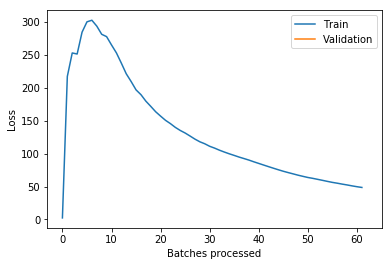

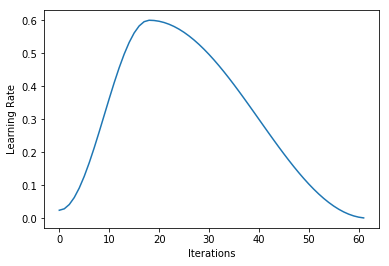

In [372]:
ll.recorder.plot_losses()
ll.recorder.plot_lr()

In [373]:
ll.lr_find()

tensor([[[ 0.1733, -0.2202,  0.5894,  0.2599]],

        [[ 0.3086, -0.9552,  1.0000,  0.3102]],

        [[-0.3337, -0.4222,  0.9878,  0.3902]],

        [[-0.9893, -1.0000,  0.9886,  0.4412]],

        [[-0.2013, -0.2508,  0.0411, -0.0083]],

        [[-0.4765, -1.0000,  0.9807,  0.6503]],

        [[-0.0811, -0.0320,  0.7117,  0.2640]],

        [[-0.0523, -0.5345,  0.7940,  0.3807]],

        [[ 0.1764,  0.5294,  0.8682,  0.8666]],

        [[ 0.1089, -1.0000,  0.9998, -0.4440]],

        [[-0.7062, -0.8589,  1.0000,  0.3261]],

        [[-0.3280, -0.9960,  0.3013,  0.8800]],

        [[-0.6396, -0.7043,  0.5619, -0.0037]],

        [[-0.6578,  0.0840,  1.0000,  0.6600]],

        [[-0.1537, -0.1701,  0.2104,  0.0922]],

        [[ 0.1748,  0.5657,  0.9231,  1.0000]],

        [[-0.5524, -1.0000,  1.0000,  0.8778]],

        [[-0.1648, -0.6745,  0.5440, -0.4468]],

        [[-0.3876, -0.6834,  0.7048,  0.3919]],

        [[-0.2045, -0.4491,  0.2830,  0.0019]],

        [[-0.6494,  

tensor([[[-0.1745, -0.4533,  0.7688,  0.6071]],

        [[-0.2587, -0.6440,  0.7280,  0.3360]],

        [[ 0.5980, -0.3721,  1.0000,  0.1169]],

        [[ 0.2429,  0.2314,  0.7019,  0.6878]],

        [[-0.3045, -0.8482,  0.9201,  0.7086]],

        [[-0.8407, -0.9736,  0.6201,  0.9723]],

        [[-0.7729, -0.9721,  0.8889,  0.8740]],

        [[ 0.0772, -0.6165,  1.0000,  0.7114]],

        [[ 0.1089, -1.0000,  1.0000,  0.0599]],

        [[-0.9960, -0.4773,  0.9680,  1.0000]],

        [[-0.6007, -0.9355,  0.1764,  0.8289]],

        [[ 0.1152, -0.2638,  0.4032,  0.3129]],

        [[-0.1357, -0.6354,  1.0000,  0.7855]],

        [[ 0.2872, -0.6563,  1.0000,  0.4908]],

        [[-0.9255, -0.5722,  0.5308,  0.9961]],

        [[ 0.2971, -0.0442,  0.7318,  0.4620]],

        [[-0.9878, -0.3207,  0.1986,  0.6646]],

        [[-0.2296,  0.0730,  0.2437,  0.7390]],

        [[-0.3976, -0.4161,  0.5664, -0.1038]],

        [[-0.6621, -0.5255,  0.8961,  0.8662]],

        [[-1.0000, -

tensor([[[-0.1979, -0.7481,  1.0000,  0.8023]],

        [[-0.1939,  0.1910,  0.9392,  0.9115]],

        [[-0.6641, -0.4683,  0.7282,  0.2643]],

        [[-0.5678, -0.5238,  1.0000,  0.8460]],

        [[-0.1128, -0.1802,  0.5258,  0.3056]],

        [[-0.2377, -0.8188,  0.6981,  0.3330]],

        [[-0.4372, -0.4765,  0.8942,  0.5898]],

        [[ 0.0718, -0.2857,  0.6923,  0.4666]],

        [[-1.0000,  0.1328,  1.0000,  1.0000]],

        [[-0.5520, -1.0000,  0.8109,  0.3173]],

        [[-0.9406, -0.5953,  0.9967,  0.5825]],

        [[-0.8939, -0.9488, -0.3933, -0.1852]],

        [[-0.1871, -0.1199,  0.9960,  0.9614]],

        [[-0.9285, -0.9392,  0.9952,  0.9190]],

        [[-0.3378, -0.0204,  0.6398,  0.6327]],

        [[-0.2552, -0.7717,  0.5109,  0.9655]],

        [[-0.7287, -1.0000,  1.0000,  0.3400]],

        [[-0.7511, -1.0000,  0.1043,  1.0000]],

        [[-0.8507, -0.0362,  0.7442,  0.7323]],

        [[-0.7389, -0.8882,  0.6802,  0.8242]],

        [[-1.0000, -

tensor([[[-1.0000, -1.0000,  1.0000,  0.2168]],

        [[-0.8454, -0.5380,  0.9007,  0.8486]],

        [[-0.6881, -0.8724,  1.0000,  0.4584]],

        [[-0.8553, -0.9603,  1.0000,  1.0000]],

        [[-1.0000, -0.8295,  0.6368,  1.0000]],

        [[-0.3252, -0.5288,  0.9972,  0.2523]],

        [[-0.1663,  0.6906,  1.0000,  1.0000]],

        [[ 0.0816, -1.0000,  0.9769,  0.6520]],

        [[-0.2853, -0.5760,  0.9467,  0.4120]],

        [[-0.7950, -0.9967,  0.6827, -0.2632]],

        [[-0.9649, -0.9604,  0.5978, -0.0443]],

        [[-0.2913, -0.9440,  0.5556,  0.2320]],

        [[-0.7095, -0.8878,  0.9619,  0.0548]],

        [[-0.7127, -0.3949,  0.8437,  0.7972]],

        [[-0.9567, -0.8618,  0.5961,  0.9362]],

        [[-0.9343, -0.6805,  1.0000,  0.8564]],

        [[-0.7600, -1.0000,  0.6533,  0.5320]],

        [[-0.6039, -0.9562,  1.0000,  0.9488]],

        [[-0.9764, -0.8851,  0.9071,  0.9310]],

        [[-0.9240, -0.3175, -0.7279,  0.0665]],

        [[-0.3391, -

tensor([[[ 0.3272, -0.8805,  0.5019, -0.6883]],

        [[-0.1200, -0.7000,  0.1520,  0.4200]],

        [[-0.3264, -0.0734,  0.6541,  0.4303]],

        [[-0.5263, -0.5392,  0.7519,  1.0000]],

        [[-0.3305,  0.2329,  0.5932,  0.8855]],

        [[-0.7070, -0.5408,  0.6323,  0.2715]],

        [[-0.6462, -0.5584,  0.9943,  0.4618]],

        [[-0.7262, -0.0817,  0.9798,  0.6389]],

        [[-0.4976, -0.3181,  1.0000,  0.9837]],

        [[-0.4954,  0.1330,  0.4047,  0.7938]],

        [[-0.5486, -0.6421,  0.6484,  0.9347]],

        [[ 0.0936, -1.0000,  0.8155,  1.0000]],

        [[-0.1809, -1.0000,  0.7687,  0.7467]],

        [[-0.8343, -0.5401,  0.7872,  0.5352]],

        [[-0.4521, -1.0000,  0.9789,  1.0000]],

        [[ 0.0271, -0.3432,  0.6081,  0.1986]],

        [[-0.0440, -0.6684,  0.7896,  0.5912]],

        [[-0.6289, -1.0000,  1.0000,  0.1468]],

        [[-0.4973,  0.3810, -0.1975,  0.8999]],

        [[-0.7402, -0.7006,  0.9428,  0.8109]],

        [[-0.8780, -

tensor([[[-0.1794, -0.1951,  0.1247,  0.4003]],

        [[-0.7845, -0.6226,  0.7945,  0.8238]],

        [[-1.0000, -1.0000,  0.7602,  0.6761]],

        [[-1.0000, -1.0000,  1.0000,  0.9988]],

        [[-0.1106, -0.9754,  0.9960, -0.1996]],

        [[-0.7644, -0.3450,  0.8231,  0.9088]],

        [[ 0.1038, -0.7978,  0.7067, -0.3899]],

        [[-0.2350, -0.3234,  0.4689,  0.1754]],

        [[-0.9454, -1.0000,  1.0000,  0.9728]],

        [[-0.3837, -0.1894,  1.0000,  0.3509]],

        [[-0.6014, -0.0917,  0.9725,  0.9962]],

        [[-0.6403,  0.0356,  0.6058,  1.0000]],

        [[-0.9148, -1.0000,  0.5163,  0.6095]],

        [[-0.0511, -0.2240,  0.4475,  0.1121]],

        [[-0.4581, -0.3753,  0.9506,  0.9754]],

        [[-0.6191, -0.9042,  1.0000, -0.1461]],

        [[-0.9884, -1.0000,  1.0000,  1.0000]],

        [[-0.5786, -0.5573,  0.5510,  0.5688]],

        [[-0.2080, -0.0149,  0.2804,  0.4207]],

        [[ 0.3320, -0.5629,  0.7586,  0.9518]],

        [[-0.9618, -

tensor([[[-0.4121, -0.9002,  0.2980,  0.9363]],

        [[-0.9681, -1.0000,  1.0000,  0.9401]],

        [[-0.4875,  0.1267,  0.9947,  1.0000]],

        [[-0.0090,  0.3320,  0.9940,  0.7960]],

        [[ 0.0482,  0.0622,  0.1873,  0.4892]],

        [[-0.8217,  0.6281,  0.2817,  1.0000]],

        [[-0.2403, -0.4778,  0.7436,  0.4132]],

        [[ 0.0261,  0.3144,  0.9878,  1.0000]],

        [[-0.6693, -0.3120,  0.9947,  1.0000]],

        [[ 0.1352,  0.1301,  0.9804,  0.9177]],

        [[-0.4655, -0.2920,  0.4715,  0.8880]],

        [[-0.8791, -0.8834,  0.7540,  0.7762]],

        [[ 0.4802,  0.3190,  1.0000,  0.9667]],

        [[-0.3263, -0.3994,  0.7284,  0.4018]],

        [[-0.3027, -0.6137,  0.9973,  0.0384]],

        [[-0.4128, -0.6380,  1.0000, -0.2040]],

        [[-0.9950, -0.2337,  1.0000,  1.0000]],

        [[-0.5869, -0.7367,  0.4634,  0.6602]],

        [[-0.9938, -1.0000,  0.5128,  0.1945]],

        [[-0.1161, -0.2800,  0.8055,  0.6547]],

        [[-0.7756, -

tensor([[[ 4.5845e-01, -9.9667e-01,  1.0000e+00,  5.6056e-01]],

        [[-6.8401e-02, -9.6683e-02,  6.0669e-02,  6.6313e-02]],

        [[-7.8022e-01, -3.7200e-01,  1.0000e+00,  1.7200e-01]],

        [[-8.8814e-01, -7.7842e-02,  7.0258e-01,  8.0205e-01]],

        [[-9.9652e-01, -7.7235e-01,  8.4841e-01,  6.1028e-01]],

        [[-1.2189e-01, -3.6738e-01,  9.0386e-02, -1.5366e-01]],

        [[-4.8525e-01, -6.6409e-01,  9.9840e-01,  3.4666e-01]],

        [[-4.2693e-01, -6.8532e-01,  5.5628e-01,  5.9190e-01]],

        [[ 1.7415e-01,  5.1773e-01,  1.0000e+00,  9.1048e-01]],

        [[-1.1454e-01,  9.7033e-02,  8.3258e-01,  7.2818e-01]],

        [[-9.9977e-01, -8.2410e-01,  1.0000e+00,  3.8938e-01]],

        [[-6.3985e-01, -9.0315e-01,  7.2041e-01,  9.0264e-01]],

        [[ 1.5367e-01, -1.0000e+00,  9.6307e-01, -1.1835e-01]],

        [[-9.7100e-01, -9.3495e-02,  5.8028e-01,  1.0000e+00]],

        [[ 4.6578e-01, -5.7412e-01,  7.4912e-01, -2.4386e-01]],

        [[-1.0000e+00, -8

tensor([[[-0.3207, -0.7430,  0.5594,  0.9287]],

        [[-0.9227, -0.9790,  0.9643,  0.9308]],

        [[-0.3054,  0.6243,  0.3830,  0.9994]],

        [[-0.6178, -0.5920,  1.0000,  0.4000]],

        [[-0.5415, -0.2965,  1.0000,  0.9962]],

        [[-0.9975, -0.2647,  0.8243,  0.7162]],

        [[-0.9382, -0.5982,  0.9382,  0.7741]],

        [[-1.0000, -0.8921,  1.0000,  1.0000]],

        [[-0.3975, -0.8050,  0.4616,  0.8669]],

        [[-0.3516,  0.0698,  0.6883,  0.7036]],

        [[-0.5880, -0.6267,  0.1360,  0.2533]],

        [[-0.9395,  0.0082,  0.8748,  1.0000]],

        [[-0.9660, -1.0000,  0.9809,  0.2937]],

        [[-0.3188, -0.5280, -0.0312, -0.1600]],

        [[-0.3615, -0.4951,  0.6645,  0.1945]],

        [[-0.9629,  0.0753,  0.6533,  0.3604]],

        [[ 0.1897, -0.8557,  1.0000,  0.5298]],

        [[-1.0000, -1.0000,  1.0000,  0.4505]],

        [[-0.6421, -1.0000,  1.0000,  0.0045]],

        [[-0.1860,  0.4727,  0.1165,  0.7799]],

        [[-0.7276,  

tensor([[[ 0.1298, -0.9999,  1.0000,  0.9968]],

        [[-0.9167, -0.9806,  0.4506,  0.8409]],

        [[-0.8480, -0.8649,  1.0000, -0.0977]],

        [[-1.0000, -0.8031,  0.7652,  0.3413]],

        [[-0.8832, -1.0000,  0.6256,  1.0000]],

        [[-0.4400, -0.1960,  0.9947,  0.6160]],

        [[-0.7615, -1.0000,  1.0000,  0.4872]],

        [[-0.9995, -1.0000,  1.0000,  1.0000]],

        [[ 0.2064, -0.9904,  0.5939, -0.0494]],

        [[-0.8453, -0.9781,  1.0000,  0.9768]],

        [[ 0.0575, -0.1482,  1.0000,  0.8585]],

        [[-0.4479, -0.9824,  0.3686,  0.9957]],

        [[-0.5977, -0.4282,  0.9820, -0.0478]],

        [[-0.1723,  0.1173,  0.3429,  0.8858]],

        [[-1.0000, -0.6456,  1.0000,  0.7080]],

        [[-0.9842, -0.8562,  0.9629,  0.8562]],

        [[-0.3080, -0.5856,  0.3120,  0.6637]],

        [[-0.5123, -0.2871,  0.0452,  0.2185]],

        [[-0.9211, -0.0526,  0.9931,  0.5353]],

        [[-0.7666, -0.8366,  0.9970, -0.3742]],

        [[-0.1935, -

tensor([[[-0.4610, -0.6200,  0.3129,  0.3200]],

        [[-0.6788, -0.8460,  0.9605,  1.0000]],

        [[-0.7793, -0.3363,  1.0000,  0.7786]],

        [[-0.1030, -1.0000,  0.9400,  0.9125]],

        [[-0.1495,  0.1748,  0.1309,  0.7789]],

        [[-0.4501, -1.0000,  0.7757, -0.5459]],

        [[-0.6258, -0.9082,  1.0000,  0.9635]],

        [[-1.0000, -0.9632,  1.0000,  0.4879]],

        [[-0.3675, -1.0000,  0.2247,  0.4233]],

        [[-0.5148, -0.0241,  0.0400,  0.6200]],

        [[-0.2325, -0.9773,  0.9329,  0.5755]],

        [[-0.8052, -0.0929,  1.0000,  0.8139]],

        [[-0.7189, -0.5975,  0.9897,  0.6714]],

        [[-0.8279, -0.8392,  0.9882,  1.0000]],

        [[-0.9611,  0.1140,  0.9545,  1.0000]],

        [[-0.9914, -0.9163,  0.6816,  0.9629]],

        [[-0.4312, -0.6745,  0.3269,  0.5028]],

        [[-0.9807,  0.1398,  0.7709,  0.7813]],

        [[-0.4649, -0.8099,  1.0000,  0.9337]],

        [[-0.3031, -0.7324,  0.9855, -0.0279]],

        [[-0.6729, -

tensor([[[-0.0559,  0.3037,  1.0000,  1.0000]],

        [[ 0.6889,  0.4545,  0.9202,  0.9877]],

        [[ 0.1198, -0.6317,  0.6641,  0.4539]],

        [[-0.9630, -0.3986,  0.3821,  0.5794]],

        [[-0.7460, -0.1882,  0.6871,  1.0000]],

        [[ 0.4125,  0.2806,  0.9108,  0.4887]],

        [[-0.3106, -0.7510,  0.8683,  0.6957]],

        [[-0.8319,  0.5681, -0.2958,  0.8935]],

        [[ 0.1916,  0.1005,  0.8455,  0.6754]],

        [[-0.0613, -0.7200,  0.9893,  0.6760]],

        [[-0.9070, -0.8421,  0.9041,  0.4462]],

        [[-0.6639, -0.8981,  0.7049,  0.8889]],

        [[-0.8571, -0.9614,  0.9294,  0.9577]],

        [[-0.7540,  0.1533,  0.8050,  1.0000]],

        [[-0.5395, -0.0472,  0.9952,  1.0000]],

        [[-0.3282, -0.4843,  0.6431,  1.0000]],

        [[ 0.3215, -0.6695,  0.9438,  0.3063]],

        [[-0.6053, -1.0000, -0.1573,  0.7880]],

        [[ 0.2051, -0.9722,  1.0000,  0.5039]],

        [[-0.4112, -1.0000,  0.6639, -0.6103]],

        [[-0.9963, -

tensor([[[-0.9900, -1.0000,  1.0000,  0.6207]],

        [[-0.3829, -0.6542,  0.5790,  0.7420]],

        [[-0.5916, -0.3400,  0.4055,  0.7721]],

        [[-0.9346, -0.7396,  1.0000,  0.4667]],

        [[-0.2763, -0.3201, -0.0326,  0.2316]],

        [[ 0.1714, -1.0000,  1.0000,  1.0000]],

        [[-0.6456,  0.2548,  0.9415,  1.0000]],

        [[-0.5720, -0.3134,  0.8760,  0.3015]],

        [[-0.0339, -0.0063,  0.6611,  0.6400]],

        [[ 0.3283, -0.6635,  1.0000,  1.0000]],

        [[-0.5172, -0.9919,  0.9682,  0.4882]],

        [[-0.8549, -0.2829,  0.6639,  0.2183]],

        [[-0.3195, -0.8440,  0.5207,  0.0360]],

        [[-0.6979, -0.4655,  0.0760,  0.5371]],

        [[-0.6290, -0.5419,  0.9604,  0.4110]],

        [[ 0.4026, -0.0119,  0.9840,  0.3441]],

        [[-0.0245, -0.6765,  0.7830, -0.2680]],

        [[-0.8351, -0.4118,  1.0000,  0.9348]],

        [[-0.5691,  0.3007,  0.6432,  0.6031]],

        [[-0.5192, -0.3032,  0.3752,  0.4280]],

        [[-0.4675, -

tensor([[[ 2.3805e-01, -4.1409e-01,  5.8433e-01, -8.5131e-02]],

        [[-5.6000e-02, -8.8800e-01,  7.8133e-01,  2.4000e-02]],

        [[-9.8038e-01, -8.7033e-01,  4.9042e-01,  5.1304e-01]],

        [[-6.6607e-02, -7.1029e-01,  9.2454e-01,  1.9062e-01]],

        [[-6.2613e-01, -1.0000e+00,  1.0000e+00,  5.1886e-02]],

        [[-9.7244e-01, -9.9824e-01,  9.8353e-01,  1.0000e+00]],

        [[-1.0000e+00, -1.0000e+00,  5.2836e-01,  9.3722e-01]],

        [[-4.2284e-01, -5.7123e-03,  4.6103e-01,  5.9251e-01]],

        [[-3.9372e-01, -7.4431e-01,  4.1243e-01,  7.8518e-01]],

        [[-4.2427e-01, -3.2845e-01,  5.4155e-01,  2.6035e-01]],

        [[-3.7456e-01,  8.4050e-02,  9.6730e-01,  9.7261e-01]],

        [[-9.4966e-01, -6.0736e-01,  1.0000e+00,  7.8401e-01]],

        [[-5.2881e-01, -3.6426e-01,  8.8365e-01,  6.3973e-01]],

        [[-1.9289e-01, -9.8495e-01,  6.2461e-01,  9.5753e-01]],

        [[-7.0046e-01, -1.0000e+00,  1.0000e+00,  6.3709e-01]],

        [[-7.0462e-01, -3

tensor([[[-0.1171, -0.8949,  0.9461,  0.7376]],

        [[-0.2287, -0.5787,  0.4455,  0.8852]],

        [[-0.0394, -0.7127,  1.0000,  0.5970]],

        [[-0.9820, -0.9920,  0.9880,  0.9960]],

        [[-0.6800, -1.0000,  1.0000,  1.0000]],

        [[-1.0000, -0.0240,  1.0000,  0.9800]],

        [[ 0.0282, -0.9334,  0.3609, -0.0614]],

        [[ 0.0715, -0.1029,  0.7601,  0.4535]],

        [[-0.6079, -0.7942,  0.9891,  0.2027]],

        [[-0.3867, -0.3200,  0.7920,  1.0000]],

        [[-0.4277, -0.9720,  0.3554,  0.9560]],

        [[-1.0000, -0.6419,  1.0000,  0.9887]],

        [[ 0.3738,  0.6706,  0.7202,  0.9661]],

        [[-0.7693, -0.8904,  0.5385,  0.6008]],

        [[-0.5299, -0.6038,  0.9998,  0.4506]],

        [[-0.5436, -0.2689,  1.0000,  0.5558]],

        [[-1.0000, -0.9251,  0.8932,  0.9575]],

        [[ 0.2167, -0.3776,  1.0000,  0.5237]],

        [[-0.6346,  0.6195,  0.1042,  1.0000]],

        [[-0.0060, -0.9637,  1.0000,  0.5821]],

        [[ 0.3707,  

tensor([[[-0.5283, -0.5338,  0.2845,  0.4609]],

        [[-0.6093, -0.7752,  0.7626,  0.1904]],

        [[ 0.0130, -0.9960,  0.9950,  0.9964]],

        [[-0.2880, -0.9880,  0.8920,  0.3434]],

        [[ 0.1586, -0.7446,  0.8496, -0.3401]],

        [[-0.9723, -1.0000,  0.8805,  0.9924]],

        [[ 0.1237,  0.5507,  0.6208,  0.9574]],

        [[-0.3271,  0.1041,  0.2252,  0.6441]],

        [[-0.9883, -0.7661,  0.6323,  0.8741]],

        [[ 0.2504, -0.4981,  1.0000,  0.1048]],

        [[-0.7929, -0.5246,  0.7182,  0.7809]],

        [[-0.2337,  0.3615,  0.9747,  1.0000]],

        [[-0.6428, -1.0000,  1.0000,  0.2245]],

        [[-0.5731, -0.8171,  0.8425, -0.0756]],

        [[-0.4773, -1.0000,  1.0000,  0.9920]],

        [[-0.4471, -0.6037,  0.9490,  0.5125]],

        [[ 0.5590, -0.5965,  1.0000,  0.2270]],

        [[-0.6322, -0.7882,  0.7176,  0.7442]],

        [[ 0.0053, -0.6776,  0.6497,  0.0528]],

        [[-0.9272, -0.9915,  1.0000,  0.2715]],

        [[-0.3486, -

tensor([[[-0.6330, -0.5025,  0.8694,  0.1419]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.1102, -0.6206,  0.4136, -0.1980]],

        [[-0.5042, -0.5330,  0.8959,  0.5660]],

        [[ 0.4792, -0.5038,  1.0000,  0.8243]],

        [[-0.8010, -0.3406,  0.0127,  0.4618]],

        [[-0.0109, -0.2457,  0.9512,  0.8279]],

        [[-0.8465, -0.7820,  0.9710,  0.5005]],

        [[-0.6429, -0.9442,  0.7336,  0.9962]],

        [[-1.0000, -0.8451,  1.0000, -0.1752]],

        [[-0.7547, -0.0082,  0.5896,  0.9442]],

        [[-0.3161, -1.0000,  1.0000, -0.1147]],

        [[-0.0378,  0.0343,  0.1470,  0.2495]],

        [[-0.2520,  0.6676,  0.1360,  0.9074]],

        [[ 0.3405, -0.3324,  0.6178,  0.5569]],

        [[ 0.1290, -0.5127,  0.9703,  1.0000]],

        [[-0.6699, -0.4044,  0.6281,  0.8364]],

        [[-0.3172, -0.9907,  1.0000, -0.2562]],

        [[-0.4971, -0.8001,  0.6679,  0.9961]],

        [[-1.0000, -1.0000,  0.7598,  0.9945]],

        [[ 0.2320, -

tensor([[[ 0.0152,  0.4201,  0.4989,  0.8721]],

        [[-0.8579, -0.6953,  0.8851,  0.7586]],

        [[-1.0000, -0.4649,  1.0000,  0.4609]],

        [[ 0.6592, -0.9803,  0.9854,  0.1526]],

        [[-0.6603, -0.9328,  0.8012,  0.9990]],

        [[ 0.1948, -0.9999,  1.0000,  0.6284]],

        [[-0.5287,  0.2840,  0.0091,  0.7440]],

        [[-0.9563, -0.4719,  1.0000,  0.9583]],

        [[-0.9343, -0.0533,  0.9853,  0.9084]],

        [[-0.3998, -0.6213,  0.6733,  0.3733]],

        [[-0.1791,  0.4792, -0.0380,  1.0000]],

        [[-0.3471, -0.3037,  0.2893,  0.5861]],

        [[-0.2254, -0.7401,  0.3935,  0.3641]],

        [[-0.3006, -0.4922,  0.9777,  0.5949]],

        [[-0.6182, -0.7363,  0.9598,  0.9122]],

        [[-0.9224, -0.2809,  0.1138,  0.0312]],

        [[-0.0863, -0.1570,  1.0000,  0.9786]],

        [[-0.8614, -0.6154,  0.9779,  1.0000]],

        [[-0.4397, -0.9914,  0.2823,  0.3018]],

        [[ 0.3352, -0.9998,  1.0000,  0.2326]],

        [[-0.5099, -

tensor([[[-0.3643, -0.6160,  0.8437,  0.5162]],

        [[-0.7252, -0.6366,  0.3179,  1.0000]],

        [[-0.3682, -0.7304,  0.9090,  0.1608]],

        [[-1.0000, -0.6320,  1.0000,  1.0000]],

        [[-0.7405, -0.6137,  0.7517,  0.7342]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.4780, -0.1339,  0.5808,  0.1902]],

        [[-0.0362, -0.2419,  0.4917, -0.0224]],

        [[-0.3813, -0.7737,  0.5648,  0.6769]],

        [[-0.9537, -0.8195,  0.8530,  0.7973]],

        [[ 0.2935, -0.4766,  0.5226, -0.1983]],

        [[-0.3921, -0.3282,  0.8882,  0.7961]],

        [[ 0.1328, -0.2639,  0.3875,  0.1843]],

        [[-0.8671, -1.0000,  0.5735,  1.0000]],

        [[-0.6421, -1.0000,  0.9524,  1.0000]],

        [[-0.9488, -0.9695,  1.0000, -0.0422]],

        [[-0.9825, -1.0000,  0.8610,  0.8771]],

        [[ 0.0389, -0.4202,  0.7405,  0.4760]],

        [[-0.4229, -0.7230,  0.4542,  0.7557]],

        [[-0.6137, -0.2003,  0.9826,  0.6659]],

        [[-0.7387, -

tensor([[[-0.4841, -0.7673,  0.8365,  0.2677]],

        [[-0.5089, -0.6968,  0.6414,  0.6569]],

        [[-0.4058, -0.7802,  0.2918,  0.8522]],

        [[-0.9287, -0.9989,  1.0000, -0.4392]],

        [[-0.6254, -0.9931,  1.0000,  0.6677]],

        [[-0.7252, -0.7513,  0.8704,  0.5913]],

        [[-0.2670, -0.9853,  0.9370,  0.8325]],

        [[-0.1518, -0.1125,  0.3390,  0.1124]],

        [[-0.2787, -0.2687,  0.6187,  0.4308]],

        [[-0.2566, -0.9948,  1.0000,  1.0000]],

        [[-0.6974, -0.9925,  0.9934,  0.3435]],

        [[-0.9762, -1.0000,  1.0000,  0.8643]],

        [[-0.8023, -0.6261,  1.0000,  0.9942]],

        [[-0.4628, -0.2601,  0.3970,  0.0960]],

        [[-0.4558, -0.5309,  0.5637,  0.3817]],

        [[-0.4656, -0.1619,  0.5175,  0.5668]],

        [[-1.0000, -0.6259,  0.9985,  0.5674]],

        [[-0.5413, -0.3480,  0.9840,  0.5320]],

        [[-0.6469, -0.2498, -0.0305,  0.1457]],

        [[-0.5645, -0.6992,  0.5313,  0.7143]],

        [[-0.0643, -

tensor([[[-0.9510, -0.6504,  0.5949,  0.5322]],

        [[-0.7148, -0.4842,  0.4493,  0.9339]],

        [[-0.2084, -0.0540,  0.2233,  0.1037]],

        [[-0.3224,  0.4313,  1.0000,  0.8402]],

        [[-0.5683, -0.9564,  0.7233,  0.4045]],

        [[ 0.0484, -0.2779,  0.2136,  0.0321]],

        [[-0.6193, -0.9639,  0.7754,  0.9378]],

        [[-0.9999, -0.8229,  1.0000,  0.9068]],

        [[-0.9281,  0.5077,  0.1173,  0.8490]],

        [[-0.5291, -0.9297,  0.7984,  0.4507]],

        [[-0.4261, -0.4117,  0.8404,  1.0000]],

        [[-0.3573, -1.0000,  0.9587,  0.5555]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.7402, -1.0000,  1.0000,  0.3875]],

        [[ 0.4431, -0.9939,  1.0000, -0.0308]],

        [[ 0.4204, -0.0917,  1.0000,  0.8763]],

        [[-0.3831, -0.9962,  0.8186,  0.6614]],

        [[ 0.3561,  0.3864,  0.9728,  1.0000]],

        [[-0.0203, -0.5543,  0.6124, -0.1619]],

        [[-0.2802, -0.9608,  1.0000,  0.9840]],

        [[-0.4408, -

tensor([[[-0.5336, -0.4129,  0.9725,  0.2812]],

        [[-0.9941, -1.0000,  0.8579,  0.9963]],

        [[-0.9250, -0.9300,  0.6590,  0.5313]],

        [[-0.0242, -0.3480,  0.9736,  0.3247]],

        [[-0.2714,  0.7574,  0.6754,  0.9105]],

        [[-0.0603, -0.4629,  0.3351,  0.5126]],

        [[-0.9450, -0.7460,  1.0000,  0.9867]],

        [[-0.9878, -0.9930,  1.0000,  0.9936]],

        [[-0.7890, -1.0000,  0.9974,  0.4684]],

        [[-0.6836, -0.9180,  0.8559,  1.0000]],

        [[-0.8882, -0.3968,  0.8835,  0.7179]],

        [[-0.0510, -0.3360,  0.7709,  0.3926]],

        [[-0.1592,  0.1260,  0.5359,  0.6425]],

        [[-0.9019, -1.0000,  1.0000,  0.6888]],

        [[-0.9001, -0.8986, -0.7121, -0.5625]],

        [[-0.5446, -0.8959,  0.6092, -0.3064]],

        [[-0.6016, -0.5434,  0.8244,  0.7373]],

        [[-0.6864,  0.3112,  1.0000,  1.0000]],

        [[-0.0043,  0.1247,  0.9991,  0.7083]],

        [[-1.0000, -0.3018,  0.7791,  0.5908]],

        [[-0.7393, -

tensor([[[ 0.0190, -0.8923,  0.9636,  0.0678]],

        [[-0.2521, -1.0000,  0.7681,  1.0000]],

        [[-0.2890, -0.1995,  0.5334,  0.6192]],

        [[-0.9656, -1.0000,  0.9794,  0.9551]],

        [[-1.0000, -0.5318,  0.4767,  0.4757]],

        [[-0.9668, -1.0000,  0.9720, -0.1762]],

        [[-0.3520, -0.3173,  0.2760,  0.2267]],

        [[-0.7974, -0.6601,  0.4293, -0.1119]],

        [[-0.8890, -0.9842,  0.8993,  0.3286]],

        [[-0.6057, -0.5485,  0.9205,  0.3928]],

        [[-0.5804, -0.7718,  0.4837,  0.1964]],

        [[-0.7989, -0.9948,  1.0000,  0.8101]],

        [[ 0.3879, -0.6510,  1.0000,  0.3048]],

        [[-0.4867, -0.9988,  1.0000,  0.2909]],

        [[ 0.2346, -0.7759,  0.9996,  0.0148]],

        [[-0.3690, -0.5330,  0.5599,  0.5400]],

        [[-0.3219, -0.9540,  0.2453,  0.9657]],

        [[ 0.2228, -0.8858,  1.0000,  0.9830]],

        [[-0.8314,  0.1889,  0.1671,  0.9577]],

        [[-0.8242, -1.0000,  1.0000,  1.0000]],

        [[-0.6223, -

tensor([[[-0.4113, -0.8669,  0.9717, -0.2596]],

        [[-0.4120, -0.9742,  0.5838,  0.9711]],

        [[-0.2854, -0.4129,  0.5956,  0.9058]],

        [[-0.9604, -1.0000,  0.9606,  1.0000]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.6764, -0.1874,  0.5619,  0.9067]],

        [[-0.4000, -0.8850,  0.3778,  0.8979]],

        [[-0.0339, -0.7985,  0.3658, -0.4656]],

        [[-1.0000,  0.0812,  1.0000,  0.9702]],

        [[ 0.4415, -0.9848,  1.0000, -0.7078]],

        [[-0.9885, -0.9952,  1.0000,  0.3605]],

        [[-0.4032, -0.9163,  0.8898,  0.3853]],

        [[-0.7515, -0.7177,  0.7788,  0.5560]],

        [[-1.0000, -1.0000,  0.0104,  0.7994]],

        [[ 0.0383,  0.1520,  0.9465,  1.0000]],

        [[ 0.5221, -0.3889,  0.7001, -0.2570]],

        [[-0.3763, -0.2552,  0.1447,  0.2971]],

        [[-0.8127, -0.8225,  0.6790,  0.9882]],

        [[-0.1239, -0.8609,  0.3283, -0.4398]],

        [[-0.8659, -0.4224,  1.0000,  0.4326]],

        [[-1.0000,  

tensor([[[ 0.3384, -1.0000,  1.0000,  0.9979]],

        [[-0.9801, -0.5424,  0.9266,  0.5972]],

        [[ 0.2965,  0.2563,  0.9758,  0.5615]],

        [[ 0.7971, -0.7570,  0.9897, -0.2318]],

        [[-0.5945, -0.5821,  0.2725,  0.7187]],

        [[-0.5140, -0.8231,  0.8777,  1.0000]],

        [[-1.0000, -0.5950, -0.2511,  0.6649]],

        [[-0.9830, -0.1158,  0.0680,  0.9349]],

        [[-0.4453, -0.5607,  0.5987, -0.1714]],

        [[-0.2218, -1.0000,  0.9776,  0.9269]],

        [[-0.8502, -0.4925,  1.0000,  0.6597]],

        [[ 0.5480,  0.5664,  0.7166,  0.7896]],

        [[-0.0042,  0.4021,  0.8218,  0.8796]],

        [[-0.1909, -0.2347,  0.0751,  0.1536]],

        [[-0.7343, -0.5182,  0.7427,  0.3694]],

        [[-0.5881, -0.9616,  0.8931,  0.9558]],

        [[-0.9726, -0.4375,  1.0000,  0.3012]],

        [[ 0.3171, -1.0000,  1.0000,  1.0000]],

        [[-0.8387, -0.8351,  1.0000,  0.8175]],

        [[-0.4802, -1.0000,  1.0000,  0.6447]],

        [[-0.0400,  

tensor([[[-0.8952, -0.6497,  1.0000,  1.0000]],

        [[-0.2695, -0.4443,  0.7176,  0.7161]],

        [[-0.4144, -0.9987,  1.0000,  0.9946]],

        [[-0.9579,  0.2948,  0.0173,  0.6820]],

        [[-0.7643, -0.6768,  1.0000,  0.6652]],

        [[-0.6818, -0.9017,  0.3593,  0.9537]],

        [[-1.0000, -0.7613,  0.7850,  1.0000]],

        [[-0.2484,  0.4839,  0.8665,  0.9843]],

        [[-0.7496, -0.8161,  0.9612,  0.5930]],

        [[-0.7871, -1.0000,  0.8407,  0.1307]],

        [[-0.2980, -0.7135,  0.9778,  0.1742]],

        [[-0.4431, -0.8175,  0.6467,  0.8232]],

        [[-0.9846, -0.5445,  0.5262,  0.8724]],

        [[ 0.3655, -0.4437,  0.8510, -0.1873]],

        [[ 0.1125, -1.0000,  1.0000,  0.0732]],

        [[-0.9094, -0.9565,  0.9441,  0.9565]],

        [[-0.0661, -0.6117,  0.6763,  0.4507]],

        [[-0.9520,  0.1459, -0.5600,  0.5264]],

        [[-0.8937, -0.6519,  1.0000,  0.3716]],

        [[-0.9955, -0.9417,  0.9955,  0.5040]],

        [[-0.3110, -

tensor([[[-0.3164, -0.1085, -0.1839,  0.0867]],

        [[-0.9274, -0.5923,  0.5747,  0.0895]],

        [[ 0.3205, -0.9278,  0.8905,  0.9365]],

        [[-0.8297, -1.0000,  0.9816,  1.0000]],

        [[ 0.5441, -0.5307,  0.9999,  0.1139]],

        [[-0.3655,  0.6173,  0.9740,  1.0000]],

        [[-0.7191, -1.0000,  1.0000,  0.8160]],

        [[-0.5387, -0.6184,  0.5730,  0.9957]],

        [[-0.9868, -1.0000,  0.9906,  0.9789]],

        [[ 0.2643,  0.5956,  0.6752,  0.9119]],

        [[-0.8615, -0.8784,  0.9292,  0.6968]],

        [[-0.9827, -1.0000,  0.9913,  1.0000]],

        [[-0.2297, -1.0000,  0.6030,  0.8342]],

        [[-0.6510,  0.1275,  0.7409,  0.5566]],

        [[-1.0000, -0.9966,  0.9953,  1.0000]],

        [[-1.0000, -0.7180,  1.0000,  1.0000]],

        [[-0.8040, -0.9001,  0.8453,  0.8067]],

        [[-0.0832, -0.7085,  1.0000,  0.5249]],

        [[-0.8185, -0.5437,  0.9509,  0.5325]],

        [[-0.4195, -0.8372,  0.3953,  0.3178]],

        [[-0.5528, -

tensor([[[ 2.1074e-01,  1.0733e-01,  9.3131e-01,  8.9985e-01]],

        [[-6.3600e-01, -4.2943e-01,  9.4400e-01,  5.1952e-01]],

        [[-6.1806e-01, -2.8243e-01,  9.9556e-01,  9.1532e-01]],

        [[-4.3746e-01, -1.5453e-01,  1.0000e+00,  9.9508e-01]],

        [[-2.6960e-01, -5.1605e-01,  9.8984e-02,  6.0414e-01]],

        [[-2.1267e-01,  1.3961e-01,  6.1206e-01,  8.1862e-01]],

        [[-9.5060e-01, -9.9632e-01,  9.5472e-01,  9.9249e-01]],

        [[-6.9005e-01, -8.5617e-01,  6.7932e-01,  7.1217e-01]],

        [[-7.0241e-01, -7.7440e-01,  9.9621e-01,  1.5583e-02]],

        [[-8.1086e-01, -9.3557e-01,  7.6635e-01,  9.2578e-01]],

        [[-1.9156e-01,  1.6486e-01,  6.9637e-01,  6.8365e-01]],

        [[-9.1349e-01, -6.1815e-01,  1.0000e+00,  6.1656e-01]],

        [[-1.0000e+00, -8.3712e-01,  1.0000e+00,  1.0000e+00]],

        [[-6.8028e-01, -6.8574e-01,  1.0000e+00,  1.0000e+00]],

        [[-2.6949e-01, -5.6007e-01,  7.0148e-01,  5.8019e-01]],

        [[-4.9483e-01, -5

tensor([[[-0.8253, -0.6179,  0.3449,  0.5040]],

        [[-0.6666, -1.0000,  0.9445,  0.7083]],

        [[-0.6262, -0.4096,  0.5702, -0.1452]],

        [[ 0.1552, -0.7470,  1.0000,  0.5955]],

        [[-0.1294,  0.1919,  0.2131,  0.5001]],

        [[-0.2198, -0.2456,  0.2231,  0.3962]],

        [[ 0.1355, -0.1864,  0.8027,  0.4633]],

        [[-0.5016, -0.4881,  0.8980,  0.4082]],

        [[ 0.5362, -0.9675,  0.8970,  0.5811]],

        [[ 0.2179, -0.8682,  0.5696, -0.2401]],

        [[-0.0558, -0.4533,  0.8199,  0.7435]],

        [[-0.4068, -0.7487,  0.3725,  0.0761]],

        [[-1.0000, -1.0000,  0.6874,  0.6377]],

        [[-0.4773, -0.9560,  0.9360, -0.1360]],

        [[-1.0000, -1.0000,  0.4949,  1.0000]],

        [[-0.7594, -0.2410,  0.9021,  0.9695]],

        [[-0.3063, -0.8492,  0.3895,  0.7880]],

        [[-0.3377, -0.9896,  1.0000,  0.3804]],

        [[-0.4920,  0.0027,  0.9960,  0.9947]],

        [[-0.3125, -0.7366,  0.8614,  0.0602]],

        [[-1.0000, -

tensor([[[-0.4572, -0.1797,  0.6553,  0.3427]],

        [[-0.6000, -0.6000,  1.0000,  0.9480]],

        [[-0.8641, -0.9003,  0.9240,  0.9063]],

        [[-0.5719, -0.3108,  0.9720,  0.3619]],

        [[-0.6703, -0.1301,  0.9893,  1.0000]],

        [[-0.4502, -0.2458,  0.7669,  0.3337]],

        [[-0.5037, -0.8368,  0.6602,  0.0509]],

        [[-0.3256, -0.6412,  0.9602,  0.7242]],

        [[-0.9889, -0.9929,  1.0000,  0.5604]],

        [[-0.2853, -0.1240,  0.2053,  1.0000]],

        [[-0.6279,  0.0670,  0.9884,  0.9772]],

        [[-0.5311, -0.3038, -0.1552,  0.3709]],

        [[-0.9490, -0.7618,  0.5927,  0.2530]],

        [[-0.9948, -0.9844,  0.9836,  1.0000]],

        [[-0.9682, -0.7394, -0.3389,  0.4529]],

        [[-0.3554, -0.9674,  0.8171,  0.9554]],

        [[-0.0270, -0.5080,  0.6216,  0.4600]],

        [[-0.1473,  0.3085,  0.5256,  0.8429]],

        [[-0.2321, -0.9397,  0.6729,  0.5975]],

        [[ 0.1821, -0.1821,  0.5171,  0.1738]],

        [[-0.4014, -

tensor([[[-0.1532, -0.9601,  0.8025,  0.0406]],

        [[-0.4019, -0.5364,  1.0000,  0.3560]],

        [[-0.9120, -0.8185,  1.0000,  1.0000]],

        [[-0.2412, -0.6030,  0.1187, -0.1359]],

        [[-0.2850, -1.0000,  1.0000, -0.3954]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.3869, -0.2895,  0.9554,  0.3409]],

        [[-0.7727, -0.9600,  0.8295,  0.9280]],

        [[-0.1680, -0.9240,  1.0000,  0.4760]],

        [[-0.5678,  0.3033,  0.9952,  0.8324]],

        [[-1.0000, -1.0000,  0.9903,  1.0000]],

        [[ 0.1916, -0.6162,  1.0000,  0.9203]],

        [[-0.8709, -0.8981,  1.0000,  0.4070]],

        [[-0.0302, -0.1642,  0.5029,  0.3631]],

        [[-0.9451, -1.0000,  1.0000,  0.9951]],

        [[ 0.2908, -0.9879,  1.0000,  0.9919]],

        [[-0.6885,  0.1945, -0.2225,  0.6592]],

        [[ 0.0933, -1.0000,  1.0000,  0.1640]],

        [[-0.9245, -0.5068,  1.0000,  1.0000]],

        [[-0.4097, -0.7376,  0.5125, -0.0013]],

        [[-0.6213, -

tensor([[[-0.6361, -0.3228,  0.5201,  0.3174]],

        [[-0.0687, -0.1440,  0.0866,  0.0840]],

        [[-0.6429,  0.2319,  1.0000,  1.0000]],

        [[-0.9469, -1.0000,  1.0000,  0.8723]],

        [[-0.3120, -0.1000,  0.5467,  0.7480]],

        [[-0.6878, -0.9561,  0.1413,  0.5280]],

        [[-0.9811, -0.9278,  0.9973,  1.0000]],

        [[-0.1853,  0.5797,  0.5031,  0.7871]],

        [[-1.0000, -1.0000,  1.0000,  0.0334]],

        [[-0.3160, -0.7351,  0.4404,  0.0243]],

        [[-0.1558, -0.6875,  1.0000,  0.8272]],

        [[-0.5552, -0.3751,  0.7225,  0.1985]],

        [[-0.8651, -0.3645,  0.3029,  0.4842]],

        [[-0.8577, -0.9365,  0.8783,  0.8511]],

        [[ 0.2186, -0.6786,  0.4489, -0.3920]],

        [[-0.4196, -0.9784,  0.2994,  0.6484]],

        [[-0.2394,  0.6711,  0.1641,  0.9319]],

        [[-0.8028, -0.6960,  0.8355,  0.6475]],

        [[-0.6638, -0.3202,  0.6818,  0.3763]],

        [[-0.7557, -0.5286,  0.8219,  0.4847]],

        [[-0.0196, -

tensor([[[-0.5529,  0.0109,  0.1211,  0.8285]],

        [[-0.9369, -0.7783,  0.4758,  0.8913]],

        [[-0.8929, -0.0134,  0.5772,  0.8746]],

        [[-0.0255, -0.1854,  0.9737,  0.1188]],

        [[ 0.2178, -0.8682,  0.5696, -0.2401]],

        [[ 0.4331, -0.1573,  0.7210,  0.3595]],

        [[-0.9402, -0.4938,  1.0000,  0.9951]],

        [[-0.3151, -0.7563,  0.3426,  0.5007]],

        [[-0.4957, -0.4162,  0.9151,  0.7684]],

        [[-0.0898,  0.0419,  0.9571,  0.4454]],

        [[-0.8219,  0.3151,  1.0000,  0.9228]],

        [[ 0.0873, -0.2221,  1.0000,  1.0000]],

        [[-0.9315,  0.2702,  0.6725,  0.7447]],

        [[-0.5602, -0.3736,  0.9680,  0.5428]],

        [[-0.8357, -0.3039,  0.9996,  0.9876]],

        [[-0.6297, -0.1776,  1.0000,  0.7550]],

        [[-1.0000, -0.2186,  1.0000,  1.0000]],

        [[ 0.0185, -0.6121,  0.4240, -0.1440]],

        [[ 0.1833, -0.8768,  1.0000,  0.5478]],

        [[-0.2604,  0.3313,  1.0000,  0.9942]],

        [[-0.2093, -

tensor([[[ 0.0739, -0.4078,  0.4351,  0.3947]],

        [[ 0.0870, -0.3219,  0.9806,  0.4409]],

        [[ 0.2265, -1.0000,  0.9996,  0.8739]],

        [[-0.4060, -0.9594,  0.7192,  0.8798]],

        [[-1.0000, -0.9620,  0.9152,  0.8352]],

        [[-0.9924, -0.5688,  1.0000,  0.5475]],

        [[ 0.1615, -0.9060,  0.9422,  0.9177]],

        [[ 0.0476, -0.5165,  0.6847,  0.1755]],

        [[-0.3305, -0.1132,  1.0000,  0.6126]],

        [[-0.3722, -0.4958,  1.0000,  0.3542]],

        [[-0.2644, -0.0161,  1.0000,  0.6486]],

        [[-0.8043, -0.5530,  0.5270,  0.4735]],

        [[-0.3699, -0.8106,  0.9030,  0.7045]],

        [[-0.9751, -0.9960,  0.8131,  0.9800]],

        [[ 0.4836, -0.9447,  0.9936, -0.2874]],

        [[-0.9758, -0.9030,  0.9806,  1.0000]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[ 0.0566, -0.6080,  0.9058,  0.1242]],

        [[-0.3113, -0.1143,  0.1624,  0.8450]],

        [[-0.0713,  0.0720,  0.7611,  0.9613]],

        [[-1.0000, -

tensor([[[-0.5763, -0.2714,  1.0000,  0.8031]],

        [[-0.3248, -0.9273,  0.5817,  0.9101]],

        [[-0.5065, -0.2396,  0.9045,  0.6404]],

        [[ 0.1093,  0.0080,  1.0000,  1.0000]],

        [[-0.5485, -0.5881,  0.9884,  0.6162]],

        [[-0.8232, -0.8690,  0.8274,  0.6736]],

        [[ 0.2194, -0.6054,  1.0000,  1.0000]],

        [[-0.8920, -1.0000,  1.0000,  0.6762]],

        [[-0.1758, -0.6529,  0.4962,  0.6323]],

        [[-0.0631, -0.1240,  0.1832,  0.1000]],

        [[-0.7706,  0.6355, -0.4637,  0.8677]],

        [[-0.5556, -0.9961,  1.0000,  0.7241]],

        [[-0.0247,  0.1526,  0.9734,  0.7400]],

        [[-0.8124, -0.6803,  0.8845,  0.7528]],

        [[ 0.7479, -0.2040,  0.9664,  0.0080]],

        [[ 0.1047,  0.5596,  0.5792,  0.9377]],

        [[-0.9947, -0.9960,  1.0000,  1.0000]],

        [[-1.0000, -0.9363,  0.9192,  0.9939]],

        [[ 0.3071, -0.9698,  1.0000,  0.9547]],

        [[ 0.5717, -1.0000,  1.0000,  1.0000]],

        [[-0.2854, -

tensor([[[-4.6416e-01, -3.4966e-01,  5.7224e-01,  5.2431e-01]],

        [[-7.2231e-01, -9.6827e-02,  7.0446e-01,  9.2620e-01]],

        [[-1.0000e+00, -6.9981e-01, -2.4537e-01,  5.8709e-01]],

        [[-4.0000e-03, -2.9600e-01,  6.9600e-01,  4.6133e-01]],

        [[-9.9521e-01, -9.9654e-01,  1.0000e+00,  1.0000e+00]],

        [[-5.3610e-01, -8.9281e-01,  8.8933e-01, -3.2975e-02]],

        [[-7.9223e-01, -4.1255e-01,  1.0000e+00,  7.6444e-01]],

        [[-6.4017e-01, -3.2384e-01, -5.2329e-02,  5.5051e-01]],

        [[-4.2160e-01, -1.0000e+00,  1.0000e+00, -3.3100e-01]],

        [[ 1.1577e-01, -4.4529e-01,  6.4815e-01,  6.6423e-01]],

        [[-8.5619e-01, -4.4787e-01,  1.0000e+00,  9.8835e-01]],

        [[-7.7068e-01, -2.6290e-01,  9.5122e-01,  1.0000e+00]],

        [[-2.6933e-01, -5.2209e-01,  1.0000e+00,  8.7362e-02]],

        [[-1.8007e-01, -1.9594e-01,  2.0246e-02,  1.6653e-02]],

        [[-2.9547e-01, -5.1627e-01,  9.7425e-01,  8.7865e-01]],

        [[-7.4448e-01, -1

tensor([[[-9.4566e-01, -8.1538e-01,  1.0000e+00,  9.8445e-01]],

        [[-1.8665e-01, -6.6098e-01,  1.7828e-01,  6.9969e-01]],

        [[-4.5249e-01, -7.6669e-01,  9.7078e-01,  8.1914e-01]],

        [[-9.4517e-01, -7.8380e-02,  6.8951e-01,  9.9549e-01]],

        [[-4.7516e-01, -2.7202e-01,  3.5099e-02,  1.6828e-01]],

        [[-9.1331e-01, -5.3419e-01,  5.6501e-01,  6.3575e-01]],

        [[ 1.2866e-01, -3.3803e-01,  4.1513e-01,  2.5127e-01]],

        [[-4.6667e-01, -2.2800e-01,  1.5200e-01,  3.7600e-01]],

        [[-1.0000e+00, -7.4241e-01,  6.9016e-01,  8.0584e-02]],

        [[-7.7446e-01, -8.5978e-01,  5.0081e-01,  7.5147e-01]],

        [[-9.8403e-01, -6.3606e-01,  1.0000e+00,  5.3206e-01]],

        [[-7.0800e-01, -1.0000e+00,  1.0000e+00,  9.5796e-01]],

        [[-6.0653e-01, -4.9604e-01,  1.0000e+00,  9.8369e-01]],

        [[-1.0000e+00,  9.7132e-02,  1.0000e+00,  9.9901e-01]],

        [[-4.0075e-01, -5.4838e-01,  5.1681e-01,  5.0551e-01]],

        [[-1.3247e-01, -3

tensor([[[-0.6271, -0.7003,  0.6270,  0.9643]],

        [[-0.1945, -1.0000,  0.9909,  0.7387]],

        [[ 0.0037,  0.1392,  0.9460,  0.9584]],

        [[-0.2056, -0.7630,  1.0000,  0.9951]],

        [[-0.9658, -0.9907,  0.7472,  0.5606]],

        [[-0.8932, -0.0997,  1.0000,  0.5880]],

        [[-0.9893, -1.0000,  1.0000,  0.8600]],

        [[ 0.1178, -1.0000,  1.0000, -0.0532]],

        [[ 0.1404,  0.0406,  0.8966,  0.5283]],

        [[-0.6694, -0.3062,  0.4543,  0.3286]],

        [[-0.0749, -0.1929,  0.6267,  0.3251]],

        [[-0.7388, -0.6024,  0.5152,  0.6681]],

        [[-0.2427, -0.9841,  0.1736,  0.0840]],

        [[-0.9597, -0.6881,  1.0000,  0.2561]],

        [[-0.0433, -0.6163,  0.9809,  0.1773]],

        [[-0.8246, -0.9977,  0.9850,  0.5276]],

        [[-0.8336, -0.7770,  0.8526,  0.6392]],

        [[-0.5804, -0.3921,  0.5001,  0.9841]],

        [[-0.0773, -1.0000,  0.9947,  0.1360]],

        [[-0.5511, -0.9143,  0.9700,  0.8946]],

        [[-1.0000, -

tensor([[[-0.9934, -0.9968,  1.0000,  1.0000]],

        [[-0.9774, -1.0000,  0.9772, -0.6125]],

        [[ 0.0486, -1.0000,  1.0000,  1.0000]],

        [[-0.6172,  0.4088,  0.3272,  0.6069]],

        [[-0.9771, -1.0000,  0.9952,  0.6839]],

        [[ 0.1000,  0.1572,  0.6323,  0.8567]],

        [[-0.3757, -0.2674,  0.2323,  0.5198]],

        [[-0.3080, -0.9526,  0.4044,  0.8322]],

        [[-0.5846, -0.5582,  1.0000,  0.4901]],

        [[-0.7752, -0.7729,  1.0000,  1.0000]],

        [[-1.0000, -1.0000,  0.6224,  1.0000]],

        [[-0.2892, -0.9550,  0.4085,  0.9617]],

        [[ 0.0901, -0.9194,  0.4305, -0.0686]],

        [[-0.3362, -0.3614,  0.6005,  1.0000]],

        [[-0.2390, -0.9906,  0.7163, -0.0918]],

        [[-0.6136, -0.8361,  0.2064,  0.0160]],

        [[-0.5889, -0.3199,  0.4054,  0.7527]],

        [[-0.1586, -0.8009,  0.6784,  0.9731]],

        [[-0.8398, -0.6281,  0.8849,  0.5698]],

        [[-0.5433, -0.6395,  1.0000,  1.0000]],

        [[-0.7513,  

tensor([[[ 0.0720,  0.2160,  0.2747,  0.4600]],

        [[-0.8768, -0.7277,  0.9917,  0.8759]],

        [[-0.8191, -0.7292,  0.2304,  0.1033]],

        [[-0.5901, -0.8801,  1.0000,  1.0000]],

        [[-0.8577, -0.8965,  0.7704,  0.9384]],

        [[-0.6330, -0.9946,  0.3931,  1.0000]],

        [[-0.1154, -0.7212,  0.9220, -0.0509]],

        [[-0.1659, -0.1037,  0.1165,  0.1270]],

        [[-0.9705, -1.0000,  1.0000, -0.4394]],

        [[-0.7960, -0.5734,  0.8440,  0.6534]],

        [[ 0.0879, -0.1326,  0.8354,  0.9999]],

        [[-0.3746, -0.9853,  0.6356,  0.9748]],

        [[ 0.0469, -0.4830,  0.7377,  0.3848]],

        [[-0.9986, -0.9761,  1.0000,  0.9747]],

        [[-0.9995, -0.9574,  0.8783,  0.9656]],

        [[ 0.3578,  0.1888,  0.9692,  0.8868]],

        [[-0.9417, -0.7005,  1.0000,  0.9845]],

        [[-0.8498,  0.2560,  0.5616,  1.0000]],

        [[-0.7341, -0.2389,  0.7633,  0.3855]],

        [[-0.5609, -0.6494,  0.6940,  0.8033]],

        [[-0.6949, -

tensor([[[-0.1841, -0.1606,  0.3185,  0.2216]],

        [[-0.2302, -0.1492,  0.2475,  0.6984]],

        [[-0.8557, -0.7569,  0.5706,  0.7520]],

        [[-0.1116,  0.7485,  0.3725,  1.0000]],

        [[-0.8850, -0.7189,  0.7807,  1.0000]],

        [[-0.4176, -0.5295,  0.7164,  0.7920]],

        [[-0.0331, -0.7600,  1.0000,  0.4121]],

        [[-0.9522, -0.7443,  0.8243,  0.9963]],

        [[-0.4337, -0.1923,  1.0000,  1.0000]],

        [[-0.9918, -0.8046,  0.9987,  0.9501]],

        [[-0.8862, -0.2165,  0.1232,  0.1693]],

        [[ 0.0718, -0.4666,  0.6923,  0.2858]],

        [[-0.1791, -0.2511,  0.0648, -0.0020]],

        [[-0.7445, -0.9729,  0.1244,  0.9728]],

        [[ 0.1101, -0.7386,  0.6083, -0.3640]],

        [[-0.9783, -0.1926,  1.0000,  1.0000]],

        [[-0.6787, -0.7715,  0.9216,  0.5812]],

        [[-0.8135, -0.8227,  1.0000,  0.3138]],

        [[-0.8581, -0.8203,  0.8817,  0.8058]],

        [[ 0.4594, -0.8082,  0.9726,  0.4807]],

        [[-0.1720, -

tensor([[[-0.5780, -0.9537,  0.2598, -0.1220]],

        [[ 0.1424, -0.9305,  1.0000, -0.2917]],

        [[-0.0367, -0.0082,  0.7853,  0.8719]],

        [[-1.0000, -1.0000,  1.0000,  0.2017]],

        [[-0.5799, -0.0245,  0.7057,  0.3806]],

        [[-0.3702, -0.6981,  0.8589,  0.5119]],

        [[-0.1435, -0.3846,  0.2383, -0.1455]],

        [[-1.0000, -0.8113,  1.0000,  1.0000]],

        [[-0.4447, -0.2014,  0.1138,  0.4888]],

        [[-0.0999, -0.8117,  0.7508, -0.4524]],

        [[-0.4326, -0.0189,  1.0000,  0.9953]],

        [[-0.6757, -1.0000,  0.3957,  1.0000]],

        [[ 0.5144, -0.9212,  0.7648, -0.1726]],

        [[-1.0000, -0.2831,  0.9477,  0.6500]],

        [[-0.2608, -0.9816,  1.0000,  0.2275]],

        [[-0.6137, -0.9701,  1.0000,  0.8951]],

        [[-1.0000, -0.9444,  1.0000,  0.4522]],

        [[-0.3408, -0.5527,  0.1941,  0.2799]],

        [[-0.6560, -0.9919,  0.9341,  0.9761]],

        [[-0.1920, -1.0000,  1.0000,  1.0000]],

        [[-0.4210, -

tensor([[[-0.8797, -0.8682,  0.8758,  0.8084]],

        [[-0.0727, -0.5525,  0.5856,  0.4235]],

        [[-0.8987, -1.0000,  1.0000,  0.1602]],

        [[-0.3121, -0.7521,  0.3495,  0.9480]],

        [[-0.6751, -0.5128,  1.0000,  0.9925]],

        [[ 0.0721, -0.9944,  0.9753,  0.8385]],

        [[-0.4721, -1.0000,  1.0000,  0.5603]],

        [[-0.6807, -0.4493,  0.7719,  0.3300]],

        [[-0.9967, -0.9057,  0.9470,  0.9746]],

        [[-0.5404, -0.8640,  0.6255, -0.3160]],

        [[-0.6945, -0.0447,  0.9225,  0.8595]],

        [[-0.5176, -0.9884,  1.0000,  0.7168]],

        [[-0.9255, -0.9404,  0.8904,  0.8505]],

        [[-0.4721, -0.9481,  0.6427,  0.2121]],

        [[-0.3988, -0.5572,  0.4498,  0.2331]],

        [[-0.1742, -0.5161,  0.8206,  0.9873]],

        [[-0.2565, -0.7432,  0.3870,  0.3608]],

        [[-0.7607, -0.2833,  0.4363,  0.3668]],

        [[ 0.0321, -0.9734,  0.9879, -0.4114]],

        [[ 0.5691, -0.5893,  0.7438, -0.3926]],

        [[-0.6230, -

tensor([[[-0.8908, -0.9183,  0.9725,  0.9696]],

        [[-0.2851, -0.6300,  0.7343,  0.8725]],

        [[-0.2496, -0.3992,  0.2379,  0.0474]],

        [[ 0.0989, -0.8187,  0.9942,  0.2413]],

        [[-0.8901,  0.6247, -0.4833,  0.8825]],

        [[-0.6288, -0.5738,  0.9824,  0.6408]],

        [[-0.5414, -0.0600,  0.9947,  1.0000]],

        [[-0.6254, -0.5052,  0.9746,  0.8557]],

        [[ 0.3360, -0.8032,  0.8400, -0.0625]],

        [[-0.9712, -0.8600,  0.5396,  0.5160]],

        [[-1.0000, -1.0000,  1.0000,  0.6716]],

        [[ 0.1829, -0.5238,  0.5644,  0.5213]],

        [[-0.5366, -1.0000, -0.0248,  0.9329]],

        [[-0.5252, -0.1181, -0.0524,  0.5093]],

        [[-0.6172, -0.7391,  0.7755,  0.5972]],

        [[-0.2175, -1.0000,  1.0000,  0.9991]],

        [[ 0.0458, -0.6891,  0.4251,  0.2555]],

        [[-0.3227, -0.4200,  0.7813,  0.1440]],

        [[ 0.2633, -0.6287,  1.0000,  0.4540]],

        [[-0.6978, -0.6103,  0.7306,  0.5606]],

        [[-0.3533, -

tensor([[[ 1.6016e-01, -4.7220e-01,  1.0000e+00,  9.7733e-01]],

        [[-7.3574e-01, -3.3600e-01,  8.3183e-01,  6.2800e-01]],

        [[-4.8508e-01, -1.0000e+00,  3.9709e-01,  7.8669e-01]],

        [[-1.0000e+00, -6.7200e-01,  7.4933e-01,  5.3200e-01]],

        [[ 5.6945e-02, -2.6849e-01,  9.8122e-01,  9.2657e-01]],

        [[-1.7303e-01, -3.3416e-01,  2.6986e-01,  3.3362e-01]],

        [[-3.7245e-01, -3.8680e-02,  1.0000e+00,  6.6427e-01]],

        [[-3.2867e-01, -6.0510e-02,  8.2005e-01,  8.1995e-01]],

        [[-3.4830e-01, -4.0163e-01,  6.2577e-01,  1.0000e+00]],

        [[ 4.2584e-02,  3.8347e-01,  8.4544e-01,  8.7979e-01]],

        [[-7.2278e-01,  2.7570e-01,  9.9993e-01,  1.0000e+00]],

        [[-3.5096e-01, -3.3792e-01,  7.0908e-01,  5.7135e-01]],

        [[-9.4512e-01, -1.0000e+00,  1.0000e+00,  9.9505e-01]],

        [[-9.7322e-01, -9.8418e-01,  3.7826e-01,  9.7236e-01]],

        [[-1.0000e+00, -6.9344e-01,  1.0000e+00,  9.7586e-01]],

        [[-1.6313e-01, -4

tensor([[[-1.0000, -0.0958, -0.5730,  1.0000]],

        [[-0.9709, -0.9902,  0.9717,  0.9864]],

        [[-0.1110, -1.0000,  1.0000,  0.2228]],

        [[ 0.2652, -1.0000,  0.9956, -0.1572]],

        [[-0.3152, -0.5730,  0.6665,  0.9934]],

        [[-0.6198, -0.5385,  0.9987,  0.4541]],

        [[-0.1612, -1.0000,  0.9743,  1.0000]],

        [[-1.0000, -0.3547,  1.0000,  1.0000]],

        [[-0.7316, -0.9551,  0.4008,  0.7988]],

        [[-0.6937, -0.9800,  0.4054,  0.9840]],

        [[-0.1703, -1.0000,  0.6116,  0.0929]],

        [[-0.4220, -0.2363,  0.3556,  0.4363]],

        [[-0.4182, -0.6268,  0.6234,  0.4717]],

        [[-0.1361, -0.9281,  0.3653, -0.4880]],

        [[-0.3195,  0.0279,  1.0000,  0.9082]],

        [[-0.6694, -0.1963,  0.5255,  0.3723]],

        [[ 0.6747,  0.1034,  0.7977,  0.4715]],

        [[-0.0486, -0.6331,  0.9844,  0.8845]],

        [[-0.5448, -0.3081,  0.4488,  0.3607]],

        [[-0.0321, -0.5792,  0.7938,  0.5540]],

        [[-0.5460, -

tensor([[[-0.9824, -1.0000,  0.9877,  1.0000]],

        [[ 0.2621, -0.0581,  1.0000,  0.9748]],

        [[-0.7610, -0.6041,  0.5544,  0.8801]],

        [[-0.5390, -0.8165,  1.0000,  0.3295]],

        [[ 0.2906, -0.8358,  0.8316, -0.0205]],

        [[-0.0814, -0.9965,  0.6811, -0.4677]],

        [[-0.3716, -0.2396,  0.4429,  0.1481]],

        [[-0.3127, -1.0000,  0.8165,  0.7750]],

        [[-0.5683, -1.0000,  1.0000,  0.1564]],

        [[-0.5437,  0.1522,  0.4256,  0.8318]],

        [[-0.5293, -0.6652,  0.8035,  0.6896]],

        [[-0.3420, -0.8933,  0.8435,  0.5697]],

        [[-0.9516, -1.0000,  1.0000,  0.9967]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.4259, -0.6410,  1.0000,  0.5475]],

        [[-0.8061, -0.5928,  0.8459,  0.8013]],

        [[-0.7923,  0.2637,  0.9999,  1.0000]],

        [[ 0.1318, -0.2266,  0.5322,  0.2484]],

        [[-0.1453,  0.4038,  0.3256,  0.8379]],

        [[-0.4726, -1.0000,  1.0000,  0.2895]],

        [[-0.4416, -

tensor([[[-0.2700, -0.5921,  0.4133,  0.3792]],

        [[-0.1409, -0.3344,  0.0483, -0.2288]],

        [[-0.5292, -0.7742,  0.5958,  0.4591]],

        [[-0.7593, -0.1162,  0.2204,  0.3561]],

        [[-0.6637, -1.0000,  0.6857,  0.6797]],

        [[-0.8672, -0.4113,  0.8176,  0.4068]],

        [[-0.8042, -0.6671,  1.0000,  1.0000]],

        [[ 0.0462, -0.6452,  0.9997,  0.7513]],

        [[-0.2832, -0.2359,  0.8647,  0.0739]],

        [[-0.9521, -0.4606,  1.0000,  0.9966]],

        [[ 0.5117, -0.6822,  0.9965,  0.9937]],

        [[-0.8845, -0.6000, -0.0881, -0.3400]],

        [[-0.8234, -0.5585,  0.9896,  0.9331]],

        [[-0.6344, -0.5241,  0.8573,  0.0324]],

        [[-0.7500, -0.9360,  0.9300,  0.9240]],

        [[-0.9874, -0.9736,  0.9865,  0.9743]],

        [[-0.0656, -0.5109,  0.5618,  0.4388]],

        [[-0.5238, -0.5349,  0.7599,  0.5614]],

        [[-0.9341, -1.0000,  0.4345,  1.0000]],

        [[-0.5425, -0.7919,  0.5969,  0.8433]],

        [[ 0.2412, -

Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.92E-03


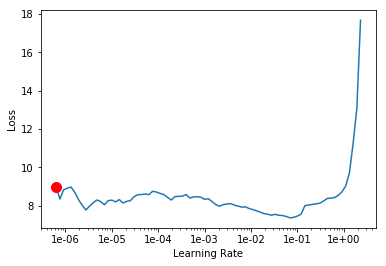

In [375]:
ll.recorder.plot(suggestion=True, skip_end=2)

In [376]:
ll.fit_one_cycle(1, 3e-6)

tensor([[[-0.8138, -0.8644,  0.7499,  0.9165]],

        [[ 0.5131, -0.9641,  0.9939, -0.1226]],

        [[-0.7541, -0.9040,  0.8865,  0.6720]],

        [[-0.0346, -0.2444,  0.8047,  0.2068]],

        [[-0.6960, -0.9920,  1.0000,  0.3120]],

        [[-0.8578, -0.6601,  1.0000,  1.0000]],

        [[-0.3829,  0.0101,  0.7087,  0.5715]],

        [[ 0.5951,  0.1290,  0.8081,  0.6138]],

        [[-0.9755, -0.9657,  0.9637,  0.3338]],

        [[-0.1712, -0.5971,  0.7405,  0.5250]],

        [[-0.1454, -1.0000,  0.9907, -0.1514]],

        [[-0.1021, -0.8848,  0.9232,  0.9977]],

        [[-0.9416, -0.1071,  0.6775,  0.9607]],

        [[-0.9646, -0.6634,  0.9642,  1.0000]],

        [[ 0.0861,  0.8177,  0.3233,  1.0000]],

        [[-0.0831, -0.4200,  0.9759,  0.5880]],

        [[-0.3335, -0.6782,  0.2851,  0.5706]],

        [[-0.6421, -0.3502,  0.5808,  0.9105]],

        [[-0.4118,  0.1960,  0.3850,  0.5520]],

        [[-0.2403, -0.1549,  0.1241,  0.4882]],

        [[ 0.2008, -

tensor([[[-0.9649, -0.6984,  0.9994,  1.0000]],

        [[-1.0000, -1.0000,  0.5830,  0.0787]],

        [[-0.7016, -0.7149,  0.8583,  0.9895]],

        [[-0.6532, -0.9528,  0.7025,  0.7473]],

        [[ 0.2872, -0.8878,  0.9408,  0.9466]],

        [[-0.7831, -0.5754,  0.8033,  0.5464]],

        [[-0.2058,  0.0266,  0.2835,  0.7517]],

        [[-0.9170, -0.8414,  1.0000,  0.8307]],

        [[-0.7559, -0.7688,  0.6508,  0.8632]],

        [[ 0.6528, -0.3915,  0.8626, -0.1554]],

        [[-0.2460, -0.4342,  1.0000,  0.9920]],

        [[-0.1171,  0.0572,  0.6248,  0.7708]],

        [[-0.6469, -0.9718,  0.1872, -0.3856]],

        [[-0.0401, -0.0848,  1.0000,  0.2640]],

        [[-0.2803, -0.6041,  0.7069,  0.8403]],

        [[-0.6913, -0.3018,  0.6652,  0.4448]],

        [[ 0.3756, -0.9660,  1.0000,  0.9614]],

        [[-0.7601, -1.0000,  1.0000,  0.7974]],

        [[ 0.4131, -0.8443,  1.0000,  0.1079]],

        [[-0.4987, -0.3240,  0.6800,  0.6720]],

        [[-0.2051, -

tensor([[[-0.8869, -0.9814,  1.0000,  0.1045]],

        [[-0.9219, -0.3926,  1.0000,  1.0000]],

        [[-1.0000,  0.1911,  1.0000,  1.0000]],

        [[-0.6398, -0.8242,  0.9581,  0.7881]],

        [[-0.9850, -0.5793,  0.9904,  0.9615]],

        [[-0.4835, -0.7178,  0.6517,  0.6847]],

        [[-0.2406, -1.0000,  1.0000,  0.1895]],

        [[-0.4955, -0.7681,  0.9150,  0.4162]],

        [[-0.3041, -0.7530,  1.0000,  0.3365]],

        [[-0.2107, -0.9480,  0.6428,  0.6881]],

        [[-0.3258, -0.6016,  0.9136,  0.1143]],

        [[-0.3534, -0.1200,  0.7834,  0.3684]],

        [[-0.5682, -0.2365,  0.7392,  0.8164]],

        [[-0.6054, -0.9661,  1.0000,  0.9783]],

        [[-0.5895, -0.7203,  1.0000,  0.3373]],

        [[-0.7194, -1.0000,  0.5790,  0.4646]],

        [[-0.8252, -0.7616,  0.8441,  0.8700]],

        [[-0.7600, -0.9200,  0.4933,  0.9800]],

        [[-0.3999, -0.9766,  0.5497,  0.6989]],

        [[-0.5080, -0.4163,  0.4145,  0.3043]],

        [[-0.9991, -

tensor([[[-0.5516, -0.5196,  0.5800,  0.6605]],

        [[-0.3094, -0.8370,  0.4547,  0.3919]],

        [[-0.5573, -0.9160,  0.4080,  0.9560]],

        [[-0.5658, -0.3024,  0.9973,  0.3404]],

        [[-0.6288,  0.1800,  0.6432,  0.7010]],

        [[-0.9179, -0.9704,  0.5115,  0.5695]],

        [[-0.3218, -0.0199,  0.8676,  0.2961]],

        [[-0.7553,  0.1972,  0.0741,  0.7747]],

        [[-0.9401, -0.2682,  1.0000,  0.8442]],

        [[-0.9947, -0.9920,  0.9947,  0.6360]],

        [[-0.4328, -0.2560,  0.7075,  0.5880]],

        [[-0.3712, -1.0000,  0.5454,  0.8732]],

        [[-0.7850, -0.6443,  0.8181,  0.7171]],

        [[-0.4767, -0.9971,  0.9775,  0.8284]],

        [[ 0.0615, -0.7019,  1.0000,  0.9726]],

        [[-1.0000, -0.9961,  1.0000,  1.0000]],

        [[-0.1887, -0.9842,  0.6928,  0.8086]],

        [[-0.6718,  0.1865,  0.5641,  0.4415]],

        [[-0.1539, -0.0401,  0.8018,  0.9606]],

        [[-0.2693, -0.6280,  0.6320,  0.6880]],

        [[-0.6006, -

tensor([[[-0.6923, -0.1841,  0.6080,  0.7800]],

        [[-0.5529, -0.5465,  0.8531,  0.5066]],

        [[-0.2767, -1.0000,  1.0000,  1.0000]],

        [[-0.3517, -0.8102,  0.8519,  0.0697]],

        [[-0.4896, -0.2641,  1.0000,  0.2923]],

        [[-1.0000, -1.0000,  1.0000,  0.9979]],

        [[ 0.1060, -0.6773,  0.8004, -0.2020]],

        [[-0.3391, -0.1130,  0.4157,  0.7523]],

        [[-0.0259, -0.5704,  0.9731,  0.9947]],

        [[ 0.1897,  0.1501,  1.0000,  1.0000]],

        [[-0.0267, -0.6160,  0.5601,  0.1801]],

        [[-0.9971, -0.5972,  0.8526,  0.7965]],

        [[-0.1890, -1.0000,  0.9638, -0.3641]],

        [[ 0.4720, -0.4558,  0.8722,  0.0404]],

        [[-0.8400, -0.8023,  1.0000,  0.8411]],

        [[-0.6101, -1.0000,  1.0000,  0.3544]],

        [[ 0.1757, -0.8198,  0.9949,  0.7607]],

        [[ 0.1265, -0.8806,  0.9764, -0.0125]],

        [[-0.9174, -0.9770,  0.9903,  0.2502]],

        [[-0.3368, -0.5018,  0.9917,  0.4635]],

        [[-0.6741, -

tensor([[[-0.3237, -0.4001,  1.0000,  0.3521]],

        [[-0.6718, -0.9441,  0.9551,  0.0939]],

        [[-0.9988, -0.8171,  1.0000, -0.1528]],

        [[ 0.0158, -0.1638,  0.9766,  0.6723]],

        [[-1.0000, -0.9984,  0.1785, -0.4955]],

        [[ 0.0401,  0.1797,  1.0000,  1.0000]],

        [[-0.5380, -0.8243,  0.7962,  0.9884]],

        [[-0.2973, -0.2149,  0.1766,  0.1210]],

        [[-0.8427, -0.6697,  0.9404,  0.5716]],

        [[-0.4995,  0.0428,  0.7558,  0.9940]],

        [[ 0.2597, -0.0118,  0.8680,  0.5873]],

        [[-0.6921, -0.7455,  0.9024,  0.6361]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.9708, -0.2303,  1.0000,  0.7065]],

        [[-0.3572, -0.4770, -0.0437, -0.2671]],

        [[-0.1279, -0.2284,  0.1436,  0.3107]],

        [[-0.5107, -0.9469,  1.0000,  0.8541]],

        [[-0.8290, -0.7903,  1.0000,  0.4392]],

        [[-0.1959,  0.1050,  0.3873,  0.3684]],

        [[-0.8365, -0.7822,  0.6736,  0.7682]],

        [[-0.4053, -

tensor([[[-0.5254, -0.8406,  0.7674,  0.8377]],

        [[-1.0000, -0.3403,  0.9942,  0.7163]],

        [[-0.9941, -0.9921,  0.9821,  0.9921]],

        [[-0.7644, -0.4246, -0.0146,  0.0292]],

        [[-0.7698, -0.8531,  0.9731,  0.0639]],

        [[-0.7712, -0.6227,  1.0000,  0.1058]],

        [[-0.5056, -1.0000,  1.0000,  0.9859]],

        [[-0.8446, -0.8141,  1.0000,  1.0000]],

        [[-0.9949, -0.9581,  0.9982,  0.9534]],

        [[-0.0866, -0.2199,  0.3217,  0.2005]],

        [[-0.9227, -0.7179,  1.0000, -0.0632]],

        [[-0.8828, -0.6039,  0.8700,  0.7133]],

        [[-0.5930, -0.1334,  1.0000,  0.5894]],

        [[-0.6728, -0.3363,  1.0000,  0.9681]],

        [[-0.9771, -0.9496,  0.9776,  0.9475]],

        [[-0.9459, -0.9773,  0.9174,  0.8738]],

        [[ 0.2050, -0.4523,  0.5414, -0.1001]],

        [[-0.6444, -0.2037,  0.9615,  0.8298]],

        [[-0.5721, -0.6636,  0.6739,  0.7324]],

        [[-0.6950, -0.5571,  0.6671,  0.3164]],

        [[-0.4531,  

tensor([[[-0.1162, -0.4411,  0.5732,  0.4798]],

        [[-0.9190, -1.0000,  0.9985, -0.4792]],

        [[-0.0931, -0.2990,  0.1875,  0.2090]],

        [[-0.9960, -1.0000,  1.0000,  0.8880]],

        [[-0.0705, -0.3703,  0.6185,  0.4880]],

        [[ 0.0869, -0.1925,  0.4793,  0.6685]],

        [[-0.7228, -0.3397,  0.7711,  0.5310]],

        [[-0.8724, -1.0000,  0.7603,  0.7003]],

        [[-0.2028,  0.0759,  0.2314,  0.3201]],

        [[-0.4383, -0.1616,  1.0000,  0.9620]],

        [[-0.6919, -0.3841,  0.8543,  0.7563]],

        [[-0.7103, -0.5258,  1.0000,  0.8020]],

        [[-0.7382, -1.0000,  0.7247,  1.0000]],

        [[-0.2268, -0.7282,  0.9949,  0.8321]],

        [[-0.5147, -0.4640,  0.9253,  1.0000]],

        [[-0.7922, -0.0283,  1.0000,  0.4986]],

        [[-0.9586, -0.8688,  0.7336,  0.8288]],

        [[-1.0000, -1.0000,  0.9947,  0.8600]],

        [[-1.0000, -0.7183,  0.6328,  1.0000]],

        [[ 0.5328, -0.1792,  0.9651,  0.6093]],

        [[-0.8874, -

tensor([[[-0.3176, -0.2402,  0.1575,  0.4041]],

        [[-0.0376, -0.0839,  0.2627,  0.0452]],

        [[-0.3227,  0.6342,  0.3699,  1.0000]],

        [[-0.8311, -1.0000,  1.0000,  1.0000]],

        [[-0.3544, -0.4035,  0.4623,  0.2044]],

        [[ 0.0220,  0.4560,  0.6784,  0.9920]],

        [[-0.5713, -0.5762,  0.4988,  0.6043]],

        [[ 0.7359, -0.5802,  1.0000,  0.2147]],

        [[-0.4132, -0.1268,  0.4559,  0.3874]],

        [[-0.6428, -0.3047,  0.9589,  0.4786]],

        [[-0.4491, -0.7285,  0.8150,  0.7283]],

        [[-0.3989,  0.1336,  0.3608,  0.9547]],

        [[-0.9136, -0.7633,  0.9979,  0.4949]],

        [[-0.0338, -0.9649,  1.0000, -0.1850]],

        [[-0.3272, -0.8865,  0.9912,  0.0541]],

        [[-0.6221, -0.9055,  0.9964,  0.6835]],

        [[-0.4390, -0.3541,  0.9571,  0.3760]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.8788, -0.6161,  0.1667, -0.2003]],

        [[-0.9419, -0.9551,  0.9909,  0.9723]],

        [[-0.3585, -

tensor([[[-0.3152, -0.3525,  0.9886,  0.9918]],

        [[-0.3176,  0.0719,  0.7173,  0.9962]],

        [[-0.8880, -0.6427,  1.0000,  0.3867]],

        [[-0.6308, -0.8339,  0.8430,  0.9269]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.3421, -0.4281,  0.5709,  0.8904]],

        [[-0.1510, -0.7997,  0.9095,  0.7970]],

        [[-0.8321, -0.9015,  0.7628,  0.4843]],

        [[-0.1386,  0.2573,  0.5606,  0.8459]],

        [[-0.8948, -0.5168,  0.9605,  0.8560]],

        [[ 0.0851, -0.4848,  0.9844,  0.9469]],

        [[-0.7254, -0.9160,  0.5000,  0.9600]],

        [[-0.3763, -0.6080,  0.6392,  0.2800]],

        [[-0.3922, -0.3516,  0.8531,  0.5915]],

        [[-0.0663, -0.0741,  0.6278,  0.6624]],

        [[-1.0000, -0.7946,  0.8191, -0.0024]],

        [[-0.4396,  0.0920,  0.6648,  0.6880]],

        [[-0.2330, -1.0000,  0.9415,  0.9721]],

        [[ 0.1908, -0.7661,  1.0000, -0.0507]],

        [[ 0.1770,  0.2801,  0.5134,  0.4282]],

        [[-0.8723, -

tensor([[[-0.1926, -0.4164,  0.8420,  0.6696]],

        [[-0.3799, -0.6394,  0.5735,  0.5987]],

        [[-1.0000, -0.1398, -0.4742,  1.0000]],

        [[-0.9943, -0.4043,  1.0000,  1.0000]],

        [[-1.0000, -0.8995,  0.6036,  0.7302]],

        [[-0.4984, -0.3360,  0.8413,  0.9000]],

        [[-0.6629, -0.1617,  0.8847,  0.4198]],

        [[-0.9405, -0.5621,  0.9947,  0.6168]],

        [[-0.7168, -1.0000,  1.0000,  0.8439]],

        [[-1.0000, -0.4899,  1.0000,  0.8895]],

        [[-0.4000, -0.7400,  0.3800,  0.7600]],

        [[-0.6050, -1.0000,  1.0000, -0.3932]],

        [[-0.6107, -0.2689, -0.0234,  0.5764]],

        [[-0.9894, -0.6201,  1.0000,  1.0000]],

        [[-1.0000, -0.8697,  0.7822,  1.0000]],

        [[-0.3144, -0.0658,  0.3023,  0.1871]],

        [[-0.6331, -0.2012,  0.9858,  0.6661]],

        [[-0.9000, -0.9947,  0.8000,  1.0000]],

        [[ 0.0666, -0.9440,  0.9096,  0.3763]],

        [[-0.8565, -0.9631,  1.0000,  0.1270]],

        [[ 0.2167,  

tensor([[[-0.9880, -0.1601,  0.9880,  0.6321]],

        [[-0.2132, -0.5991,  0.8945,  0.4217]],

        [[-0.5172, -0.9882,  1.0000,  0.7161]],

        [[-1.0000, -1.0000,  1.0000,  0.5267]],

        [[ 0.0278, -0.8206,  1.0000,  0.4899]],

        [[-0.5947, -0.8480,  1.0000,  0.1080]],

        [[-0.8327, -0.9899,  0.5447,  0.9844]],

        [[-0.2962, -0.1600,  0.3480,  0.3473]],

        [[-0.0409, -0.9947,  1.0000,  0.3935]],

        [[-0.9488, -0.6988,  0.9843,  0.0396]],

        [[-0.8709, -0.9880,  1.0000,  0.7431]],

        [[-0.9165, -0.8926,  0.9686,  0.7950]],

        [[-0.9552, -0.8803,  0.9789,  0.9520]],

        [[-0.9952, -0.3077,  0.9952,  1.0000]],

        [[-0.3650, -0.4201,  0.0163,  0.0543]],

        [[-0.9578, -0.7371,  0.7807,  0.2921]],

        [[-0.9912, -0.7456,  0.0562, -0.1280]],

        [[-0.2572, -0.7600,  0.3996,  0.5375]],

        [[-0.9947, -0.7020,  1.0000,  0.3992]],

        [[-0.3431, -0.3797,  0.9980,  0.4176]],

        [[-0.2741, -

tensor([[[-0.4350, -0.7061,  0.9688,  0.8208]],

        [[ 0.3920, -0.8120,  0.8613, -0.0240]],

        [[-0.9538, -0.9739,  1.0000,  0.9735]],

        [[ 0.0122, -0.5990,  0.4282, -0.1240]],

        [[-0.7160, -0.5565,  0.8149,  0.7443]],

        [[-0.1096,  0.1398,  0.5568,  0.6332]],

        [[-0.1637, -0.6392,  0.7791,  0.2869]],

        [[-0.2810, -0.1985,  0.5406,  0.6666]],

        [[-0.5787, -0.9457,  1.0000,  0.9549]],

        [[-0.0780, -0.9414,  1.0000,  0.4258]],

        [[-0.7259, -0.7466,  1.0000,  0.4874]],

        [[-0.1826, -0.1386,  0.6760,  0.0537]],

        [[-0.9925, -0.9837,  0.9989,  1.0000]],

        [[-0.3435, -0.3194,  0.8090,  1.0000]],

        [[-0.5114, -0.0613, -0.1563,  0.1439]],

        [[-0.9039,  0.2751,  0.9937,  0.9933]],

        [[-0.0141, -0.3544,  0.9547,  0.6232]],

        [[-0.8714, -1.0000,  0.9455,  1.0000]],

        [[-0.0055, -1.0000,  0.9686,  0.0200]],

        [[-0.9960, -1.0000,  0.5532,  0.9582]],

        [[-0.7928, -

tensor([[[-0.4081, -0.4081,  0.6001,  0.6721]],

        [[-1.0000, -1.0000,  1.0000,  0.7859]],

        [[-0.5723, -0.9723,  0.4402,  0.9719]],

        [[-0.1457, -0.8233,  0.6928,  0.4277]],

        [[-0.4608, -0.8668,  0.6077,  0.8285]],

        [[-0.4439, -0.9707,  0.2060,  0.9677]],

        [[-0.5895, -0.2825,  0.1706,  0.6196]],

        [[-0.7754, -0.7879,  0.4088,  0.6762]],

        [[-0.6810, -0.9816,  0.7561,  0.9279]],

        [[-0.7257, -0.2680,  0.8310,  0.4734]],

        [[ 0.1603, -0.4023,  0.9674, -0.2068]],

        [[-1.0000, -0.9987,  0.2028, -0.6035]],

        [[-0.1086, -0.8935,  0.2926,  0.9041]],

        [[-0.4075, -0.6942,  0.8300,  0.4064]],

        [[-0.6801, -0.6841,  0.5041,  0.7601]],

        [[-0.2963, -0.2236,  0.5785,  0.6569]],

        [[ 0.2346,  0.1726,  0.5305,  0.7781]],

        [[ 0.2287,  0.5259,  1.0000,  1.0000]],

        [[-0.1199, -0.4345,  0.9879,  0.4244]],

        [[-1.0000, -0.9396,  1.0000,  1.0000]],

        [[-0.5344, -

tensor([[[-0.9896, -0.9610,  0.9856,  0.9770]],

        [[-0.9940, -0.9283,  1.0000, -0.0837]],

        [[-0.1726, -0.0597,  0.1703,  0.1999]],

        [[-1.0000, -0.9760,  0.9913,  0.0480]],

        [[-0.3580,  0.0842,  0.3765,  1.0000]],

        [[ 0.2576,  0.0507,  0.9804,  0.6885]],

        [[-0.0071, -0.9669,  1.0000,  0.9570]],

        [[-0.3903, -0.9618,  1.0000,  1.0000]],

        [[-0.5214, -0.6947,  0.6356,  0.7444]],

        [[-0.5732, -0.1826,  0.8053,  0.5243]],

        [[-0.7867, -0.9978,  0.6561,  0.6344]],

        [[-0.3200,  0.0278,  1.0000,  0.9088]],

        [[-0.7711, -0.8203,  1.0000,  1.0000]],

        [[-0.2399, -0.7313,  0.6103,  0.2345]],

        [[-0.0778, -0.6605,  0.7066, -0.0439]],

        [[-0.2538, -1.0000,  1.0000,  0.9964]],

        [[-0.5787, -0.8964,  1.0000,  1.0000]],

        [[-0.1680, -0.8713,  0.7772,  0.6235]],

        [[-0.8094, -0.7876,  0.8460,  0.5812]],

        [[ 0.0523, -1.0000,  0.3727,  0.2092]],

        [[-0.2332, -

tensor([[[-0.3294, -0.5921,  0.3358,  0.8161]],

        [[-0.6389, -0.4473,  0.9603,  0.5338]],

        [[ 0.1251, -0.3546,  0.5474,  0.7272]],

        [[-0.5893, -0.6120,  0.4720,  0.4840]],

        [[-0.2571, -0.1860,  0.7145,  0.8919]],

        [[-0.9982, -0.9746,  0.7302,  0.9956]],

        [[-1.0000, -1.0000,  1.0000, -0.1650]],

        [[-0.1528, -0.5305,  1.0000,  0.2596]],

        [[-0.0122,  0.0800,  0.7048,  0.9241]],

        [[-0.8361, -0.9083,  0.8250,  0.9709]],

        [[-0.9461, -0.9710,  0.6431,  0.9261]],

        [[ 0.3386, -0.0769,  1.0000,  0.4597]],

        [[-0.9671, -0.8733,  1.0000,  0.9267]],

        [[-0.0477, -0.6025,  0.7277,  0.4740]],

        [[-0.1225,  0.6770,  0.9741,  1.0000]],

        [[ 0.1477, -1.0000,  1.0000,  1.0000]],

        [[ 0.7022,  0.1106,  0.8316,  0.4842]],

        [[ 0.0570,  0.0484,  0.9771,  0.9579]],

        [[-0.9683, -0.4670,  0.9214,  0.6296]],

        [[-0.7150, -0.6556,  1.0000, -0.2122]],

        [[-0.6485, -

tensor([[[ 0.3991, -0.4919,  0.9130, -0.2732]],

        [[-0.1787, -0.3219,  0.8519,  0.2659]],

        [[-0.0364, -0.5009,  0.3009, -0.0797]],

        [[-0.2689, -0.6286,  0.2756,  0.3753]],

        [[-0.5350, -0.6595,  0.7088,  0.6529]],

        [[ 0.3026, -0.9153,  0.7408, -0.5167]],

        [[-0.9534, -0.0702,  0.9344,  1.0000]],

        [[-0.4269, -0.6812,  0.7521,  0.1746]],

        [[-0.5031, -0.8762,  0.6988,  1.0000]],

        [[-0.8842, -0.6008, -0.0876, -0.3401]],

        [[ 0.1217,  0.1746,  0.6708,  0.8639]],

        [[ 0.0514, -0.8640,  0.5001,  0.4640]],

        [[-0.2522, -0.4187,  0.5201,  1.0000]],

        [[ 0.3801, -0.1503,  0.6832,  0.0195]],

        [[-0.8519, -0.8444,  0.9603,  0.9205]],

        [[-0.2611, -0.5165,  0.5580,  0.2569]],

        [[-0.4722, -0.4029,  0.3601,  0.2109]],

        [[-0.3212, -0.8154,  0.2710,  0.8092]],

        [[-0.2300, -0.6083,  0.9814,  0.2641]],

        [[ 0.1307, -0.0520,  1.0000,  1.0000]],

        [[-0.2357, -

tensor([[[-0.2763, -0.9363,  0.5731, -0.0581]],

        [[-0.2652, -0.2390,  0.5241,  0.2609]],

        [[-0.7162, -0.3630,  0.7381,  0.6456]],

        [[-1.0000, -0.9833,  0.9887,  1.0000]],

        [[-1.0000, -1.0000,  0.8990,  0.9913]],

        [[-1.0000, -0.6419,  0.4732,  0.9848]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.9552, -1.0000,  0.9644,  1.0000]],

        [[ 0.0824, -0.1262,  0.7555,  0.4357]],

        [[-0.5862, -0.5802,  0.6045,  0.5238]],

        [[-0.5776, -0.3672,  0.8248,  0.8718]],

        [[-0.4997, -0.9402,  0.8478,  0.8836]],

        [[ 0.0089, -0.7444,  1.0000,  0.3468]],

        [[-0.2805, -0.1653,  0.5248,  0.0905]],

        [[-0.5304,  0.2061,  0.1532,  0.4727]],

        [[-0.7999, -0.6632,  0.1804, -0.4409]],

        [[-0.3982, -0.9313,  0.5130,  0.4378]],

        [[-0.9255, -0.9963,  0.5310,  0.5722]],

        [[ 0.7536, -0.1845,  0.9672,  0.0194]],

        [[-0.2111, -0.6122,  0.5685,  0.5045]],

        [[-0.7760, -

tensor([[[-6.6265e-01,  4.7191e-02, -3.1728e-01,  4.0863e-01]],

        [[-7.2885e-01, -4.1691e-01, -3.5852e-02,  6.0584e-01]],

        [[-1.4166e-01, -1.0000e+00,  1.0000e+00, -4.0583e-01]],

        [[-8.5088e-02, -4.9957e-01,  5.0323e-01, -1.7663e-01]],

        [[ 2.4228e-01, -8.4391e-01,  9.8433e-01,  1.0000e+00]],

        [[-7.7214e-01, -2.1652e-01,  8.1265e-01,  1.0000e+00]],

        [[-7.4020e-01, -5.9423e-01,  6.1629e-01,  8.6890e-01]],

        [[-9.2215e-02,  2.6662e-01,  9.1983e-01,  9.7818e-01]],

        [[-2.7660e-01, -4.6800e-01,  7.0745e-01,  1.0000e+00]],

        [[-3.0688e-01, -5.0536e-01,  6.4419e-01,  1.9556e-01]],

        [[-6.1062e-01,  1.0386e-01,  2.9640e-01,  8.2829e-01]],

        [[-1.4036e-01, -6.5579e-01,  9.9723e-01,  7.9611e-01]],

        [[-2.3202e-01, -1.4811e-01,  7.4940e-01,  4.7203e-01]],

        [[-3.3881e-01,  2.9927e-01,  9.6060e-01,  7.9016e-01]],

        [[-5.0603e-01, -5.6002e-01,  5.8436e-01,  1.5602e-01]],

        [[ 1.6727e-01, -8

tensor([[[-0.1041, -0.1920,  0.5414,  0.2962]],

        [[-0.1293, -0.1435,  0.1988,  0.1578]],

        [[-0.9991, -0.7820,  0.9991,  0.6090]],

        [[ 0.3931, -0.7322,  0.6818,  0.4839]],

        [[-0.7007,  0.3839,  0.9571,  0.9962]],

        [[-0.3645, -0.0998,  0.1327,  0.2736]],

        [[-0.0074,  0.2239,  0.6759,  1.0000]],

        [[-0.0091, -0.8937,  0.6941, -0.2363]],

        [[-0.6402,  0.4079,  0.3999,  0.9948]],

        [[-0.3203, -0.3664,  1.0000,  0.7174]],

        [[-0.5925, -0.7303,  0.6148,  1.0000]],

        [[-0.8362, -1.0000,  0.9832,  0.0744]],

        [[-0.4983, -0.5389,  0.8013,  0.2576]],

        [[-0.2145, -0.6258,  0.1425, -0.1566]],

        [[-0.9821, -0.9882,  0.7289,  0.9925]],

        [[-0.0280, -0.4715,  0.7000,  0.7477]],

        [[-0.6926, -0.4841,  0.5169, -0.2117]],

        [[-0.2502, -1.0000,  1.0000,  1.0000]],

        [[-0.3531, -0.3434,  0.8721,  0.4171]],

        [[-0.1505, -0.9440,  0.9859,  1.0000]],

        [[-0.1704, -

tensor([[[-0.7604, -0.7004,  0.5636,  0.5519]],

        [[-1.0000, -1.0000,  0.9325,  0.8482]],

        [[-0.9645, -0.9614,  0.9840,  1.0000]],

        [[-0.5537, -0.4990, -0.1007, -0.1464]],

        [[-0.2411,  0.0548,  0.3328,  0.9372]],

        [[-0.7437, -0.3449,  0.8623,  0.2035]],

        [[-1.0000, -1.0000,  1.0000,  0.9869]],

        [[-0.4945, -0.6657,  1.0000,  0.4048]],

        [[-0.2785, -0.1039,  0.4121,  0.4355]],

        [[-0.8093,  0.3093,  0.7067,  1.0000]],

        [[-0.4265, -0.0963,  0.3935,  0.3922]],

        [[-0.3660, -0.8965,  0.6754,  1.0000]],

        [[ 0.0792, -1.0000,  0.7874,  1.0000]],

        [[-0.3002,  0.6824,  0.3325,  0.8694]],

        [[-0.7067, -1.0000,  0.2427,  0.6040]],

        [[ 0.0270, -0.3920,  0.2494, -0.0159]],

        [[-1.0000, -1.0000,  1.0000,  1.0000]],

        [[-0.5496, -0.7717,  0.5475,  0.7314]],

        [[-0.6294, -0.8264,  0.9684,  0.9881]],

        [[ 0.1438,  0.4307,  0.3094,  0.5206]],

        [[-0.9940, -

tensor([[[-3.3394e-01, -1.0000e+00,  1.0000e+00,  9.2782e-01]],

        [[-4.1649e-01, -4.4678e-01,  8.9206e-01,  3.5154e-01]],

        [[-4.2713e-01, -1.8657e-01,  1.0000e+00,  4.4234e-01]],

        [[-4.9250e-01,  2.8813e-02,  7.3766e-01,  5.0977e-01]],

        [[-2.4267e-01, -1.8400e-01,  2.2667e-01,  1.6400e-01]],

        [[-1.3667e-01, -1.0000e+00,  5.9670e-01,  1.1770e-01]],

        [[ 5.0959e-01,  6.6361e-01,  1.0000e+00,  9.9980e-01]],

        [[-1.1790e-01, -8.2866e-01,  6.3777e-01,  8.1944e-01]],

        [[-8.5645e-01, -4.6939e-01,  2.7614e-01,  5.8914e-01]],

        [[-2.1194e-01, -1.2596e-01,  2.1107e-01,  3.7362e-02]],

        [[-6.1600e-01, -8.4000e-01,  8.7733e-01,  5.2400e-01]],

        [[-9.4667e-01, -4.8400e-01,  9.7333e-01,  6.8000e-01]],

        [[-1.2009e-01, -9.2039e-02,  4.7203e-01,  2.6815e-01]],

        [[-6.7768e-01, -7.9079e-01,  9.2847e-01,  4.5602e-01]],

        [[-8.0359e-01, -1.7159e-02,  7.3846e-01,  8.3393e-01]],

        [[-2.4985e-01, -7

tensor([[[ 0.1157, -0.6639,  0.6485,  0.4458]],

        [[ 0.3650, -0.7603,  0.7548, -0.0966]],

        [[ 0.2276,  0.1480,  1.0000,  0.8320]],

        [[-0.8716, -0.8364,  0.8547,  0.8284]],

        [[-0.1059,  0.4454,  1.0000,  0.9079]],

        [[-0.5246, -1.0000,  0.7915,  1.0000]],

        [[-0.0829,  0.2757,  0.1001,  0.3770]],

        [[-0.3537, -0.4154,  0.9802,  0.9741]],

        [[-0.2042, -0.9819,  1.0000,  0.8353]],

        [[-0.5300, -0.1894,  1.0000,  0.6328]],

        [[-0.7267, -0.2942,  0.5341,  0.9100]],

        [[-0.0914, -0.4392,  0.9137, -0.1586]],

        [[-0.9074, -1.0000,  0.9457,  0.8367]],

        [[-0.8883, -0.9988,  0.9141,  0.9969]],

        [[-0.7280, -1.0000,  0.7320,  0.6571]],

        [[ 0.1347, -0.9342,  0.7787, -0.0883]],

        [[-0.1541, -0.3112,  0.6550,  0.3592]],

        [[-0.5680, -0.2048,  0.4800,  0.7410]],

        [[-0.9167, -0.8851,  1.0000,  0.8094]],

        [[-0.1307, -0.9944,  0.4533, -0.1511]],

        [[-0.4214, -

tensor([[[-6.2887e-01, -7.8261e-01,  8.0069e-01,  4.8447e-01]],

        [[-3.9535e-01, -7.3153e-01,  5.8245e-01,  8.9075e-01]],

        [[-8.5443e-01, -5.4056e-01,  6.2749e-01,  9.0510e-02]],

        [[ 1.1600e-01, -4.6547e-01,  4.3600e-01, -1.3514e-01]],

        [[-5.5283e-01, -6.6411e-01,  9.7965e-01,  5.5402e-01]],

        [[-3.9791e-01,  2.2373e-01,  9.8385e-01,  8.4867e-01]],

        [[-8.7232e-01, -8.9247e-01,  9.0979e-01,  1.0000e+00]],

        [[-5.2711e-01, -8.0452e-01,  9.9089e-01,  6.6557e-01]],

        [[-8.1714e-01, -8.5088e-01,  8.0445e-01,  9.1508e-01]],

        [[-4.7150e-02, -9.9274e-01,  8.7753e-01, -1.7088e-01]],

        [[-5.9854e-01, -6.8707e-01,  5.9398e-01,  2.8807e-01]],

        [[-8.5352e-01, -1.8859e-01,  7.8044e-01,  8.9298e-01]],

        [[-6.3210e-01, -5.4803e-01,  1.7868e-01,  8.0119e-02]],

        [[-6.3728e-01, -7.5176e-01,  6.8603e-01,  1.0000e+00]],

        [[-6.6672e-01, -7.1463e-01,  9.2652e-01,  6.3204e-01]],

        [[ 5.1086e-02, -5

tensor([[[-0.5411, -0.7573,  0.8100,  0.7718]],

        [[-0.8730, -0.9255,  0.8931,  0.6862]],

        [[ 0.0189, -1.0000,  0.9895, -0.4493]],

        [[-0.2310, -0.1585,  0.9150,  0.9880]],

        [[-0.0353,  0.2338,  0.2912,  0.6395]],

        [[-1.0000, -0.9203,  0.5335,  0.9908]],

        [[ 0.1951,  0.5128,  0.9773,  0.9894]],

        [[ 0.5217,  0.6865,  0.8205,  0.7716]],

        [[-0.4459, -0.1566,  0.6630,  0.3564]],

        [[-0.6461, -0.6164,  0.5313, -0.3595]],

        [[-0.7161, -0.8476,  0.9651,  1.0000]],

        [[-0.6410, -1.0000,  0.5154, -0.0844]],

        [[-0.7528,  0.3027,  0.5062,  0.7880]],

        [[-0.9793, -0.1967,  0.4931,  1.0000]],

        [[ 0.1030, -0.2960,  0.8008,  0.5163]],

        [[-0.0606, -0.9708,  0.2496, -0.3308]],

        [[-0.0957, -0.3080,  0.9857,  0.7120]],

        [[-0.5496, -1.0000,  0.9577,  0.7345]],

        [[ 0.0994, -1.0000,  1.0000, -0.2605]],

        [[-0.8005, -1.0000,  1.0000,  0.9905]],

        [[-0.6856, -

tensor([[[-1.0000e+00, -1.0000e+00,  3.5746e-01,  3.2347e-02]],

        [[-7.9271e-01, -1.0000e+00,  1.0000e+00,  2.0942e-01]],

        [[-2.8095e-01, -4.3431e-01,  9.4481e-01,  6.7710e-01]],

        [[-2.7708e-01, -3.2101e-01,  1.6618e-01,  2.1976e-01]],

        [[-6.9615e-01,  2.0829e-01,  4.1348e-01,  1.0000e+00]],

        [[-3.5906e-01, -3.8181e-01,  5.6983e-01,  9.9769e-01]],

        [[ 6.5874e-01,  7.2792e-01,  9.0428e-01,  9.9995e-01]],

        [[ 1.8388e-01, -9.4371e-01,  9.7112e-01,  1.4364e-02]],

        [[-6.6730e-01, -1.6480e-02,  1.0000e+00,  6.9511e-01]],

        [[-3.6863e-01, -3.4398e-01,  3.3704e-01,  5.4176e-01]],

        [[-3.4800e-01, -8.0781e-01,  6.9600e-01,  4.4144e-01]],

        [[-8.9457e-01, -9.8563e-01,  1.0000e+00,  9.8563e-01]],

        [[-2.0760e-01, -7.1237e-01,  6.8214e-01,  8.3211e-01]],

        [[-3.2538e-02,  2.8503e-01,  8.1955e-01,  8.0679e-01]],

        [[-4.8392e-01, -9.7698e-01,  9.8844e-01,  4.0102e-01]],

        [[-5.9584e-02, -7

tensor([[[-0.5359, -0.8129,  0.3988,  0.8849]],

        [[-0.6603, -0.5187,  0.8883,  0.4703]],

        [[-0.0580, -0.7297,  1.0000,  1.0000]],

        [[-0.8080, -0.9467,  0.9560,  0.7707]],

        [[-0.6668, -0.6638, -0.1483,  0.0572]],

        [[-0.1491,  0.0245,  0.0471,  0.2401]],

        [[ 0.7716, -1.0000,  0.8940, -0.8524]],

        [[-1.0000, -0.3548,  0.7507,  0.8417]],

        [[ 0.2681, -1.0000,  1.0000,  0.5322]],

        [[-0.9880, -0.9940,  1.0000,  0.9820]],

        [[-1.0000, -0.9905,  0.9737,  0.4848]],

        [[-0.9359, -0.9913,  0.0639,  0.9821]],

        [[-0.7921, -0.2926,  0.4989,  0.1924]],

        [[-1.0000, -1.0000,  1.0000,  0.6948]],

        [[-0.8014, -0.7999,  0.6706,  0.9551]],

        [[-0.3064, -0.9871,  0.6012,  0.6767]],

        [[-0.9661, -0.8856,  0.8820,  0.6913]],

        [[-0.9748, -1.0000,  0.9802,  0.2301]],

        [[-0.7996, -0.8904,  0.5086,  0.7929]],

        [[-0.2516, -0.4857,  0.9242, -0.0433]],

        [[-0.3722, -

tensor([[[-0.5796, -0.0241,  0.7057,  0.3801]],

        [[-0.2148, -0.4160,  1.0000,  0.4378]],

        [[-0.8398, -0.2078,  0.8544,  0.2880]],

        [[ 0.3279, -0.5891,  0.8883,  0.2272]],

        [[ 0.4476, -0.6084,  0.8726,  0.3988]],

        [[-0.7233,  0.0011,  1.0000,  0.8797]],

        [[-1.0000, -0.7920,  0.9459,  0.8000]],

        [[-0.4474, -0.3200,  0.4054,  0.0520]],

        [[-0.9798, -1.0000,  1.0000,  0.0285]],

        [[-0.7154, -0.7844,  0.9845, -0.0070]],

        [[-0.5840, -0.7920,  0.9920,  0.0293]],

        [[-0.6639, -0.8499,  0.2266,  0.5061]],

        [[-0.7305, -0.7383,  0.6700,  0.9034]],

        [[-0.7370, -0.5781,  0.8700,  0.9793]],

        [[ 0.1733, -0.2600,  0.5894,  0.2201]],

        [[ 0.5674,  0.0725,  0.8678,  0.2487]],

        [[-0.5796, -0.5197,  0.9663,  0.8649]],

        [[-0.7831, -0.3902,  1.0000,  0.8818]],

        [[-0.7604, -0.3848,  0.9697,  1.0000]],

        [[-0.0765, -1.0000,  0.3897, -0.7491]],

        [[-0.4371, -

tensor([[[-0.1256, -0.3481,  0.1205,  0.8001]],

        [[ 0.0334, -0.4331,  0.8330,  0.4863]],

        [[-0.7592, -0.2804,  0.6146,  0.3005]],

        [[-0.2379,  0.5416,  0.2683,  0.9150]],

        [[-0.3097, -0.0541,  0.4554,  0.7383]],

        [[-0.9376, -1.0000,  0.9867,  1.0000]],

        [[-0.8134, -0.9183,  0.7655,  0.9786]],

        [[-0.8321, -0.7417,  0.6664, -0.1162]],

        [[-1.0000, -0.9809,  0.6145,  0.7799]],

        [[-0.0884, -0.0399,  0.5275,  0.6349]],

        [[-0.8404, -0.8955,  1.0000, -0.2543]],

        [[-0.5744, -0.2722,  0.9881,  0.9929]],

        [[-0.9909, -0.3672,  0.9969,  0.9917]],

        [[ 0.2533,  0.3400,  0.9947,  1.0000]],

        [[-0.7319, -0.7842,  0.9231,  0.5973]],

        [[-0.4752, -0.9985,  0.5618,  0.5371]],

        [[-0.6348, -1.0000,  1.0000,  0.9694]],

        [[-0.3514, -0.3858,  0.9900,  0.4471]],

        [[-0.6165, -0.9630,  1.0000,  1.0000]],

        [[-0.4743, -0.6125,  1.0000,  0.7638]],

        [[-0.4752, -

tensor([[[-0.8628, -0.8473,  0.9711,  0.6991]],

        [[-0.5313, -0.6252,  0.9778,  0.5786]],

        [[-0.6940, -0.8393,  0.7184,  0.8841]],

        [[-0.8019, -0.3217,  0.9861,  0.8740]],

        [[-0.7493,  0.1480,  0.9719,  0.9976]],

        [[-0.1628, -0.6284,  0.8493, -0.0706]],

        [[ 0.3233, -0.9960,  1.0000,  0.6676]],

        [[ 0.4905, -0.7525,  0.8381, -0.3003]],

        [[-0.7261, -0.7269,  0.8411,  0.3876]],

        [[-0.3608, -0.2580,  1.0000,  0.2586]],

        [[-0.1837,  0.0760,  0.5390,  0.5876]],

        [[ 0.2090, -0.2612,  0.4253,  0.2305]],

        [[-0.7984, -1.0000,  1.0000,  0.6761]],

        [[ 0.0613, -0.8800,  0.7813,  1.0000]],

        [[-0.0395, -0.9476,  1.0000,  0.1602]],

        [[-0.3673, -0.9428,  0.8855, -0.2153]],

        [[-0.9939, -0.7007,  0.9478,  0.9295]],

        [[-1.0000, -0.8746,  1.0000,  0.8747]],

        [[-0.6552, -0.7427,  0.3439,  0.8658]],

        [[-0.4854, -0.7238,  0.7749,  0.5307]],

        [[ 0.3317, -

tensor([[[ 0.1122, -0.2432,  1.0000,  0.7849]],

        [[-0.1146,  0.1598,  0.7762,  0.6160]],

        [[-0.3990, -0.6743,  0.8620,  0.7407]],

        [[ 0.0773, -0.7040,  0.9467,  0.2840]],

        [[-0.6888, -0.7758,  0.7761,  0.9221]],

        [[-0.4140, -0.9843,  1.0000,  0.9888]],

        [[-0.9694, -0.8458,  1.0000,  1.0000]],

        [[-0.2252, -0.2567,  0.0394,  0.1448]],

        [[-0.9511, -0.9795,  0.8541,  1.0000]],

        [[-0.1910, -0.2780,  0.1919,  0.6793]],

        [[-0.2557, -0.6650,  0.3076,  0.5795]],

        [[-0.6799,  0.1595,  1.0000,  1.0000]],

        [[-0.0747, -0.9897,  0.2245, -0.8629]],

        [[-0.8204, -0.5040,  0.9701,  0.5360]],

        [[-0.9873, -0.9662,  0.7755,  0.9427]],

        [[-0.5739, -0.3353, -0.2719, -0.0095]],

        [[-0.6979, -0.3458,  0.2477,  0.2565]],

        [[-0.1089,  0.3089,  0.8576,  0.9863]],

        [[-0.4288, -0.3378,  1.0000,  0.3027]],

        [[-0.5840, -0.5024,  0.7296,  0.5989]],

        [[-0.9940, -

tensor([[[-0.6594, -0.4625,  0.8865,  0.5438]],

        [[-0.1253, -0.0440,  1.0000,  1.0000]],

        [[-0.3173, -0.1880, -0.1947, -0.0880]],

        [[-0.6640, -0.7760,  1.0000,  0.5200]],

        [[-0.7040, -0.4320,  0.6360,  0.4280]],

        [[-0.6427, -0.0600,  0.6907,  0.8680]],

        [[-0.8160, -0.6868,  0.9720,  1.0000]],

        [[-0.9720, -0.6384,  1.0000,  1.0000]],

        [[-0.9104, -0.7600,  1.0000,  0.7440]],

        [[-0.5200, -1.0000,  0.9960, -0.3173]],

        [[-0.7760, -0.0120, -0.0667,  0.1360]],

        [[-0.6267, -0.0360,  0.3707,  0.3480]],

        [[-0.3760, -1.0000,  1.0000,  0.4760]],

        [[-0.9947, -1.0000,  1.0000,  1.0000]],

        [[-0.6826, -1.0000,  0.9760,  0.2520]],

        [[-0.0330,  0.2680,  0.7177,  0.8680]],

        [[-0.3080, -0.9880,  0.7920,  0.7904]],

        [[-0.8773, -0.8640,  1.0000,  0.9960]],

        [[-1.0000, -1.0000,  0.9820,  0.8720]],

        [[-0.4560, -0.9960,  0.8347,  1.0000]],

        [[-0.4800, -

tensor([[[-0.4905,  0.0720,  1.0000,  0.9440]],

        [[ 0.3920, -1.0000,  0.9947,  0.9840]],

        [[-1.0000, -1.0000,  0.2733,  0.8320]],

        [[-0.7840, -1.0000,  1.0000,  0.3173]],

        [[-0.5147, -0.6000,  0.5307,  0.6920]],

        [[-0.7480, -0.2907,  0.6880,  0.5627]],

        [[-1.0000, -0.9000,  1.0000,  0.2200]],

        [[-0.7718,  0.0920,  1.0000,  0.8160]],

        [[-0.4910, -0.9000,  0.9880,  1.0000]],

        [[-1.0000, -0.4480,  0.9573,  1.0000]],

        [[-0.5520, -0.8120,  0.9947,  0.9960]],

        [[-0.9893, -0.4480,  0.7813,  0.3640]],

        [[ 0.2708, -0.8080,  0.8750,  0.8840]],

        [[ 0.2373, -0.5520,  0.5147, -0.3720]],

        [[-0.7254, -0.6480,  1.0000,  1.0000]],

        [[-0.0827,  0.6680,  0.3067,  0.7680]],

        [[-0.8559, -0.3080, -0.0390,  0.2360]],

        [[-0.6640, -1.0000,  1.0000,  0.2080]],

        [[-0.0479, -0.8080,  0.5868,  0.3720]],

        [[-0.0987, -0.2200,  0.8987,  0.4560]],

        [[-0.4763, -

tensor([[[-0.2000, -0.1371,  0.4640,  0.8800]],

        [[-0.4080, -0.9920,  1.0000,  1.0000]],

        [[ 0.0400,  0.4840,  0.7280,  1.0000]],

        [[-0.4240, -0.3880,  1.0000,  1.0000]],

        [[-0.7493, -0.6880,  1.0000,  0.7600]],

        [[-0.0400, -0.6720,  0.3600, -0.5200]],

        [[-0.8133, -1.0000,  1.0000,  0.7440]],

        [[-0.7417, -0.9500,  0.9833,  0.6000]],

        [[-0.2372, -0.0760,  0.4535,  0.7240]],

        [[-0.1253, -0.0640,  0.1093,  0.3120]],

        [[-0.7337, -0.8360,  0.7677,  0.9720]],

        [[-0.7640, -0.8240,  1.0000,  1.0000]],

        [[ 0.0040,  0.5092,  0.8440,  0.9771]],

        [[-0.0760, -0.2500,  0.0800,  0.1000]],

        [[-0.8560, -0.8440,  0.7707,  0.6240]],

        [[-0.0560, -0.3000,  0.6907, -0.0480]],

        [[-0.9700, -0.4640,  0.9399,  0.4320]],

        [[-0.9960, -1.0000,  0.1360, -0.1787]],

        [[-0.5556, -0.8160,  0.8919,  0.0840]],

        [[ 0.5627,  0.3280,  0.9627,  0.5600]],

        [[-0.6700, -

tensor([[[-0.2793, -0.8640,  0.4715,  0.8160]],

        [[-0.4480, -0.5093,  0.6080,  0.6160]],

        [[ 0.4234, -0.4920,  0.9940, -0.2320]],

        [[-0.9893, -0.9640,  1.0000,  0.8280]],

        [[-0.6800, -0.5880,  1.0000,  0.5200]],

        [[-0.9640, -0.9960,  1.0000,  0.1320]],

        [[-0.9893, -0.0480,  1.0000,  1.0000]],

        [[ 0.1147, -0.8000,  0.6427, -0.3920]],

        [[-0.2009, -0.3240,  0.6217,  0.5480]],

        [[-0.5733, -0.3960,  0.8507,  0.7120]],

        [[-0.4240, -1.0000,  1.0000,  1.0000]],

        [[-0.8000, -0.9948,  1.0000,  1.0000]],

        [[-0.7087, -0.9840,  0.9871,  0.9880]],

        [[-1.0000, -0.9120,  0.1520,  0.5320]],

        [[-0.6525, -0.8280,  0.8623,  0.8520]],

        [[-0.4111, -1.0000,  1.0000,  0.0380]],

        [[-1.0000, -0.9947,  1.0000,  0.6107]],

        [[ 0.1120, -0.1238,  0.4640,  0.1365]],

        [[-0.8080, -0.4715,  0.5760,  0.4655]],

        [[-0.2760, -0.8739,  0.5760,  0.8378]],

        [[-0.7067, -

tensor([[[ 0.4560, -0.6817,  0.7160, -0.3994]],

        [[-0.4933, -0.7040,  0.8667,  0.3200]],

        [[ 0.7680, -0.0360,  0.8880,  0.1745]],

        [[-0.9720, -0.3033,  0.7560,  0.8361]],

        [[-0.1548,  0.0040,  0.9464,  0.3720]],

        [[-0.2480, -0.1093,  0.4200,  0.4187]],

        [[-0.1040, -0.3760,  0.7813,  1.0000]],

        [[-0.5722,  0.1240,  0.5455,  0.3240]],

        [[-0.9880,  0.0920,  0.9459,  0.8880]],

        [[-0.0773, -0.5880,  0.6267,  0.2720]],

        [[-0.6213,  0.0200,  0.2480,  0.7040]],

        [[-0.3920, -0.7320,  0.2480,  0.7680]],

        [[-0.1600, -0.9467,  0.7320,  0.7707]],

        [[-0.9627, -0.8480,  1.0000,  0.8960]],

        [[-0.5680, -0.9200,  0.6267,  1.0000]],

        [[-0.1147, -0.1160, -0.0027, -0.0080]],

        [[-0.3920, -0.9240,  0.5360,  0.7320]],

        [[ 0.6053, -0.6240,  1.0000, -0.3320]],

        [[-0.6640, -0.9279,  1.0000,  0.8078]],

        [[-0.2400, -0.1467,  0.0080,  0.0667]],

        [[-0.3227,  

tensor([[[-0.9680, -0.7040,  0.8827,  0.5480]],

        [[-0.4975, -0.5480,  1.0000,  0.9480]],

        [[-0.7281, -0.8520,  0.0816, -0.1720]],

        [[-0.6160, -0.6760,  0.3920,  0.5080]],

        [[-0.9200, -0.9920,  0.9040,  1.0000]],

        [[-0.9627, -0.5480,  1.0000,  0.7240]],

        [[-0.2733, -0.3600,  1.0000,  1.0000]],

        [[-0.5893,  0.0000,  0.7387,  0.6240]],

        [[ 0.0133, -0.5680,  0.5467, -0.3360]],

        [[ 0.1592,  0.0320,  0.3153,  0.3400]],

        [[-0.1093, -0.9440,  0.7120,  0.0320]],

        [[-0.6456, -0.9280,  0.8138,  0.9840]],

        [[-0.3880, -0.4187, -0.0040,  0.9093]],

        [[-0.3413, -0.8920,  0.2695,  0.5200]],

        [[-0.7240, -0.6949,  0.6400,  0.3051]],

        [[-0.2040, -0.7173,  0.6480,  0.2373]],

        [[-0.6427, -0.5080,  0.6533,  0.2760]],

        [[-0.4187,  0.6880,  0.9680,  0.9640]],

        [[-0.6320, -0.6591,  0.7040,  0.7864]],

        [[-0.0080, -0.5893,  0.9840,  0.9627]],

        [[-0.7920, -

tensor([[[-0.4400, -0.2853,  0.4400,  0.5573]],

        [[-0.9947, -0.9800,  0.9733,  0.9400]],

        [[-0.7375, -0.5880,  0.9375,  0.6030]],

        [[-0.5281, -0.3150,  0.9176,  0.2500]],

        [[-0.0613,  0.5400,  0.6747,  0.8600]],

        [[-0.6527, -0.5120,  0.4611,  0.8240]],

        [[-0.3013, -0.1960, -0.0347,  0.0360]],

        [[-0.0400,  0.0350,  1.0000,  0.7450]],

        [[-0.6396, -0.6440,  0.6216,  0.8040]],

        [[-0.9760, -1.0000,  1.0000,  0.2640]],

        [[-0.8080, -0.9880,  0.9893,  1.0000]],

        [[-0.5375, -0.2600,  0.5856,  0.2760]],

        [[-0.3600, -0.4600,  0.4080,  0.4000]],

        [[-0.5207, -0.9600,  0.3846,  0.5400]],

        [[-0.1520, -0.3440,  0.6640,  0.8240]],

        [[-0.4174,  0.3520, -0.3393,  0.4640]],

        [[-0.1840, -0.1400,  0.5253,  0.3960]],

        [[-0.4083, -0.7086,  0.8750,  0.7185]],

        [[-0.9360, -0.9893,  1.0000,  1.0000]],

        [[-0.0533, -0.8880,  0.6400,  0.1720]],

        [[-0.0987, -

tensor([[[-0.9080, -1.0000,  1.0000,  0.9216]],

        [[-0.9160, -1.0000,  0.3840, -0.0308]],

        [[-0.8240, -0.6040,  1.0000,  0.6400]],

        [[-0.2120, -0.9947,  1.0000,  1.0000]],

        [[ 0.4731,  0.4840,  0.6826,  0.6840]],

        [[-0.9080, -1.0000,  0.9960,  0.2913]],

        [[-0.0240,  0.4160,  0.8880,  0.9240]],

        [[-0.1560, -0.9960,  1.0000,  0.6480]],

        [[ 0.5320,  0.0560,  0.9320,  1.0000]],

        [[ 0.1840,  0.4840,  0.9840,  0.9920]],

        [[-0.2853, -0.9720,  1.0000,  1.0000]],

        [[-0.3494, -0.2360,  0.6265,  0.3600]],

        [[-0.7485, -0.7200,  0.7365,  0.9840]],

        [[-0.6193, -0.8400,  0.8792,  0.1320]],

        [[-0.7634, -0.7083,  0.1452,  0.6806]],

        [[-0.9472, -0.9920,  0.9959,  0.8040]],

        [[-0.2107, -0.9840,  0.9573, -0.0160]],

        [[-0.7015, -0.7320,  0.8507,  0.6160]],

        [[-0.2320, -0.7600,  0.6533, -0.1920]],

        [[-0.1573, -0.8600,  0.7973, -0.1200]],

        [[-0.2960, -

In [314]:
preds = ll.pred_batch(ds_type=DatasetType.Train); preds

tensor([[ -0.2355,  -0.6243,   0.6845,   0.6167],
        [ -0.7023,  -0.7481,   0.7841,   0.5543],
        [ -0.7332,  -0.7247,   0.7533,   0.4466],
        [ -0.5871,  -0.6770,   0.7749,   0.6564],
        [-28.3326,  24.3358,  38.7612,  56.0789],
        [-28.7571,  17.2437,  35.3070,   3.0874],
        [ -0.7446,  -0.7506,   0.7778,   0.4776],
        [-12.1469,   7.1448,  26.4091,  -3.8066],
        [ -0.7247,  -0.7222,   0.7543,   0.5315],
        [ -0.7392,  -0.7200,   0.9271,   0.4626],
        [ -0.7408,  -0.7548,   0.7707,   0.4644],
        [ -0.7683,  -0.7057,   0.8071,   0.4607],
        [ -0.7304,  -0.7503,   0.7907,   0.5072],
        [ -0.7283,  -0.7519,   0.7770,   0.4760],
        [ -0.6757,  -0.7870,   0.7789,   0.5129],
        [ -0.7195,  -0.8147,   0.7746,   0.4470],
        [ -0.5578,  -0.8724,   0.9689,   0.7941],
        [ -0.6922,  -0.6967,   0.8039,   0.6095],
        [ -0.8315,  -0.7427,   0.8191,   0.5089],
        [ -0.6175,  -0.8372,   0.7118,   0.5422],


In [315]:
preds = ll.pred_batch(ds_type=DatasetType.Valid)

In [336]:
ll.data.valid_ds[0]

(Image (3, 224, 224), ImageBBox (224, 224))

### Image Bbox scales the coordinates

ImageBBox scales the coordinates to the range (-1,1), the correct way would be (prediction + 1) * 112 for a square image with height = width = 224 pixels.

https://forums.fast.ai/t/lesson-1-bounding-box-detection-in-fastai-1-x/45243/4

In [617]:
for idx, pred in enumerate(preds):
    if idx > 20: break
    coords = (pred.data + 1)* 112
    coords = coords.tolist()
    
    category = ll.data.valid_ds.y[idx].labels[0]
    img = ll.data.valid_ds[idx][0]    
    
    print([coords], [category])
    bbox = ImageBBox.create(*img.size, [coords], labels=[0], classes=[category])    
    _display_with_bbox(img, bbox)

[[67.32650756835938, 27.26473617553711, 185.33612060546875, 194.8339385986328, -205.83851623535156, 255.76516723632812, 31.751293182373047, -102.85365295410156, 439.8480224609375, -2.1110763549804688, 182.80648803710938, 1152.174560546875, -190.5970458984375, 25.83938980102539, -126.27957916259766, 41.35606002807617, 7.7188615798950195, -105.530029296875, 366.88861083984375, 324.049560546875, -134.46360778808594, -355.73748779296875, 79.512451171875, -21.349180221557617, -249.73287963867188]] [Category car]


RuntimeError: shape '[-1, 2]' is invalid for input of size 29

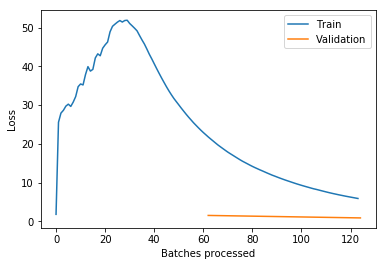

In [264]:
ll.recorder.plot_losses()

### Full dataset

In [378]:
img2bbox = dict(zip(imgs, lbl_bbox))
img2bbox_v = dict(zip(imgs_valid, lbl_bbox_valid))
def get_y_func(x):
    if x.name in img2bbox:
        bboxes, classes = img2bbox[x.name]
    else:
        bboxes, classes = img2bbox_v[x.name] 
        
    print(f'{x.name} - {bboxes} {classes}')
    return [bboxes, classes]

db = (ObjectItemList.from_folder(JPEGS_PATH)
             .split_by_files(imgs_valid)
             .label_from_func(get_y_func)
             .transform(get_transforms(), tfm_y=True, 
                                          size=224, 
                                          resize_method=ResizeMethod.SQUISH)
             .databunch(bs=64, collate_fn=bb_pad_collate)
             .normalize(imagenet_stats))

005169.jpg - [[190, 160, 252, 200], [52, 341, 88, 375], [57, 219, 92, 264], [50, 213, 86, 250]] ['cat', 'car', 'car', 'car']
006238.jpg - [[111, 277, 224, 404], [0, 257, 139, 358], [10, 39, 333, 317]] ['tvmonitor', 'person', 'person']
005960.jpg - [[283, 93, 370, 166]] ['cat']
007940.jpg - [[15, 89, 375, 383]] ['person']
008083.jpg - [[84, 81, 294, 204], [65, 151, 300, 362], [139, 94, 300, 400]] ['person', 'person', 'sofa']
007168.jpg - [[101, 47, 424, 372]] ['train']
008841.jpg - [[242, 177, 375, 249], [55, 309, 75, 320], [54, 324, 89, 341], [53, 317, 86, 328], [53, 298, 89, 313], [168, 394, 206, 406]] ['dog', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle']
000654.jpg - [[129, 154, 175, 231], [134, 35, 227, 168], [151, 54, 249, 215], [50, 410, 146, 463], [48, 367, 146, 424], [80, 322, 133, 369], [60, 113, 139, 171], [59, 85, 139, 129], [177, 294, 243, 382]] ['sheep', 'sheep', 'sheep', 'person', 'person', 'person', 'person', 'person', 'dog']
001896.jpg - [[58, 279, 371, 422]] ['bird'

001618.jpg - [[103, 52, 263, 473]] ['car']
002201.jpg - [[22, 3, 374, 498]] ['bus']
008365.jpg - [[126, 15, 216, 119], [164, 270, 283, 481], [163, 170, 230, 313]] ['tvmonitor', 'sofa', 'sofa']
005037.jpg - [[170, 64, 412, 169]] ['person']
002021.jpg - [[90, 25, 278, 229], [38, 174, 277, 500], [188, 173, 312, 270]] ['cow', 'cow', 'cow']
009455.jpg - [[1, 124, 334, 500]] ['cat']
001749.jpg - [[25, 23, 498, 333]] ['person']
003121.jpg - [[15, 1, 333, 282], [49, 209, 333, 482], [169, 467, 333, 500], [145, 437, 241, 489]] ['horse', 'person', 'person', 'person']
005224.jpg - [[85, 0, 307, 52], [89, 35, 304, 480]] ['pottedplant', 'pottedplant']
004606.jpg - [[283, 319, 317, 351]] ['aeroplane']
005465.jpg - [[95, 138, 341, 500], [231, 440, 304, 500]] ['aeroplane', 'chair']
005830.jpg - [[34, 0, 305, 473]] ['car']
008141.jpg - [[65, 214, 370, 309], [0, 37, 301, 447]] ['bottle', 'chair']
006046.jpg - [[103, 188, 206, 243], [125, 260, 204, 306], [182, 480, 211, 500]] ['boat', 'boat', 'boat']
0059

000439.jpg - [[167, 0, 209, 308]] ['train']
001976.jpg - [[88, 170, 143, 376], [74, 41, 231, 254]] ['boat', 'boat']
001577.jpg - [[85, 413, 164, 486], [91, 179, 163, 429], [162, 103, 375, 500], [2, 0, 344, 220], [0, 78, 177, 225], [32, 267, 74, 316], [11, 312, 108, 363], [2, 361, 124, 427], [35, 423, 76, 456], [74, 476, 148, 500]] ['chair', 'diningtable', 'diningtable', 'person', 'person', 'person', 'person', 'person', 'person', 'chair']
003028.jpg - [[41, 0, 293, 499]] ['aeroplane']
003398.jpg - [[24, 51, 368, 455]] ['tvmonitor']
000755.jpg - [[216, 361, 231, 393], [204, 339, 218, 366], [211, 322, 230, 351], [202, 288, 219, 310], [212, 273, 229, 298], [214, 257, 226, 268], [213, 235, 230, 259], [211, 208, 230, 230], [212, 182, 228, 201], [215, 156, 227, 174], [212, 133, 227, 151], [212, 117, 227, 133], [209, 100, 225, 114], [215, 85, 225, 100], [198, 366, 224, 386], [189, 339, 213, 358], [198, 326, 223, 343], [189, 290, 212, 305], [198, 273, 220, 291], [198, 249, 213, 261], [200, 237,

In [272]:
db.train_ds.y[0].data

(tensor([[-0.2400, -0.1467,  0.0080,  0.0667],
         [-0.7920,  0.8187, -0.6480,  1.0000],
         [-0.7720,  0.1680, -0.6320,  0.4080],
         [-0.8000,  0.1360, -0.6560,  0.3333]]), array([8, 7, 7, 7]))

In [274]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088, 4))

In [278]:
db.train_ds

LabelList (2501 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages

In [279]:
db.valid_ds

LabelList (2510 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages

In [280]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088, 4))

In [401]:
def my_loss(x,y, *args):
    print(y.shape)  
    print(y[0])
    return nn.L1Loss(x,y)()

In [402]:
llearner = cnn_learner(db, models.resnet34, custom_head=head_reg4, loss_func=my_loss)
llearner.metrics = [lambda preds, targs, _: IoU(preds, targs.squeeze()).mean()]

In [403]:
llearner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [404]:
llearner.lr_find()

torch.Size([64, 18, 4])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.5279, -0.9061,  0.0394, -0.6642],
        [-0.4768, -0.4887,  0.0191, -0.1081],
        [ 0.2251,  0.0033,  0.8672,  0.6368]], device='cuda:0')
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: bool value of Tensor with more than one value is ambiguous